In [1]:
import pandas as pd
import numpy as np
emicron_original = pd.read_csv("../../Data/emicron_geih_merged.csv")  # Include the subdirectory in the file path

In [2]:
emicron = emicron_original.copy()

#checking if PCA is appropriate

*correlation among variables*

In [3]:
emicron.shape

(77606, 142)

#Integrating MPI

In [4]:
mpi = pd.read_stata("../../Data/02_emicron-informality-mpi.dta")

In [5]:
mpi.filter(like='mpi').columns

Index(['mpi_index', 'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
       'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
       'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
       'mpi_education', 'mpi_edu_attend', 'mpi_school_lag',
       'mpi_care_barriers', 'mpi_child_labour', 'mpi_cy', 'mpi_health_ss',
       'mpi_deprivations'],
      dtype='object')

In [6]:
#columns_to_merge = ['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'mpi_index'
 #                   'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
  #                  'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
 #                   'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
   #                 'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
    #                'mpi_health_ss']

#emicron = pd.merge(emicron, mpi[columns_to_merge], on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P"], how='left')

#removing columns that are not useful for clustering

*the columns removed are mostly about geographical location and social capital*

P3077S3 Washing, hanging, ironing clothes, repairing clothes in: c. Non-family households?

P3012 is it part of an environmental group?

P3016 is the business part of another business?

P3017_C cost of internet, telephone, data etc.

P3076S3 Cooking, washing dishes, setting the table in: c. Non-family households?

P3077S1	Lavar, colgar, planchar la ropa, reparar ropa en: a. Su hogar?

P3017_D Servicio de agua, acueducto, alcantarillado.

P3008 ¿El negocio o actividad económica pertenece a alguna Organización de vigilancia o seguridad?

P3034 ¿Cuántos meses lleva trabajando en su negocio o actividad ?

P3077S2	Lavar, colgar, planchar la ropa, reparar ropa en: b. Hogares de personas familiares?

P3017_E Consumo de combustibles (gas natural, gas propano en pipeta, gasolina, carbón, leña)

P3017_F Mantenimiento y reparación del local, vehículos, o maquinaria

P3017_B Energía eléctrica comprada

PET indication of population in age of working

P3079S1	Cuidar niñas o niños menores de 5 años que no estén enfermos ni en condición de discapacidad en: a. Su hogar?

P3076S1	Cocinar, lavar los platos, poner la mesa en: a. Su hogar?

P3022 ¿El negocio o actividad económica pertenece a alguna Organización de población vulnerable?

P3010 ¿El negocio o actividad económica pertenece a alguna Veeduria ciudadana?

P3094	Plantar, regar, abonar, deshierbar o cosechar en una huerta casera o cultivo destinado solo para el consumo de este hogar.


In [7]:
#emicron.drop(['P3012'], axis=1, inplace=True)
emicron.drop(['DIRECTORIO'], axis=1, inplace=True)
#emicron.drop(['P3008'], axis=1, inplace=True)
emicron.drop(['SECUENCIA_P'], axis=1, inplace=True)
emicron.drop(['SECUENCIA_ENCUESTA'], axis=1, inplace=True)
#emicron.drop(['P3010'], axis=1, inplace=True)
#emicron.drop(['COD_DEPTO'], axis=1, inplace=True)
emicron.drop(['CLASE_TE'], axis=1, inplace=True)
#emicron.drop(['urban'], axis=1, inplace=True)
#emicron.drop(['F_EXP'], axis=1, inplace=True)

#emicron.drop(['II'], axis=1, inplace=True)
#emicron.drop(['II_D1'], axis=1, inplace=True)
#emicron.drop(['II_D2'], axis=1, inplace=True)
#emicron.drop(['II_D3'], axis=1, inplace=True)
#emicron.drop(['II_D4'], axis=1, inplace=True)

In [8]:
#migrants-related, not dropping them to form migrants cluster
#columns_to_drop = [
#    'P3373', 'P3373S1', 'P3373S2', 'P3373S3', 'P3373S3A1', 'P3373S3A2',
#    'P3374', 'P3374S1', 'P3374S2', 'P3374S3',
#    'P3375', 'P3375S1',
#    'P3376',
#    'P3377',
#    'P3378', 'P3378S1',
#    'P3379',
#    'P3380',
#    'P3381',
#    'P3382', 'P3382S1', 'P3382S2', 'P3382S3',
#    'P3383',
#    'P3384', 'P3384S1', 'P3384S2', 'P3384S3',
#    'P3385',
#    'P3386', 'P3386S1'
#]

#for column in columns_to_drop:
#    if column in emicron.columns:
#        emicron.drop(column, axis=1, inplace=True)

#Remove non-numeric columns, scale

In [9]:
from sklearn.preprocessing import StandardScaler

# Filter columns based on data types
numeric_columns = emicron.select_dtypes(include=['int64', 'float64'])

# Create a new DataFrame with only numeric columns
emicron = emicron[numeric_columns.columns]

# Now you can scale the data
scaler = StandardScaler()
X = scaler.fit_transform(emicron)

#Models: K-Means. Running the model

In [10]:
from sklearn.cluster import KMeans

In [11]:
# There appears to be an elbow around a value of 7. We can refit a model with this value and see what the groups look like
kmeans_elbow = KMeans(n_clusters=7, n_init=20, random_state=0)

# Fitting and predicting in one line
y_pred_elbow = kmeans_elbow.fit_predict(X)

In [12]:
# Storing the predictions in a dataframe to work with
kmeans_pred_elbow = pd.DataFrame(
    {'cluster': y_pred_elbow},
    index=emicron.index)

In [13]:
# Examining the cluster groupings
kmeans_pred_elbow.cluster.value_counts()

cluster
1    26484
4    21968
3    10716
5    10569
6     4178
2     3600
0       91
Name: count, dtype: int64

#K-Means, analysing the results and robustness

In [14]:
#looking into cluster 0
kmeans_pred_elbow.query('cluster==4')

cluster
0            4
2            4
10           4
20           4
21           4
...        ...
77582        4
77588        4
77589        4
77594        4
77597        4

[21968 rows x 1 columns]

#Analysing the clusters

In [15]:
import matplotlib.pyplot as plt

In [16]:
# Examining the cluster groupings
kmeans_pred_elbow.cluster.value_counts()

cluster
1    26484
4    21968
3    10716
5    10569
6     4178
2     3600
0       91
Name: count, dtype: int64

Variable 'VENTAS_MES_ANTERIOR': 6.661800074135506
Variable 'CONSUMO_INTERMEDIO': 5.920033646578023
Variable 'COSTOS_MES_ANTERIOR': 5.633465408534498
Variable 'VALOR_AGREGADO': 4.257460095388144
Variable 'INGRESO_MIXTO': 3.9361035056587323
Variable 'P3072': 3.24115386992432
Variable 'GASTOS_MES': 2.9332787985620525
Variable 'P3017_I': 2.4123968143973222
Variable 'P3017_G': 2.1119830011488725
Variable 'REMUNERACION_TOTAL': 2.1097838260276416
Variable 'PRESTACIONES': 2.0161992048033617
Variable 'P3017_H': 1.9924076565311897
Variable 'P3017_J': 1.8334331281912433
Variable 'P3017_A': 1.6444058738248046
Variable 'P3374': 1.5156735351033088
Variable 'P3017_K': 1.4783018332656568
Variable 'P3017_C': 1.4617235472782955
Variable 'II_D2': 1.4006448358222927
Variable 'P3090': 1.3141721459525901
Variable 'P3091': 1.2912978463487146
Variable 'II': 1.253115885301786
Variable 'P3017_B': 1.1415674148301589
Variable 'II_D1': 1.1167723107924423
Variable 'P3382': 1.0590677110716518
Variable 'P3088': 1.041

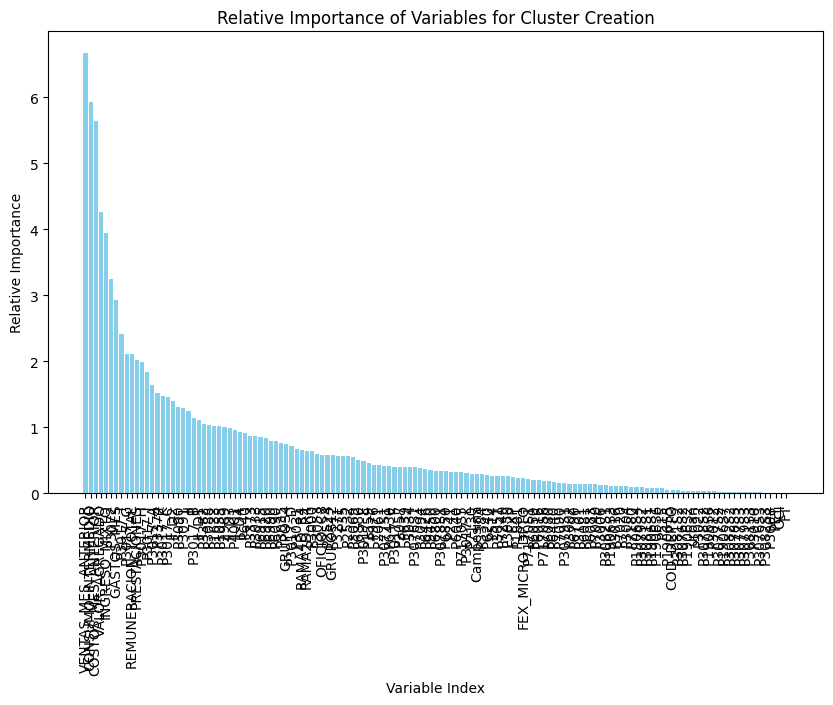

In [17]:
# Get the cluster centroids
centroids = kmeans_elbow.cluster_centers_

# Calculate the relative importance of variables for cluster creation
relative_importance = centroids.std(axis=0)

# Sort the relative importance in descending order
sorted_indices = np.argsort(relative_importance)[::-1]
sorted_relative_importance = relative_importance[sorted_indices]

# Get the names of variables corresponding to sorted indices
variable_names = emicron.columns[sorted_indices]

# Print the variable names along with their relative importance
for name, importance in zip(variable_names, sorted_relative_importance):
    print(f"Variable '{name}': {importance}")

# Plot the relative importance of variables
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_relative_importance)), sorted_relative_importance, color='skyblue')
plt.xlabel('Variable Index')
plt.ylabel('Relative Importance')
plt.title('Relative Importance of Variables for Cluster Creation')
plt.xticks(range(len(sorted_relative_importance)), variable_names, rotation=90)
plt.show()

In [18]:
emicron = emicron_original.copy()

In [19]:
emicron['cluster'] = kmeans_pred_elbow['cluster']

In [20]:
#merge with mpi to get mpi_index
columns_to_merge = ['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'mpi_index',
                    'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
                    'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
                    'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
                    'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
                    'mpi_health_ss']

emicron = pd.merge(emicron, mpi[columns_to_merge], on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P"], how='left')

In [21]:
np.average(emicron[emicron['cluster']==4]['II'], weights=emicron[emicron['cluster']==4]['F_EXP'])

0.24448787562937568

In [22]:
np.average(emicron[emicron['cluster']==1]['II'], weights=emicron[emicron['cluster']==1]['F_EXP'])

0.19485951066585608

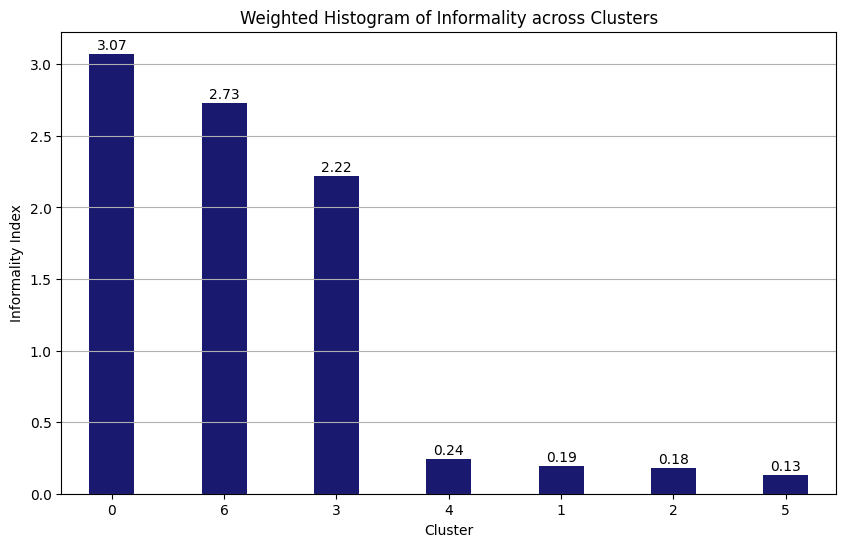

In [23]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['II']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Informality Index')
plt.title('Weighted Histogram of Informality across Clusters')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()


Dimension 1 - Registration (RUT and Cam. Comercio), no Nan to handle

Dimension 2 - Healthcare and Pensions (H, P and ARL for owner and workers, if any)

Dimension 3 - Taxes (Renta, IVA, ICA. If eligible, i.e., RUT != Simplificado)

Dimension 4 - Accounting (Formal), no Nan to handle

In [24]:
np.average(emicron[emicron['cluster']==4]['II_D1'], weights=emicron[emicron['cluster']==4]['F_EXP'])

0.02667407644614988

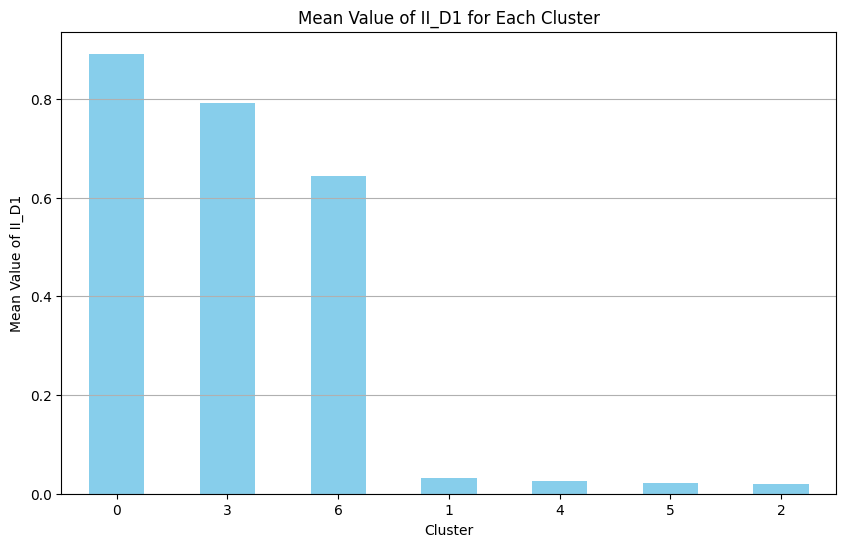

In [25]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['II_D1']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of II_D1')
plt.title('Mean Value of II_D1 for Each Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()

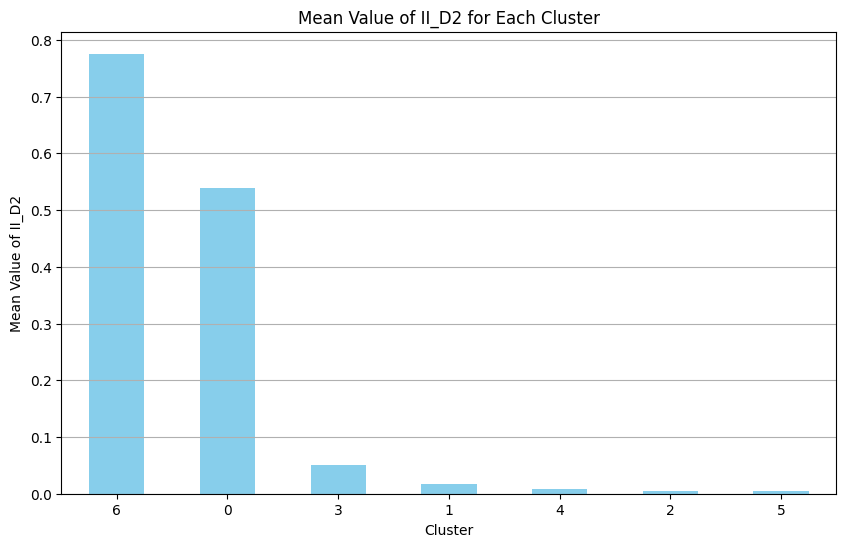

In [26]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['II_D2']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of II_D2')
plt.title('Mean Value of II_D2 for Each Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()

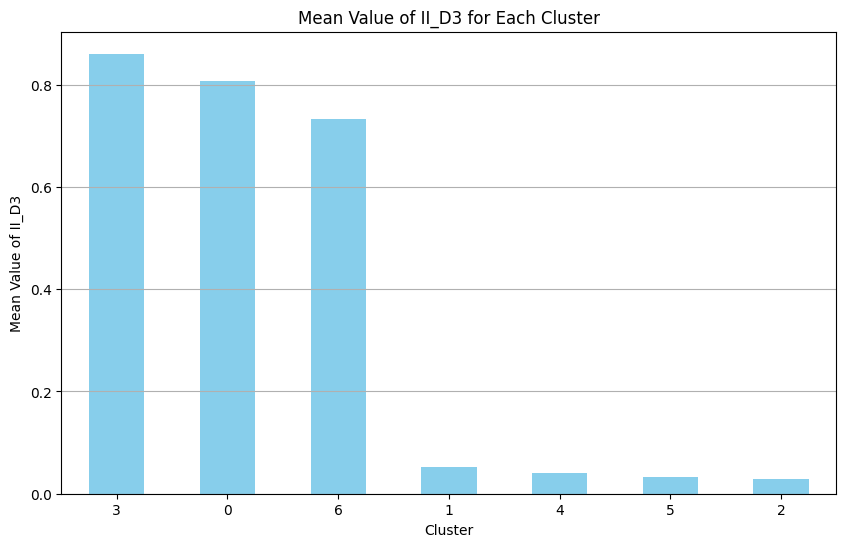

In [27]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['II_D3']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of II_D3')
plt.title('Mean Value of II_D3 for Each Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()

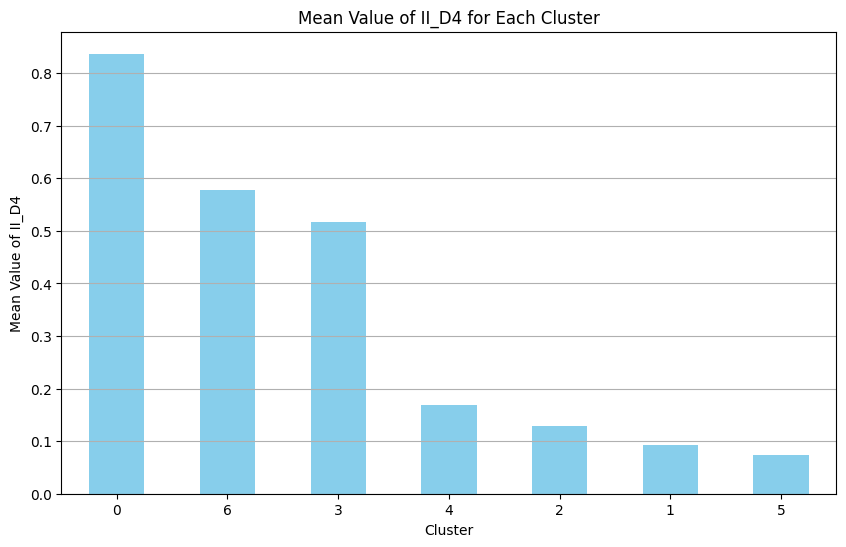

In [28]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['II_D4']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of II_D4')
plt.title('Mean Value of II_D4 for Each Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()

*3069: how many employees*
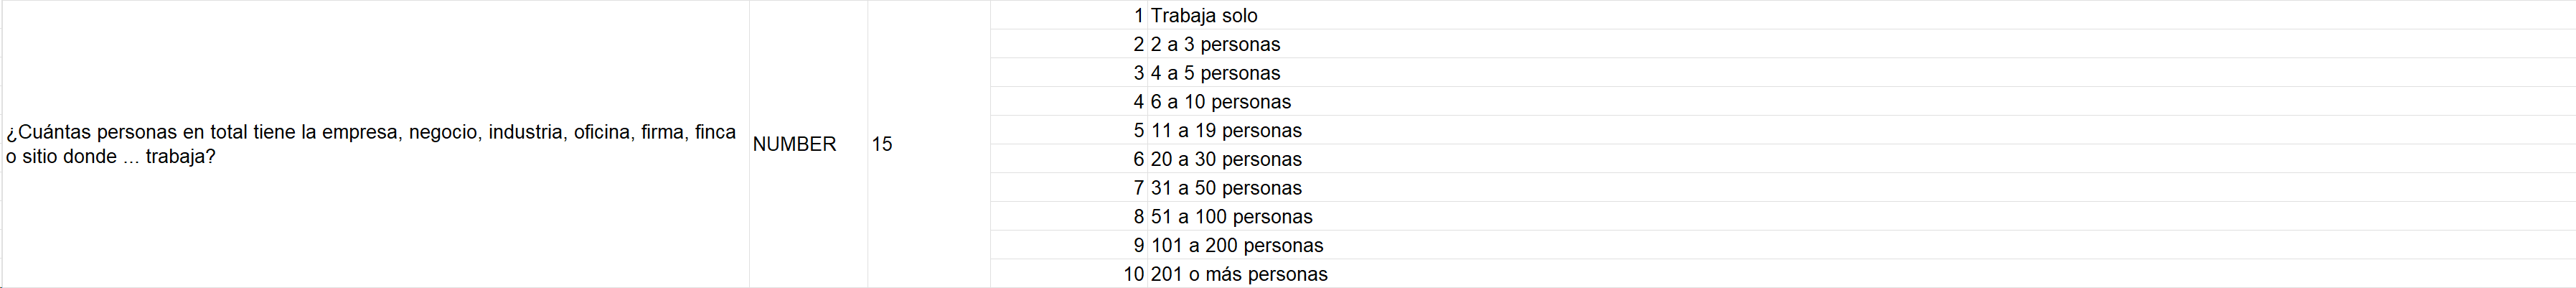

In [29]:
np.average(emicron[emicron['cluster']==3]['P3069'], weights=emicron[emicron['cluster']==3]['F_EXP'])

1.6059199917835376

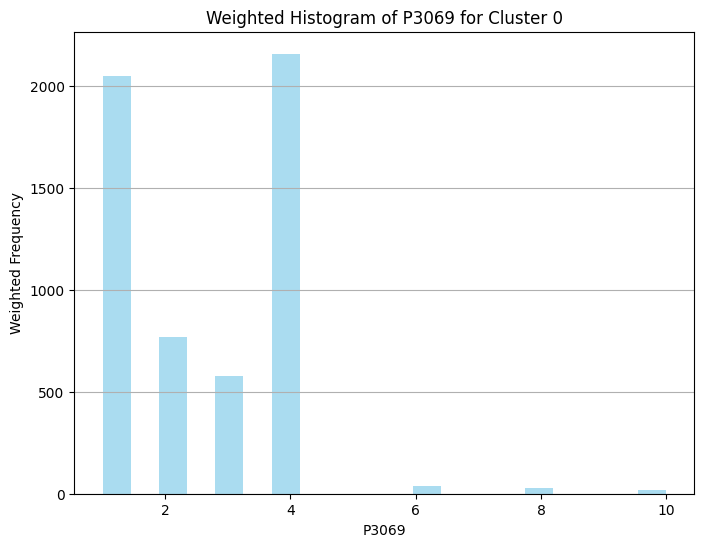

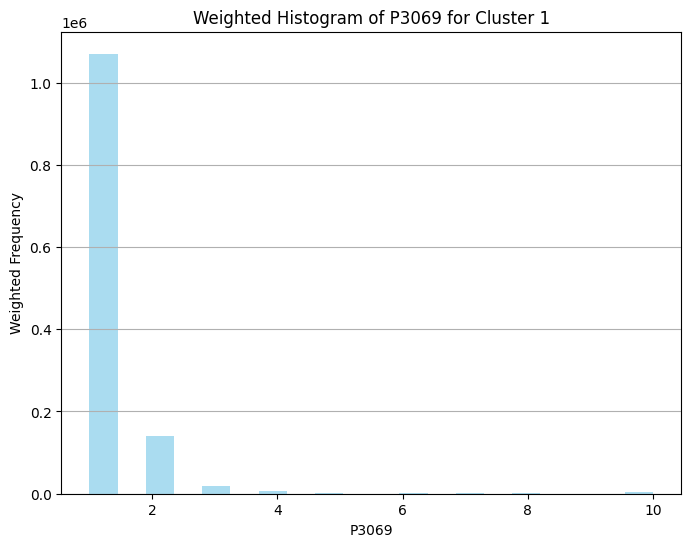

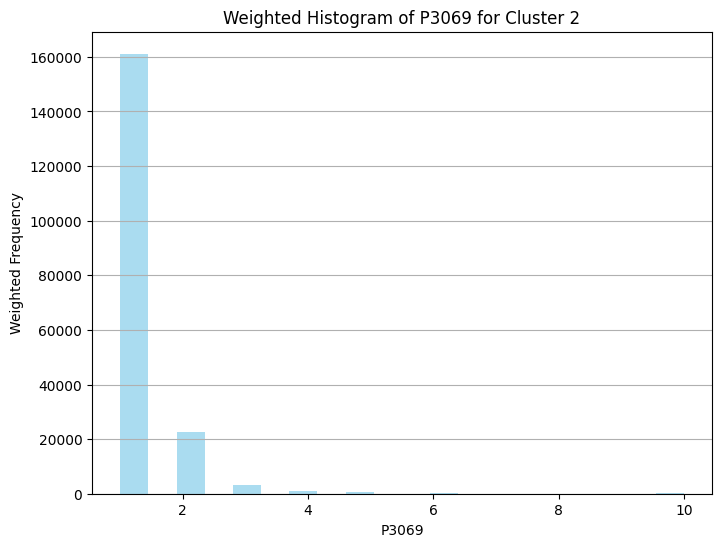

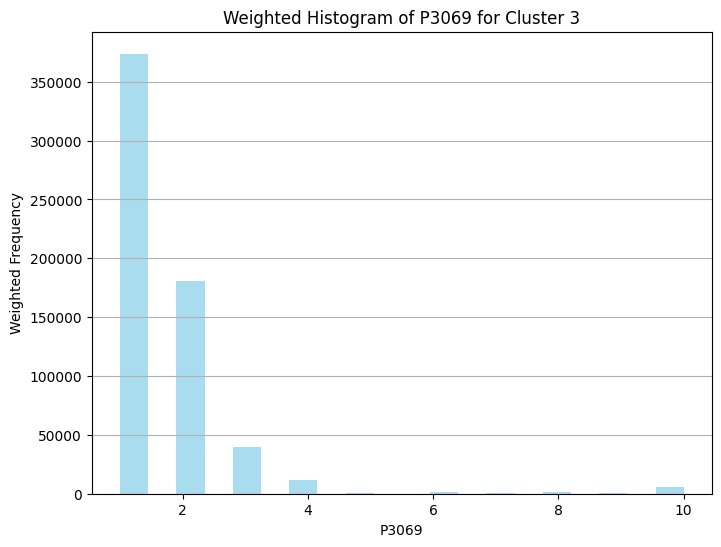

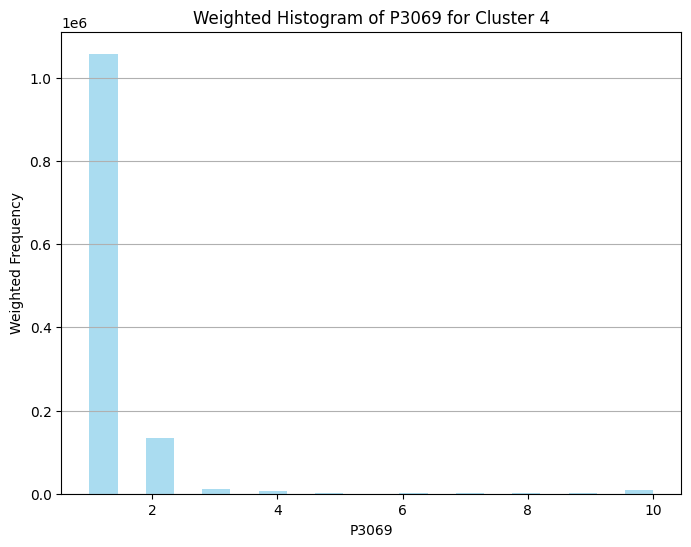

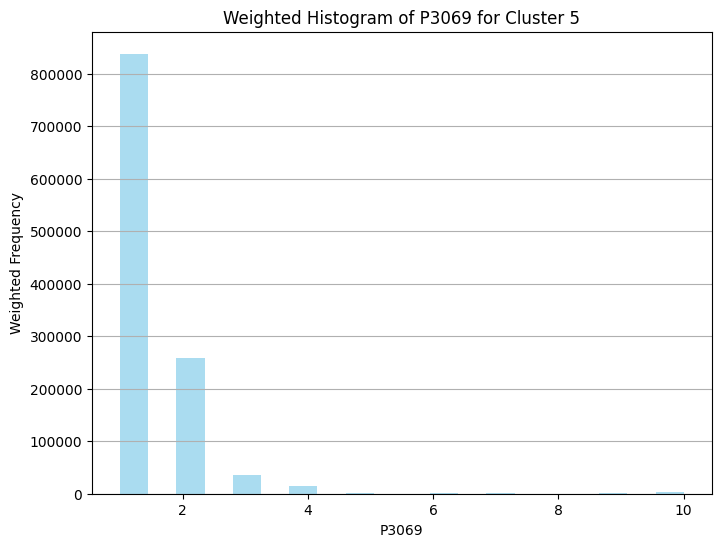

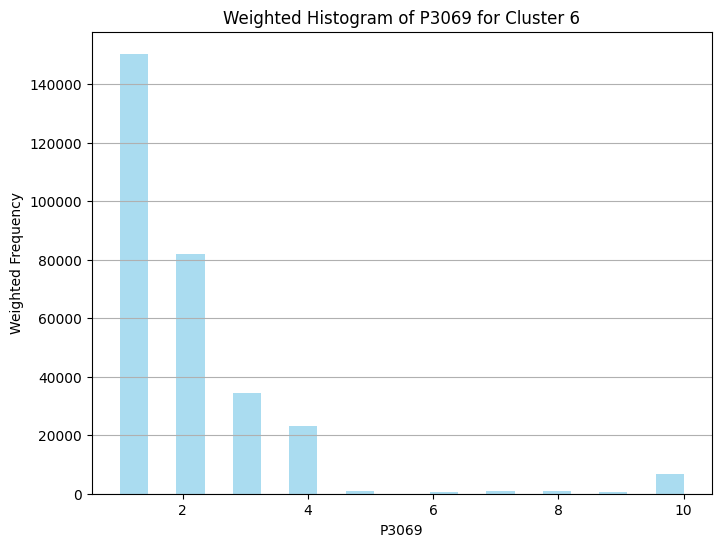

In [30]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P3069'], bins=20, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P3069')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P3069 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()


*6430: type of job*

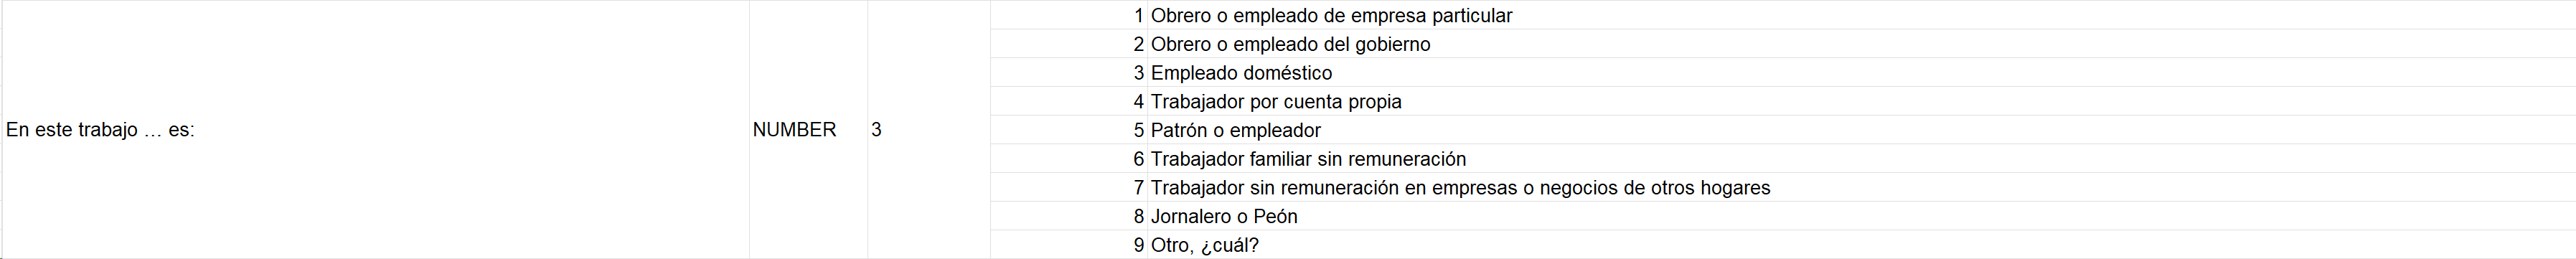

In [31]:
np.average(emicron[emicron['cluster']==3]['P6430'], weights=emicron[emicron['cluster']==3]['F_EXP'])

4.189545000119311

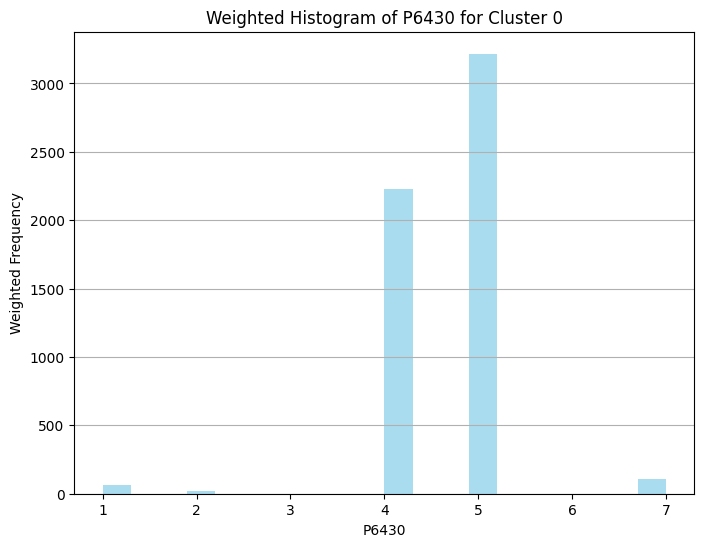

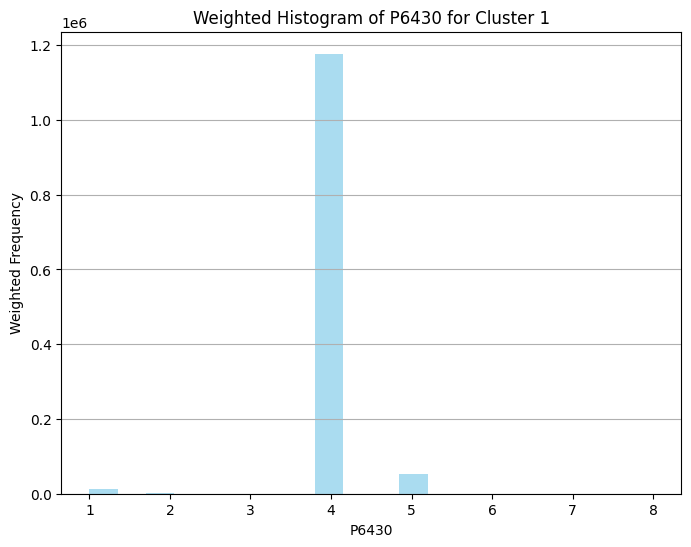

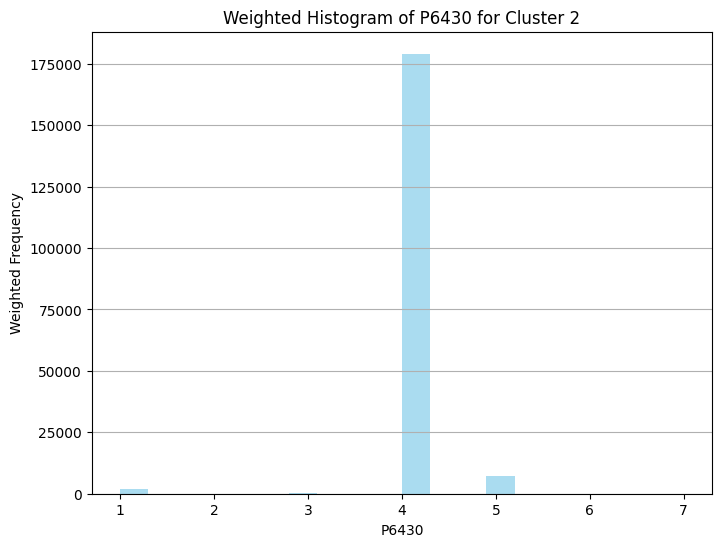

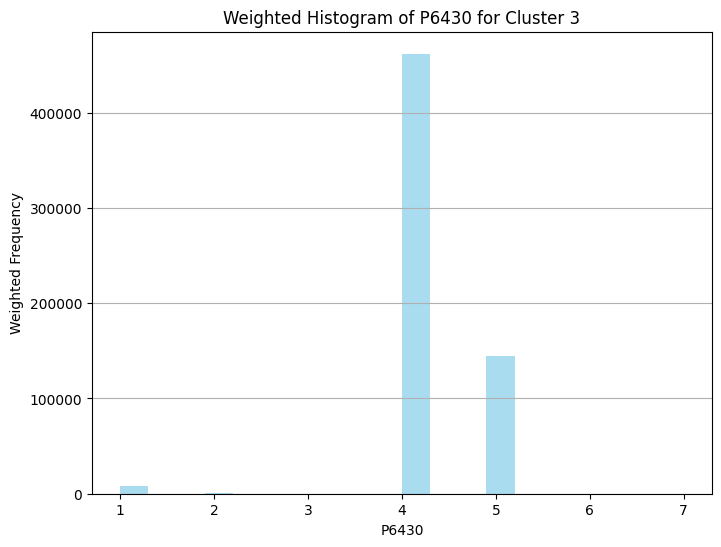

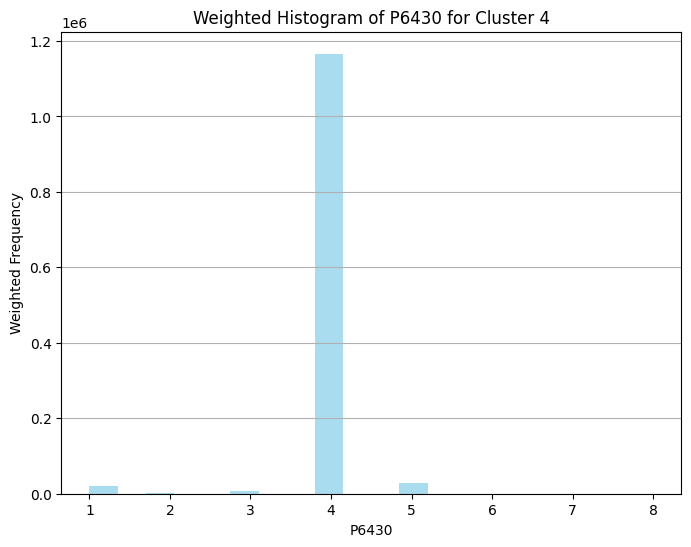

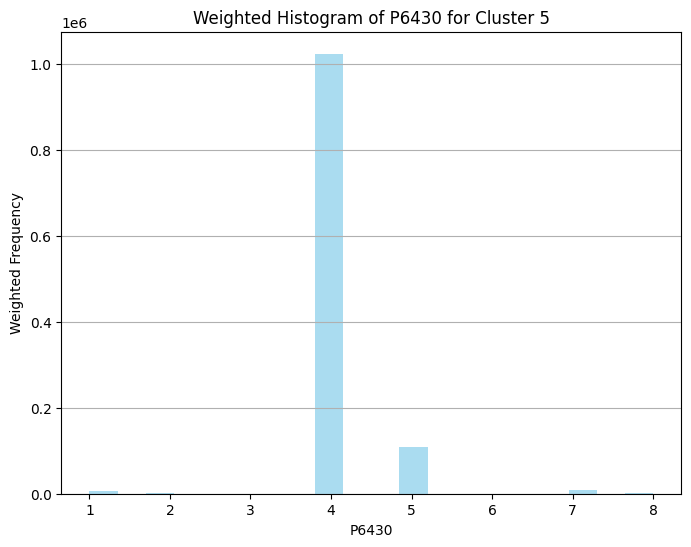

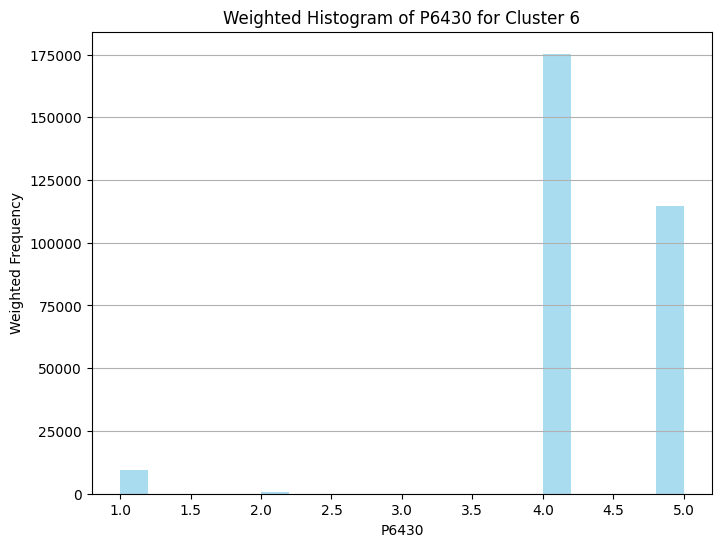

In [32]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P6430'], bins=20, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P6430')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P6430 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()


*7040:*
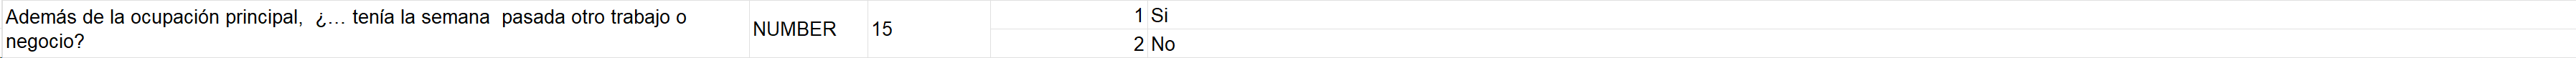

In [33]:
np.average(emicron[emicron['cluster']==3]['P7040'], weights=emicron[emicron['cluster']==3]['F_EXP'])

1.9448869891861076

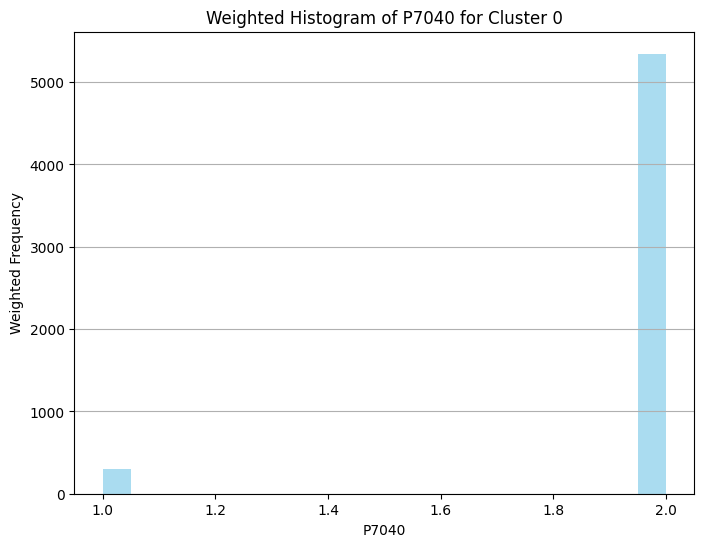

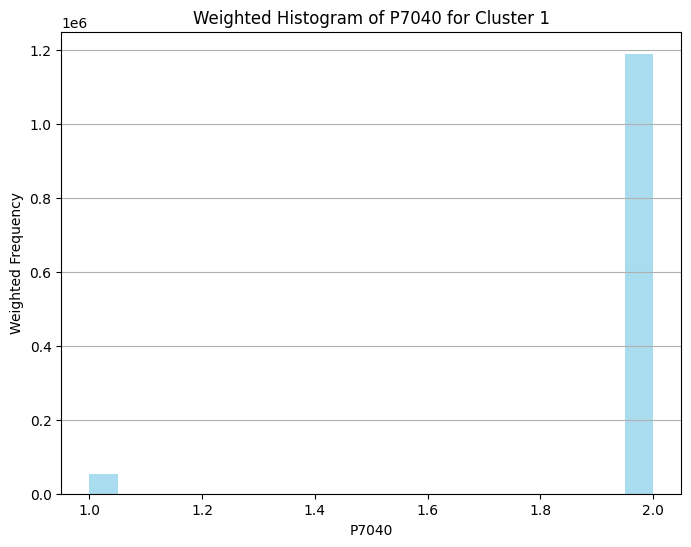

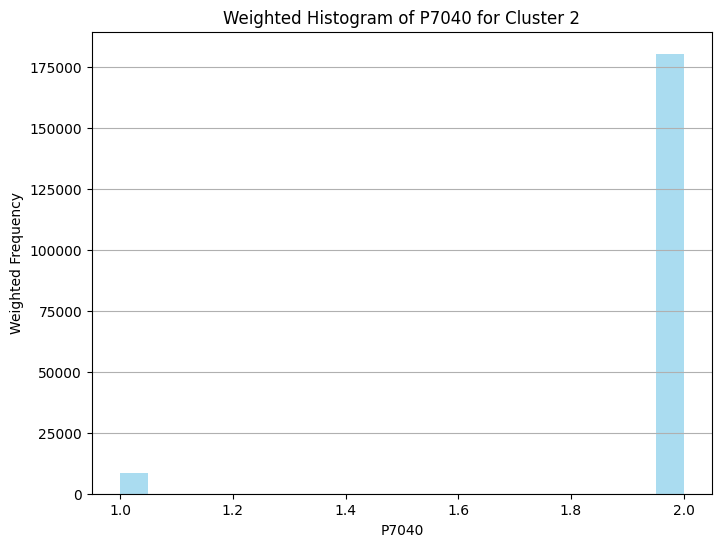

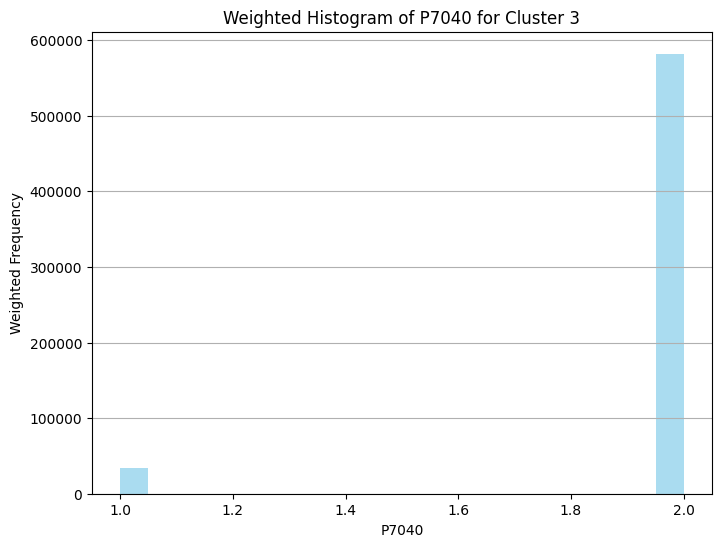

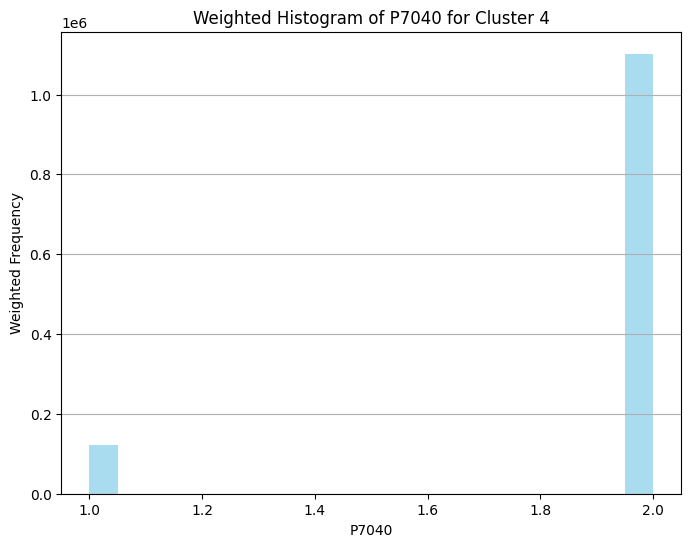

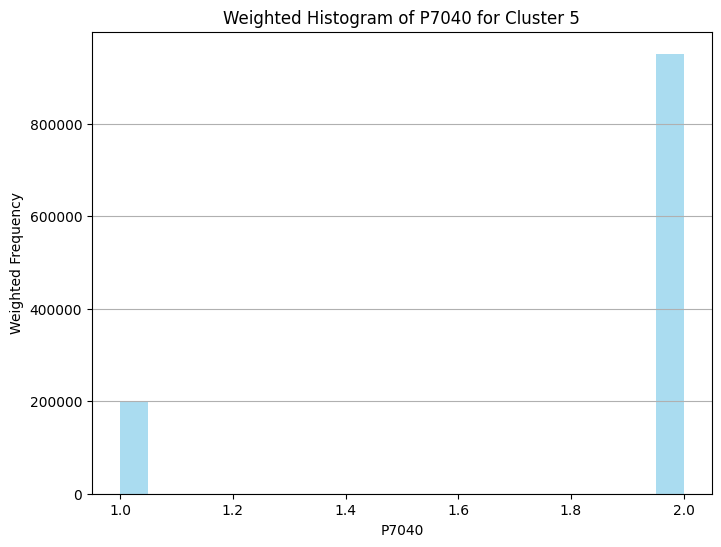

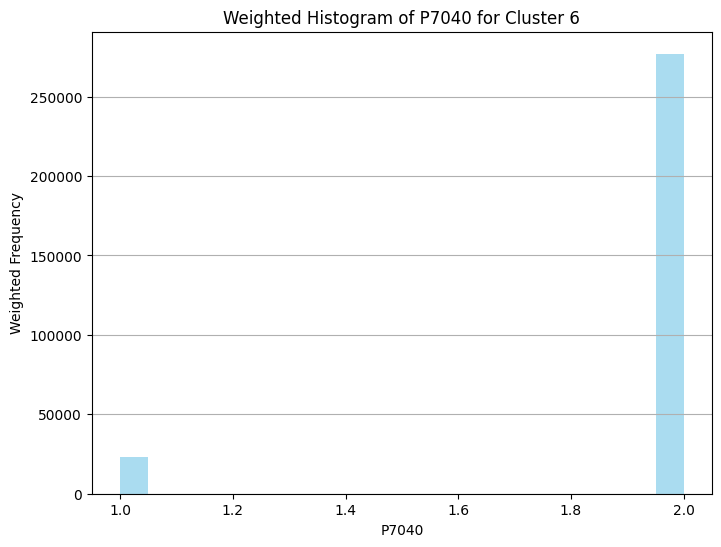

In [34]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P7040'], bins=20, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P7040')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P7040 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

*6440: 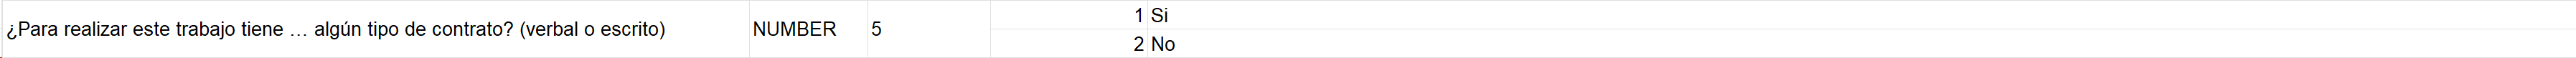*

In [35]:
np.average(emicron[emicron['cluster']==3]['P6440'], weights=emicron[emicron['cluster']==3]['F_EXP'])

1.9614413871357883

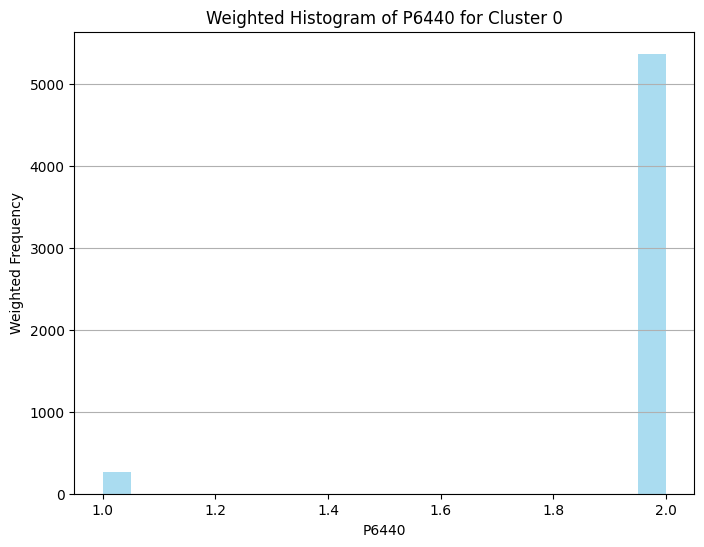

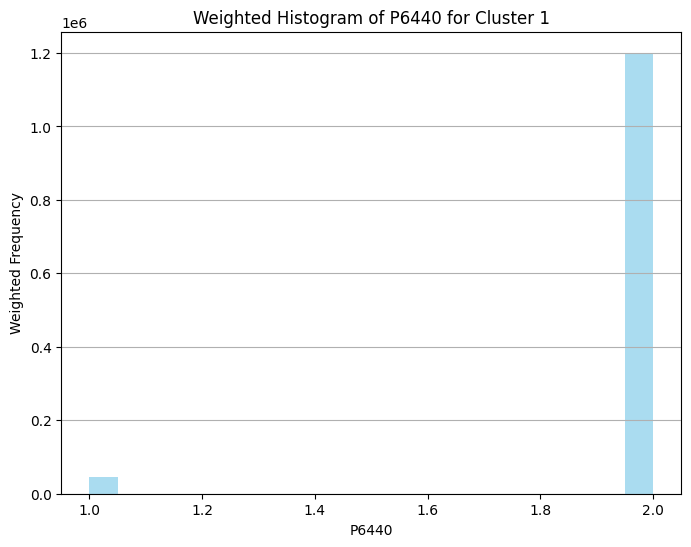

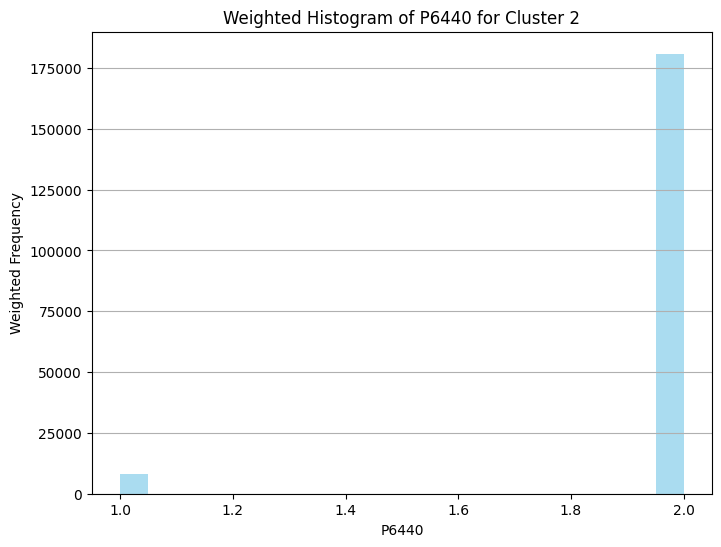

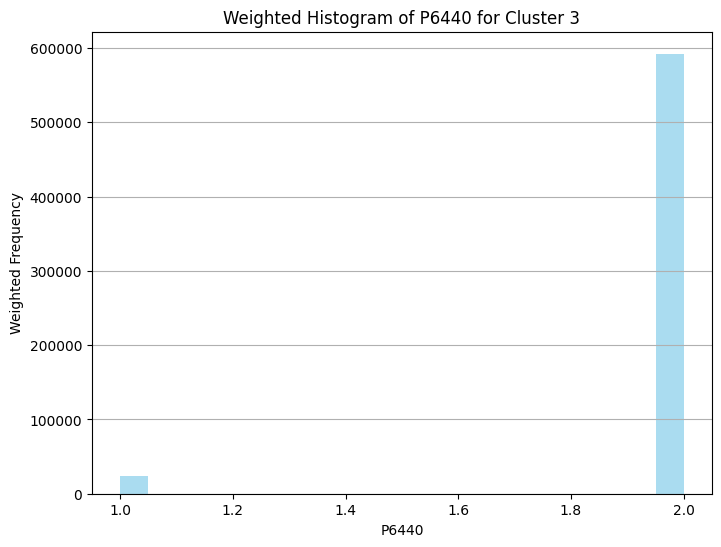

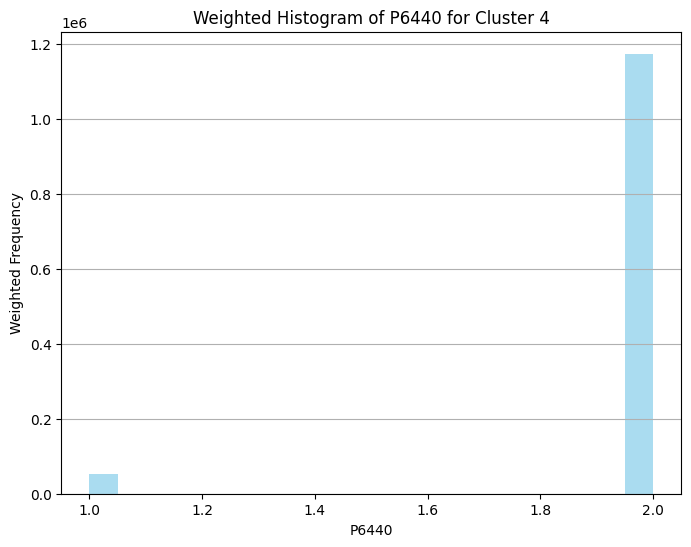

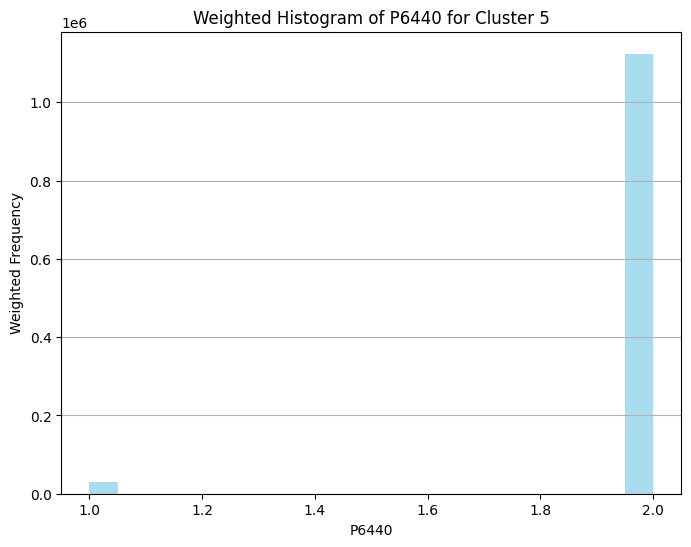

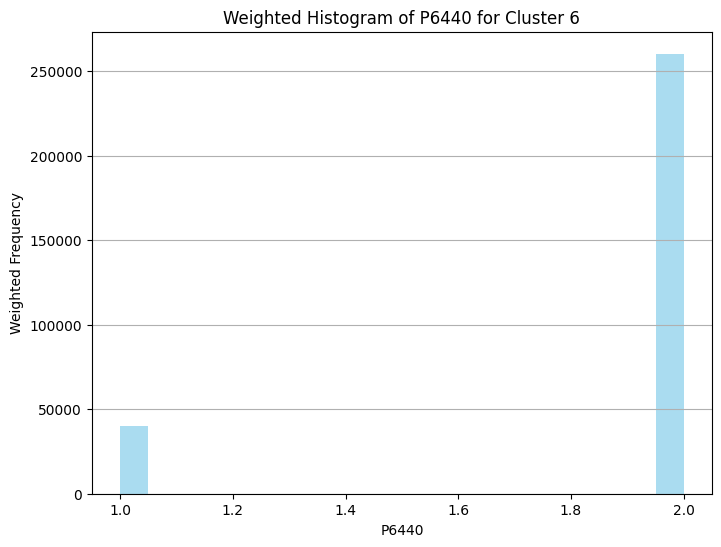

In [36]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P6440'], bins=20, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P6440')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P6440 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

*monthly compensation of all workers*

In [37]:
np.average(emicron[emicron['cluster']==3]['REMUNERACION_TOTAL'], weights=emicron[emicron['cluster']==3]['F_EXP'])

405027.8069106259

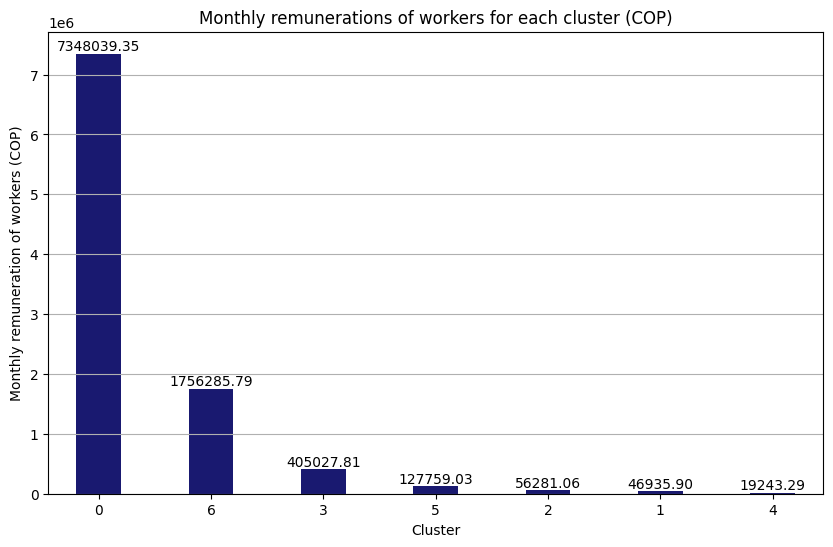

In [38]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['REMUNERACION_TOTAL']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Monthly remuneration of workers (COP)')
plt.title('Monthly remunerations of workers for each cluster (COP)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()


*registered in Chamber of Commerce?*

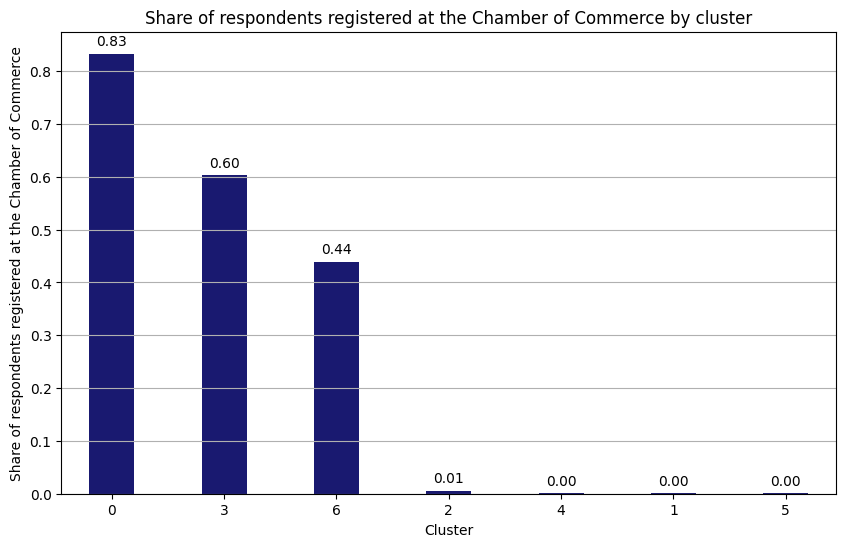

In [39]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P1055']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents registered at the Chamber of Commerce')
plt.title('Share of respondents registered at the Chamber of Commerce by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()


*Sales last month*

In [40]:
np.average(emicron[emicron['cluster']==4]['VENTAS_MES_ANTERIOR'], weights=emicron[emicron['cluster']==4]['F_EXP'])

1165487.6602993298

In [41]:
np.average(emicron[emicron['cluster']==3]['VENTAS_MES_ANTERIOR'], weights=emicron[emicron['cluster']==3]['F_EXP'])

5377264.205630265

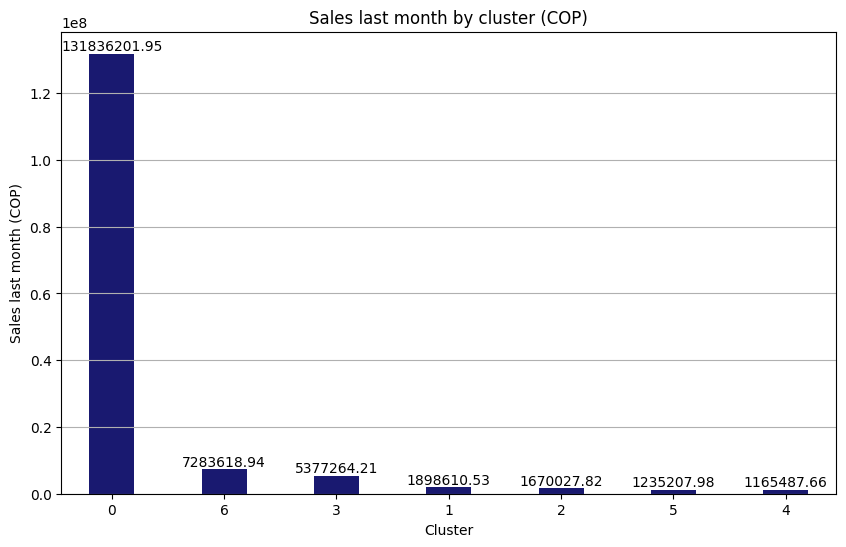

In [42]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['VENTAS_MES_ANTERIOR']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Sales last month (COP)')
plt.title('Sales last month by cluster (COP)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*P3017_B: costs of electricity*

In [43]:
np.average(emicron[emicron['cluster']==3]['P3017_B'], weights=emicron[emicron['cluster']==3]['F_EXP'])

99092.10501816562

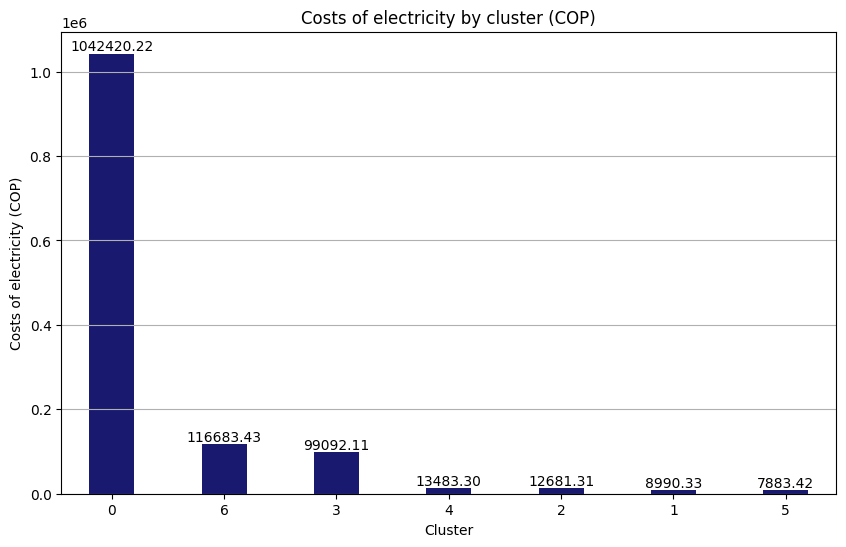

In [44]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P3017_B']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Costs of electricity (COP)')
plt.title('Costs of electricity by cluster (COP)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*P3017_G: costs of transport*

In [45]:
np.average(emicron[emicron['cluster']==3]['P3017_G'], weights=emicron[emicron['cluster']==3]['P3017_G'])

997919.3438907737

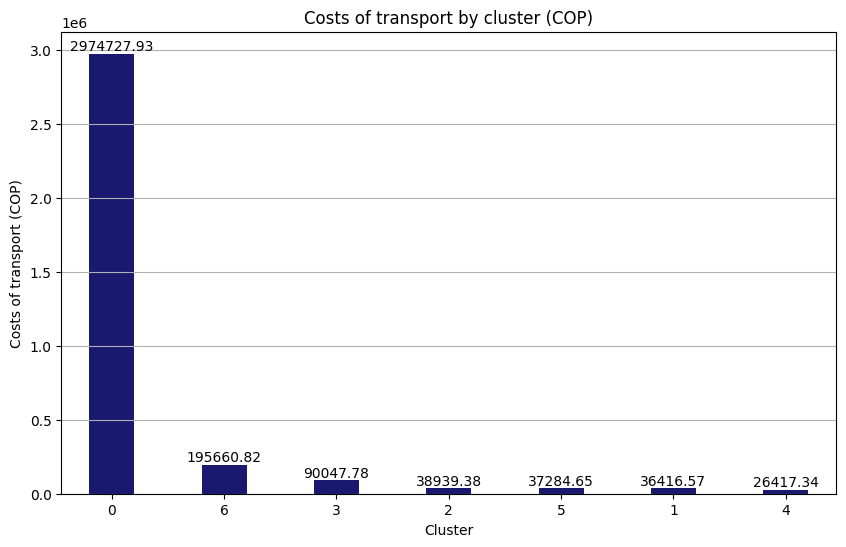

In [46]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P3017_G']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Costs of transport (COP)')
plt.title('Costs of transport by cluster (COP)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*P3010: if the business is part of Veeduria ciudadana*

In [47]:
np.average(emicron[emicron['cluster']==3]['P3010'], weights=emicron[emicron['cluster']==3]['P3010'])

1.9999533386216228

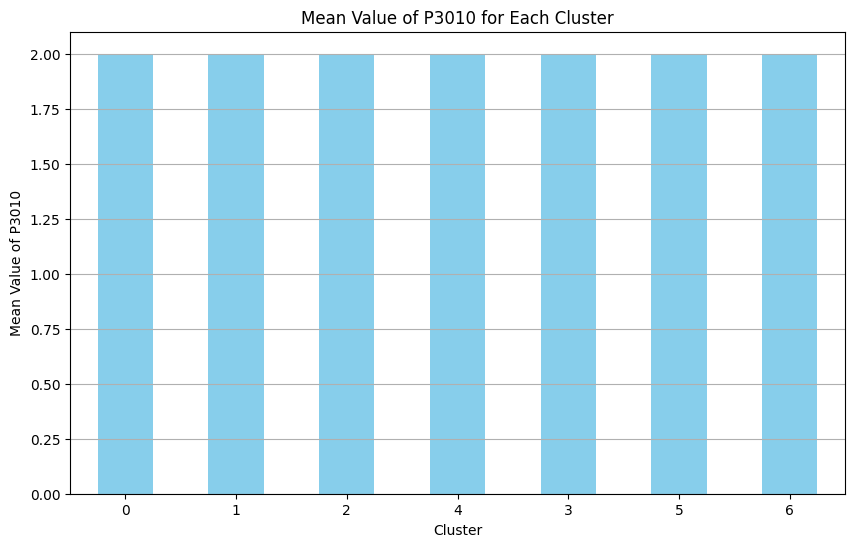

In [48]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P3010']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of P3010')
plt.title('Mean Value of P3010 for Each Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()

*P3012: if the business is part of an environmental group*

In [49]:
np.average(emicron[emicron['cluster']==3]['P3012'], weights=emicron[emicron['cluster']==3]['P3012'])

1.999860002799944

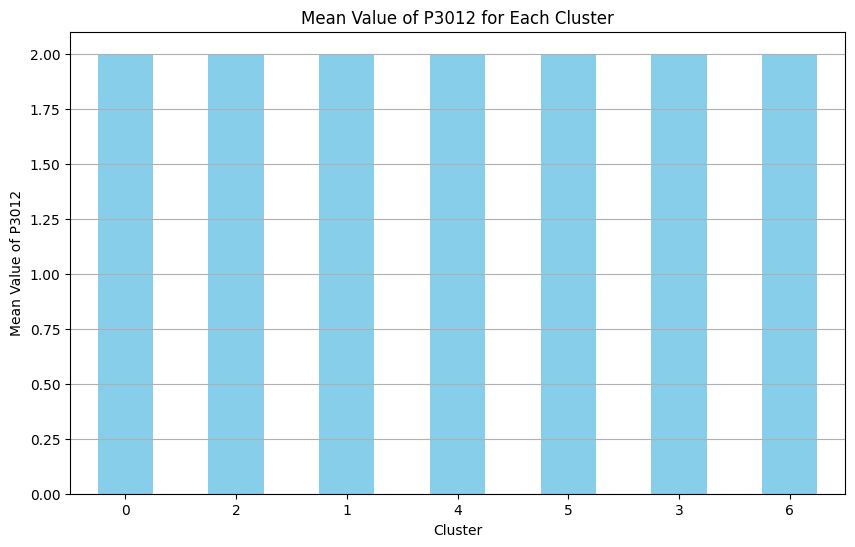

In [50]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P3012']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of P3012')
plt.title('Mean Value of P3012 for Each Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()

*Registered at RUT*

In [51]:
np.average(emicron[emicron['cluster']==3]['P1633'], weights=emicron[emicron['cluster']==3]['P1633'])

1.0382608695652173

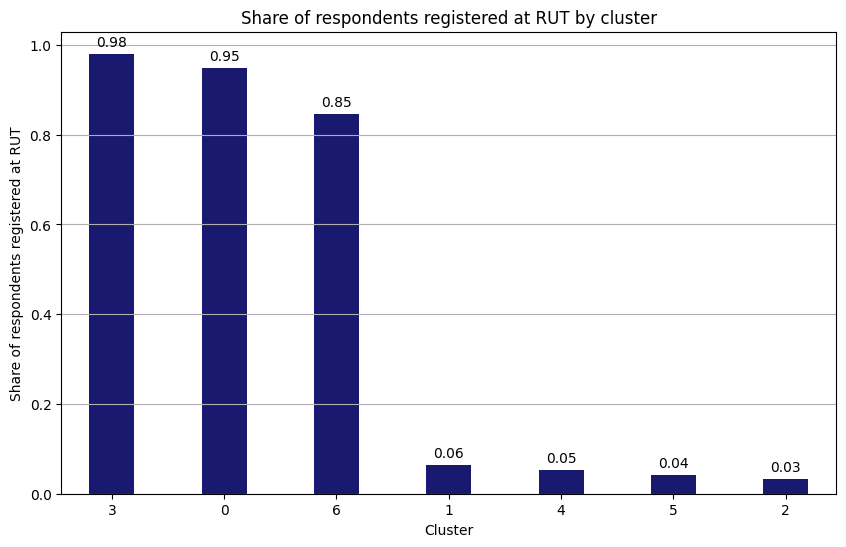

In [52]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P1633']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents registered at RUT')
plt.title('Share of respondents registered at RUT by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*What financial register is used. val 3 and 5 would be informal*

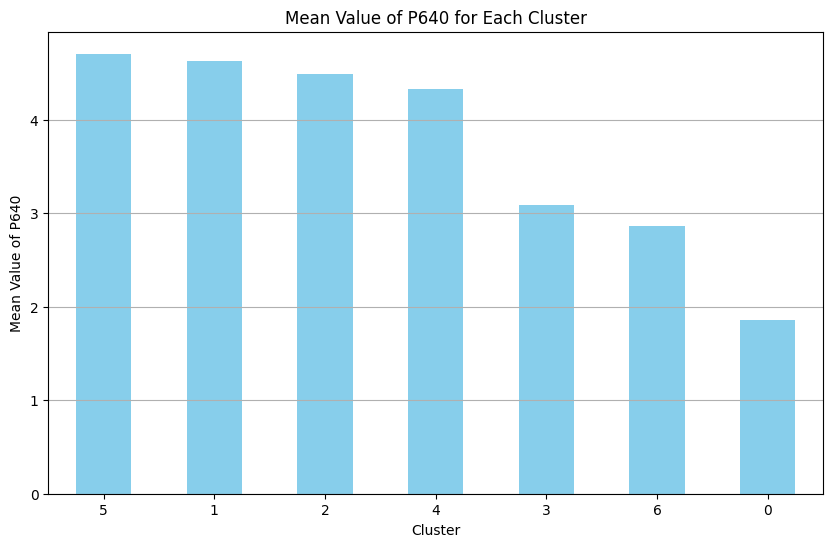

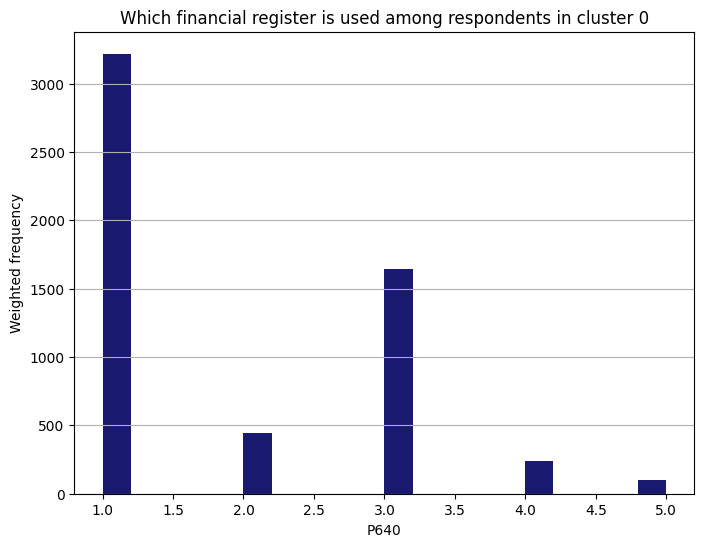

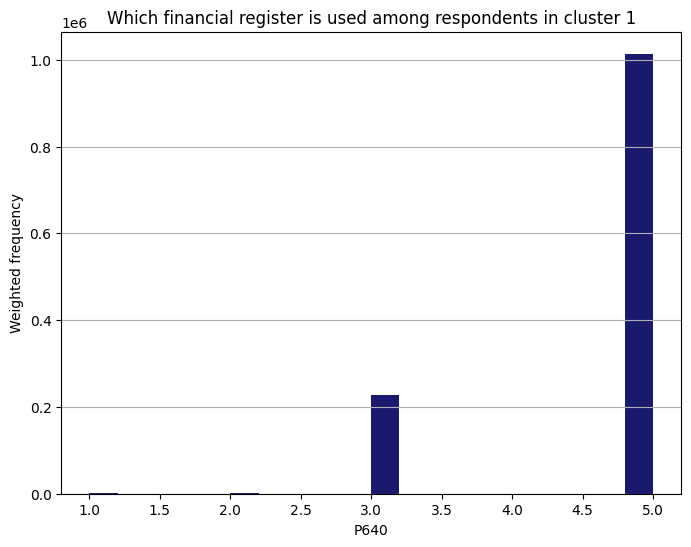

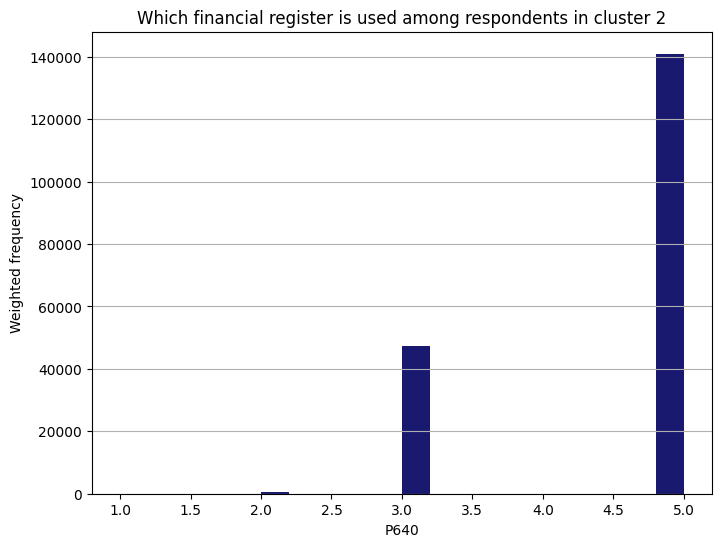

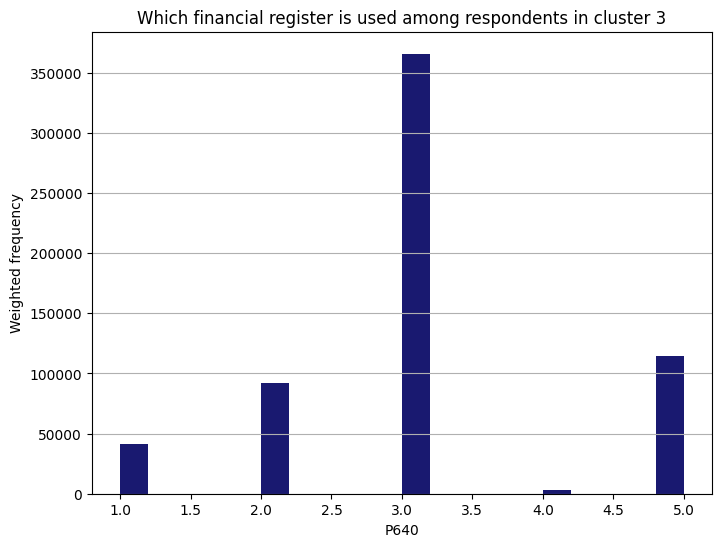

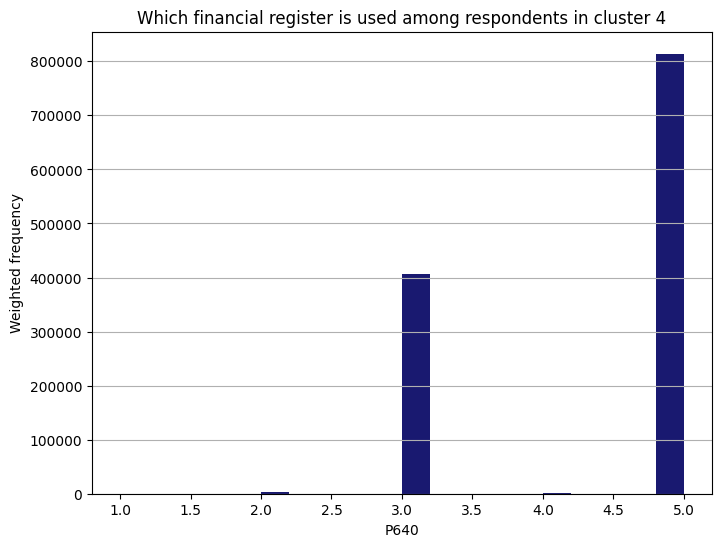

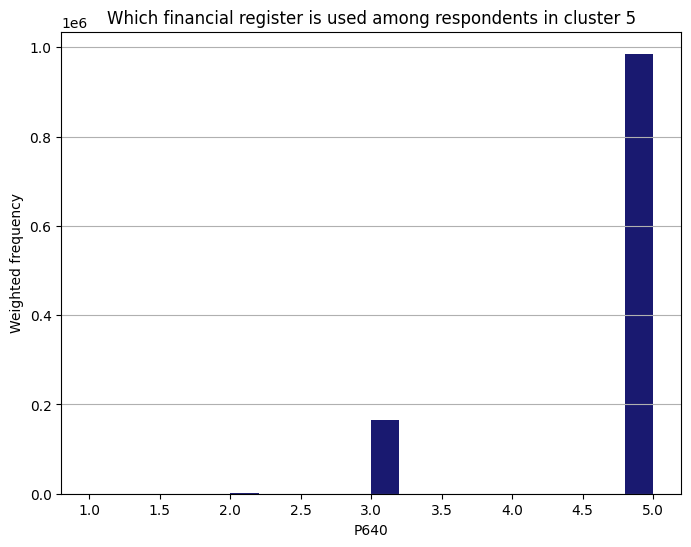

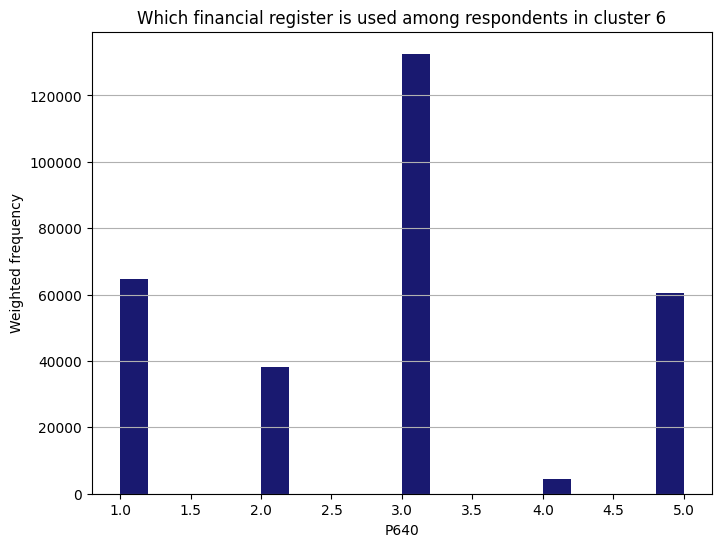

In [53]:
import matplotlib.pyplot as plt

# Define the weighted mean function
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P640']
    return (values * weights).sum() / weights.sum()

# Calculate the weighted means
result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of P640')
plt.title('Mean Value of P640 for Each Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()

# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P640'], bins=20, weights=data['F_EXP'], color='#191970')
    plt.xlabel('P640')
    plt.ylabel('Weighted frequency')
    plt.title(f'Which financial register is used among respondents in cluster {cluster}')
    plt.grid(axis='y')
    plt.show()


*how many people work in the business*

In [54]:
np.average(emicron[emicron['cluster']==3]['P3091'], weights=emicron[emicron['cluster']==3]['P3091'])

2.2367132660885978

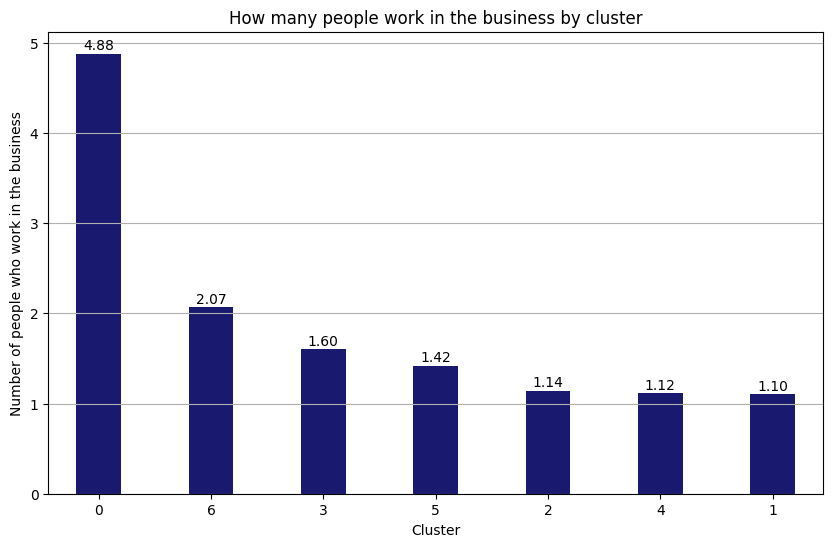

In [55]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P3091']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Number of people who work in the business')
plt.title('How many people work in the business by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*whether you are a business owner (1) or a freelancer (2)*

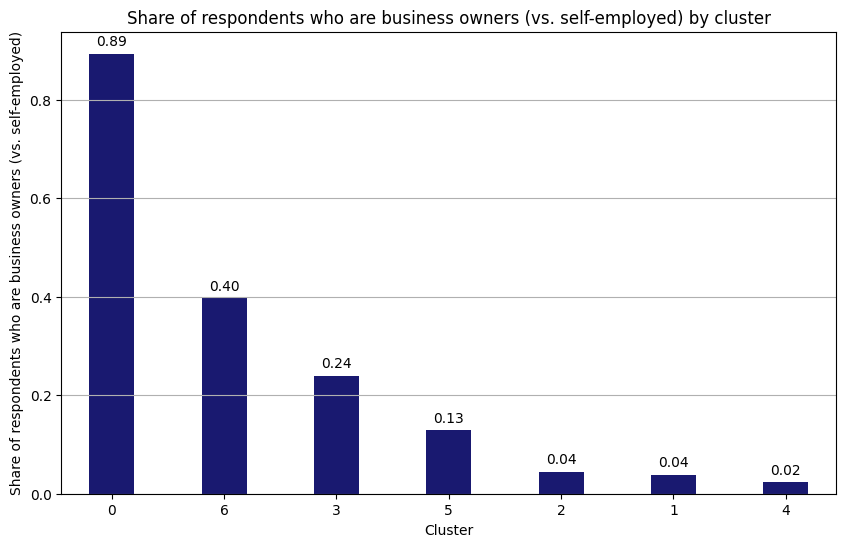

In [56]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P3033']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who are business owners (vs. self-employed)')
plt.title('Share of respondents who are business owners (vs. self-employed) by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*average monthly consumption*

In [57]:
np.average(emicron[emicron['cluster']==3]['CONSUMO_INTERMEDIO'], weights=emicron[emicron['cluster']==3]['CONSUMO_INTERMEDIO'])

14866564.12823207

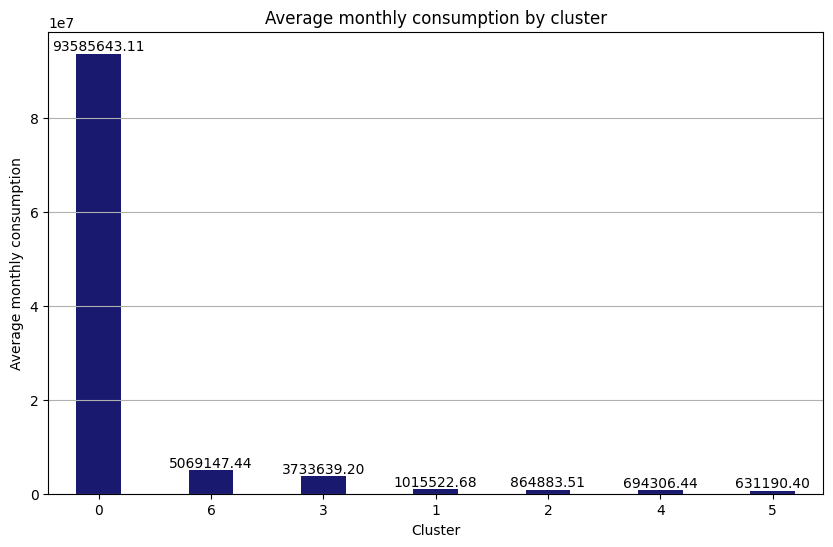

In [58]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['CONSUMO_INTERMEDIO']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Average monthly consumption')
plt.title('Average monthly consumption by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*does the business have a commercial name? 1 yes 2 no*

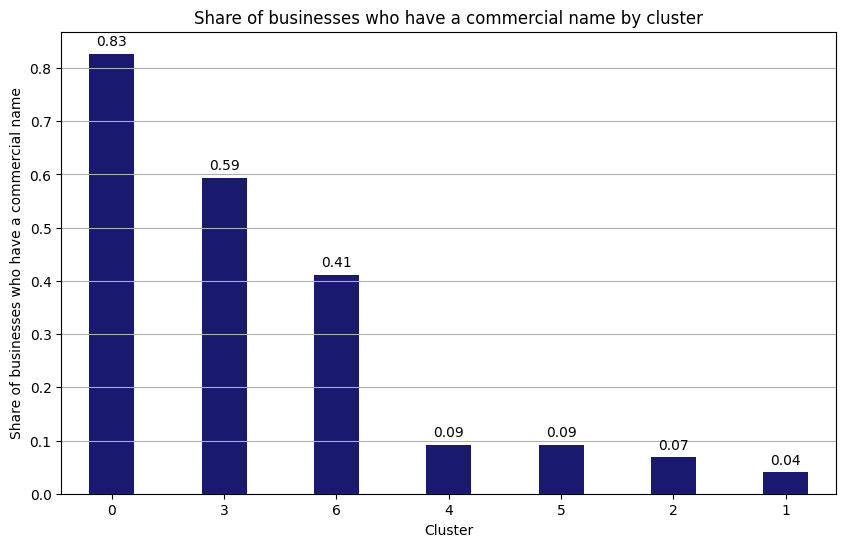

In [59]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P3035']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of businesses who have a commercial name')
plt.title('Share of businesses who have a commercial name by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*social benefits paid per month*

In [60]:
np.average(emicron[emicron['cluster']==3]['PRESTACIONES'], weights=emicron[emicron['cluster']==3]['PRESTACIONES'])

463801.8587584049

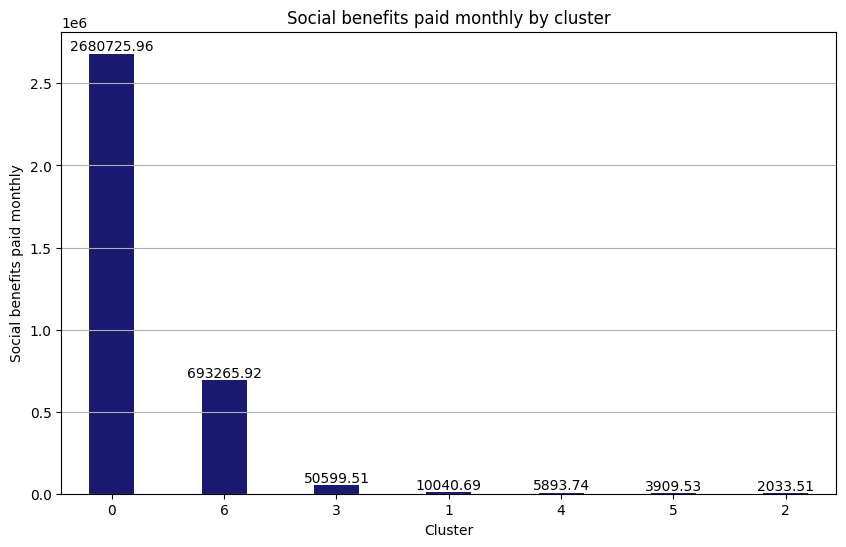

In [61]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['PRESTACIONES']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Social benefits paid monthly')
plt.title('Social benefits paid monthly by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*if anyone helps in the business*

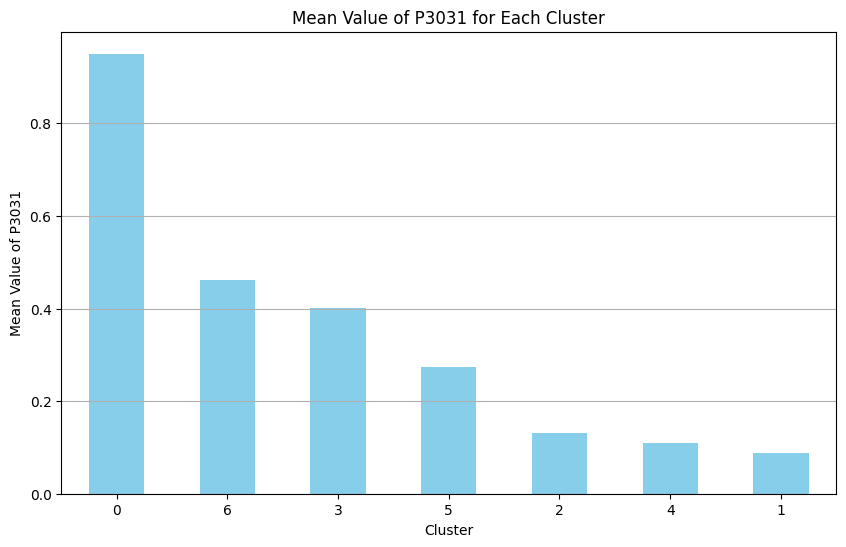

In [62]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P3031']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of P3031')
plt.title('Mean Value of P3031 for Each Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()

*does the business use technological devices?*

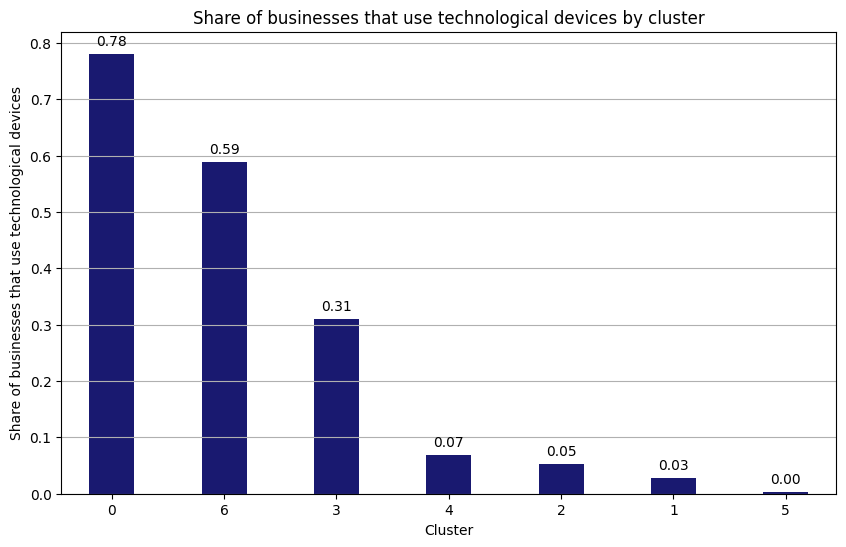

In [63]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P4001']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of businesses that use technological devices')
plt.title('Share of businesses that use technological devices by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

COSTOS_MES_ANTERIOR

In [64]:
np.average(emicron[emicron['cluster']==3]['COSTOS_MES_ANTERIOR'], weights=emicron[emicron['cluster']==3]['COSTOS_MES_ANTERIOR'])

15578127.622093644

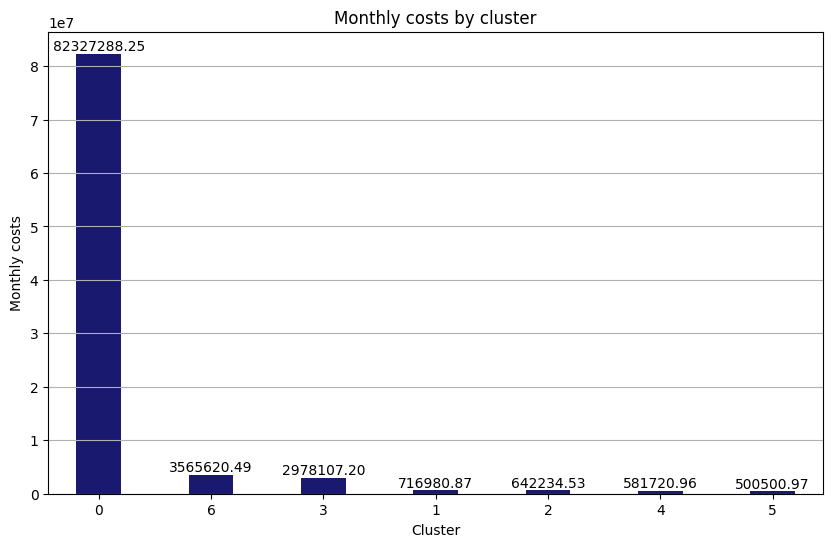

In [65]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['COSTOS_MES_ANTERIOR']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Monthly costs')
plt.title('Monthly costs by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*have paid ARL?*

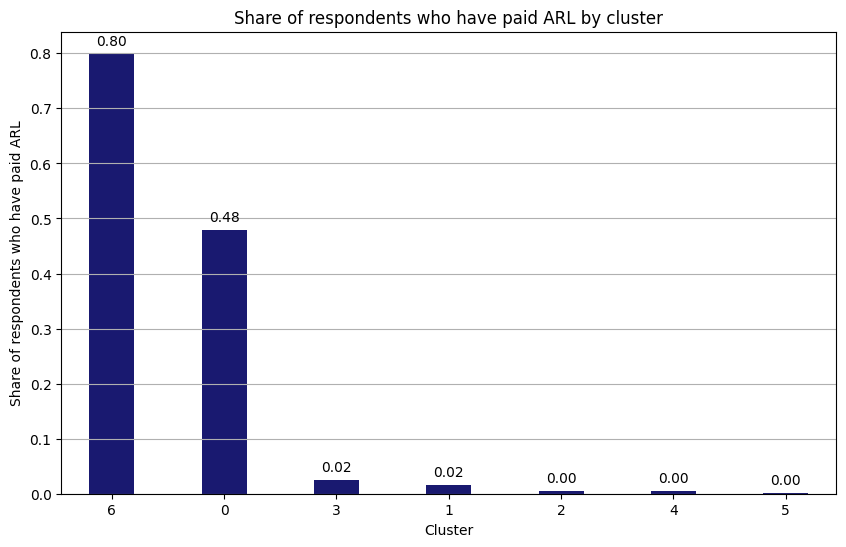

In [66]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P3090']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who have paid ARL')
plt.title('Share of respondents who have paid ARL by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*does the business have internet?*

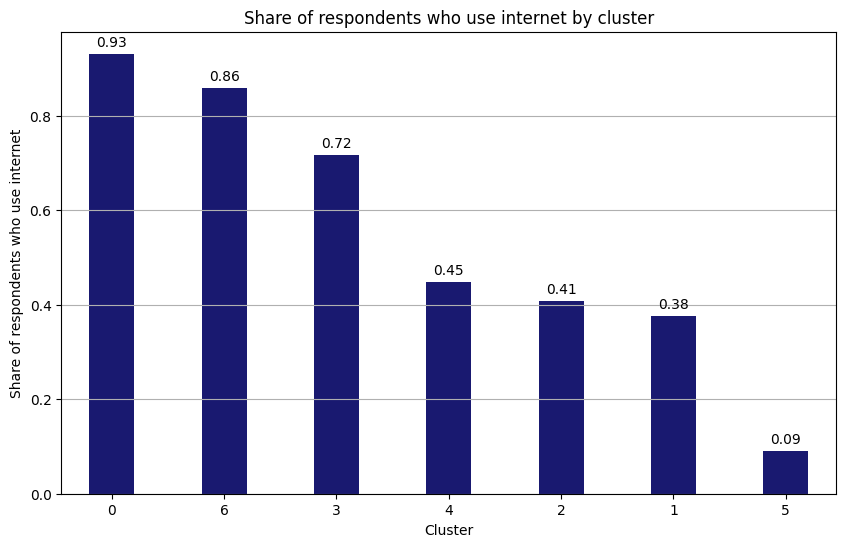

In [67]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P2524']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who use internet')
plt.title('Share of respondents who use internet by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*average monthly sales*

In [68]:
np.average(emicron[emicron['cluster']==3]['P3072'], weights=emicron[emicron['cluster']==3]['P3072'])

2764419.8999804296

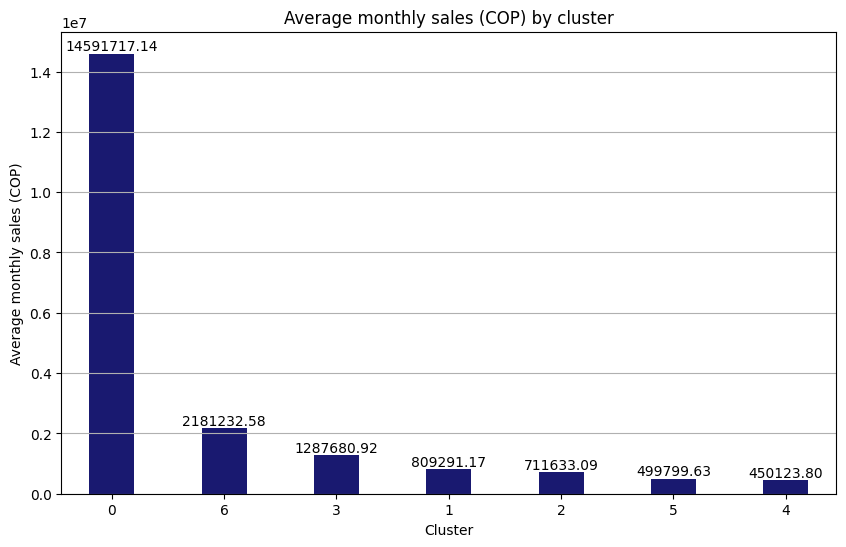

In [69]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P3072']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Average monthly sales (COP)')
plt.title('Average monthly sales (COP) by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*monthly costs*

In [70]:
np.average(emicron[emicron['cluster']==3]['GASTOS_MES'], weights=emicron[emicron['cluster']==3]['GASTOS_MES'])

1958521.581315916

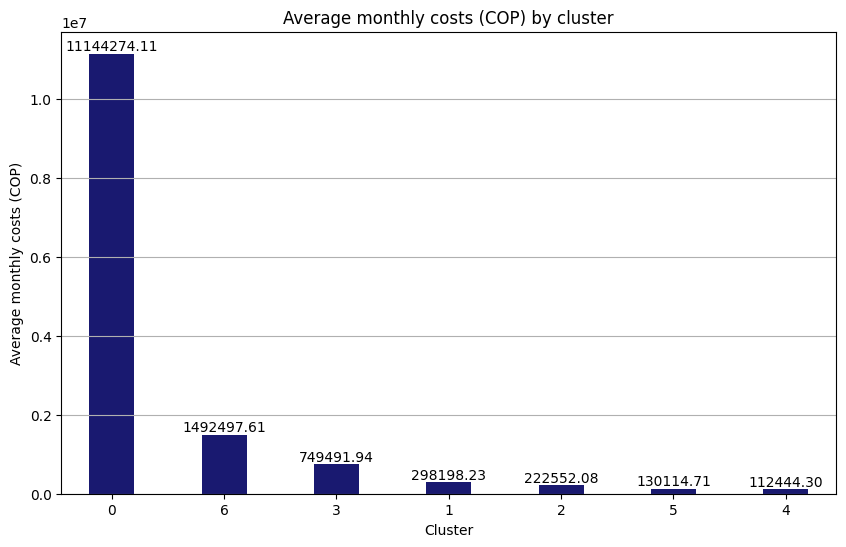

In [71]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['GASTOS_MES']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Average monthly costs (COP)')
plt.title('Average monthly costs (COP) by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*do you have email?*

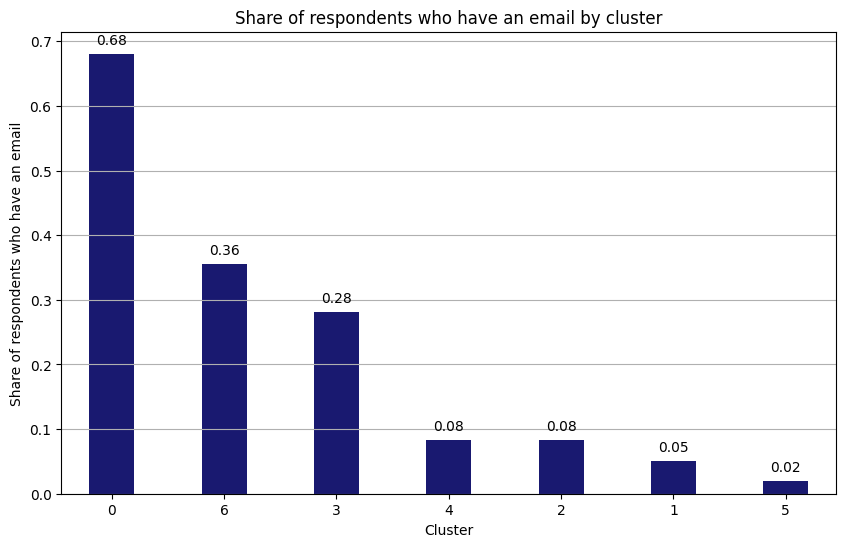

In [72]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P3000']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who have an email')
plt.title('Share of respondents who have an email by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*social network?*

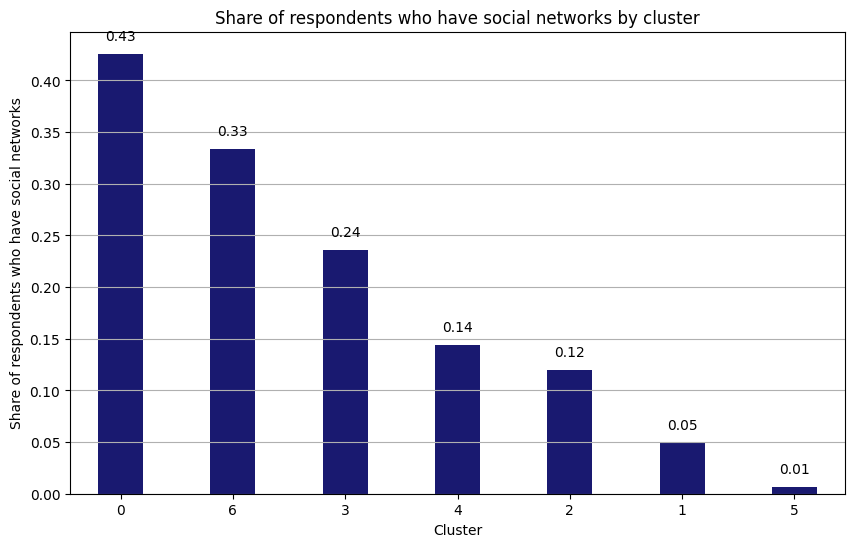

In [73]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P1559']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who have social networks')
plt.title('Share of respondents who have social networks by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*do you have a telephone*

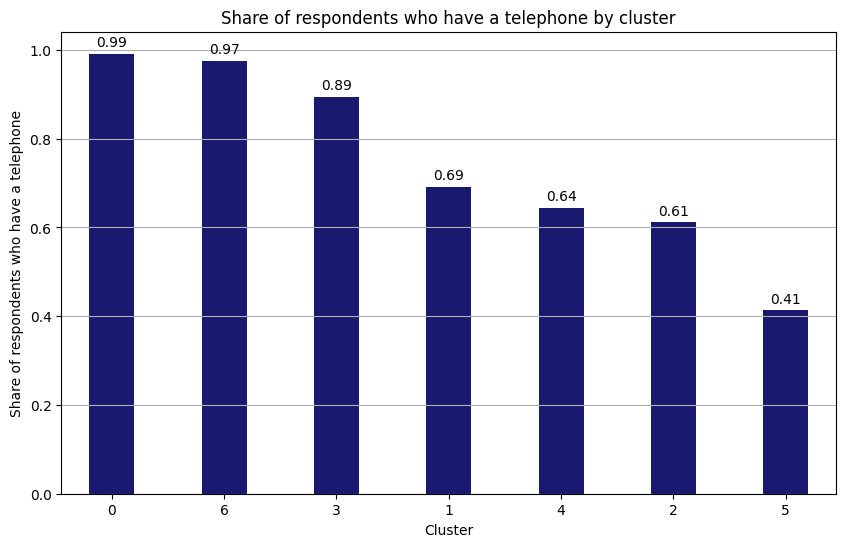

In [74]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P976']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who have a telephone')
plt.title('Share of respondents who have a telephone by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*do you pay SENA or ICBF*

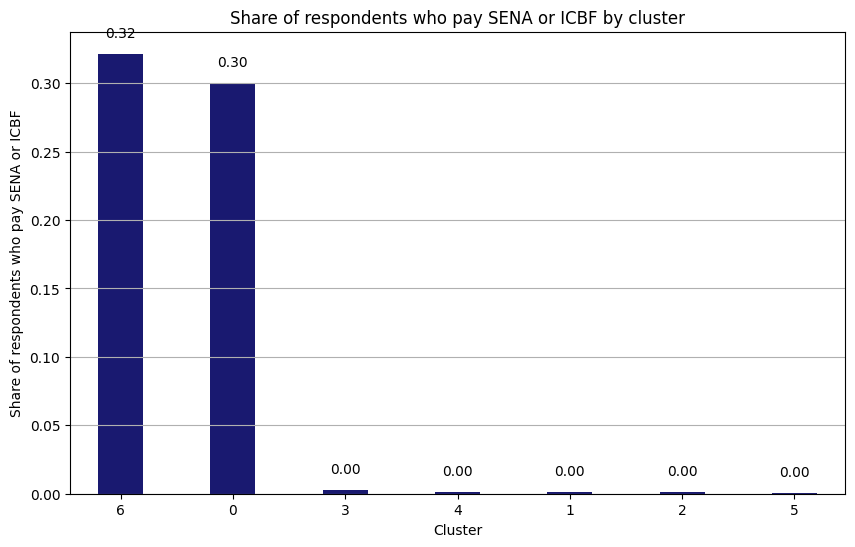

In [75]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P2989']-1)
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who pay SENA or ICBF')
plt.title('Share of respondents who pay SENA or ICBF by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*did you pay healthcare or pension last month?*

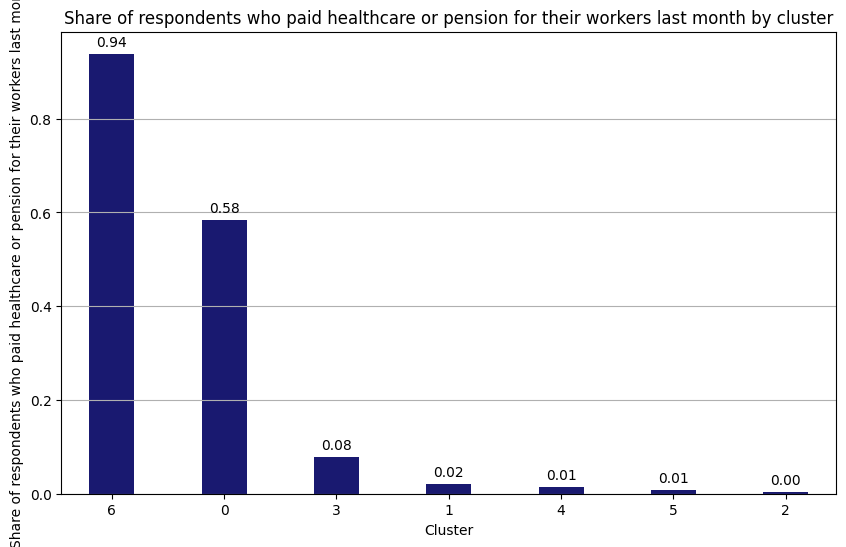

In [76]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = 1-(df['P3088']-1)
    values[values < 0] = 0
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who paid healthcare or pension for their workers last month')
plt.title('Share of respondents who paid healthcare or pension for their workers last month by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*added value monthly*

In [77]:
np.average(emicron[emicron['cluster']==3]['VALOR_AGREGADO'], weights=emicron[emicron['cluster']==3]['F_EXP'])

1643625.0038978995

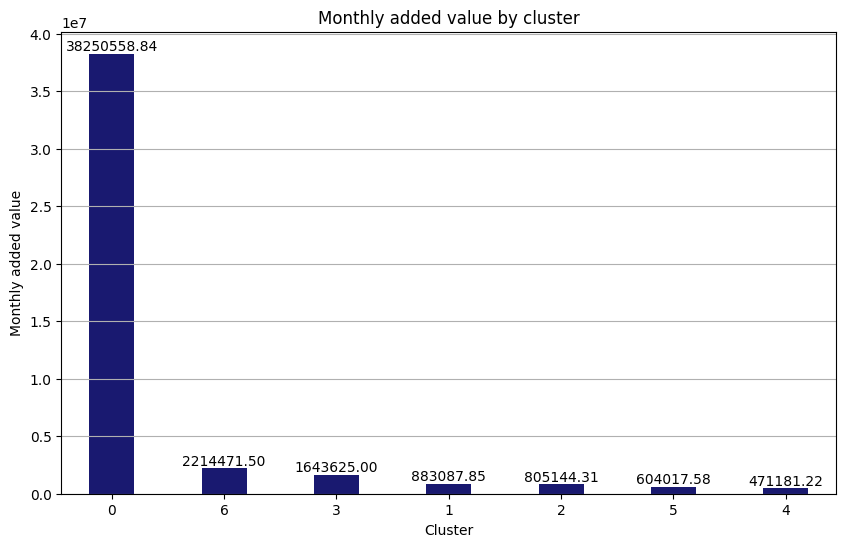

In [78]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['VALOR_AGREGADO']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Monthly added value')
plt.title('Monthly added value by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*which industrial category? 12*

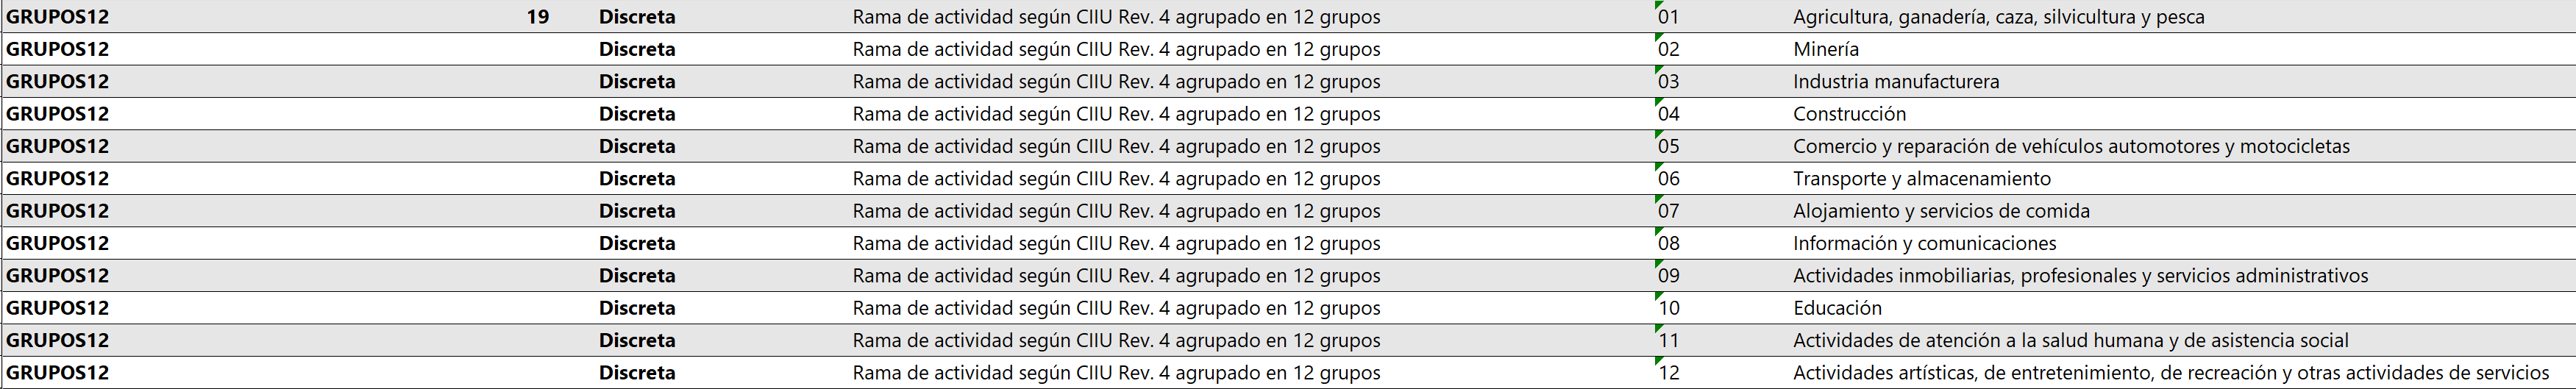

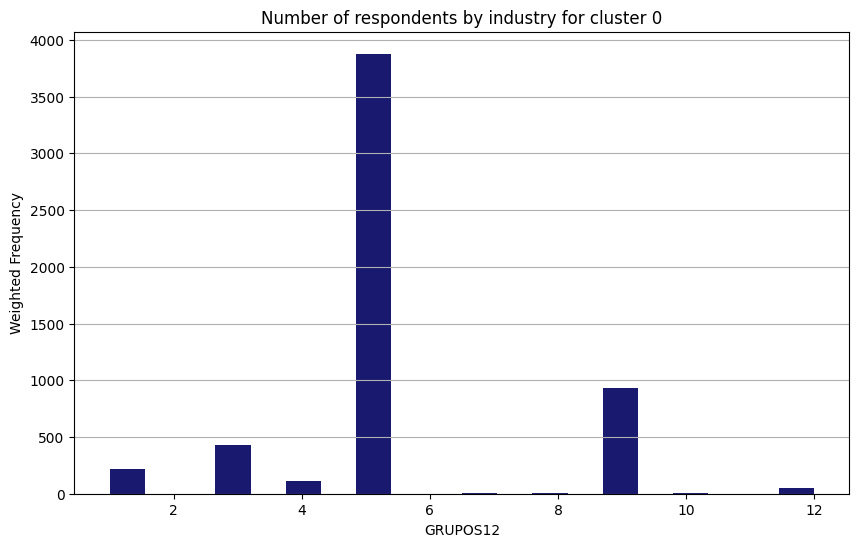

2657     5
2851     5
3381     5
4736     5
5606     5
        ..
73029    5
74083    5
74515    3
74529    9
76773    5
Name: GRUPOS12, Length: 91, dtype: int64


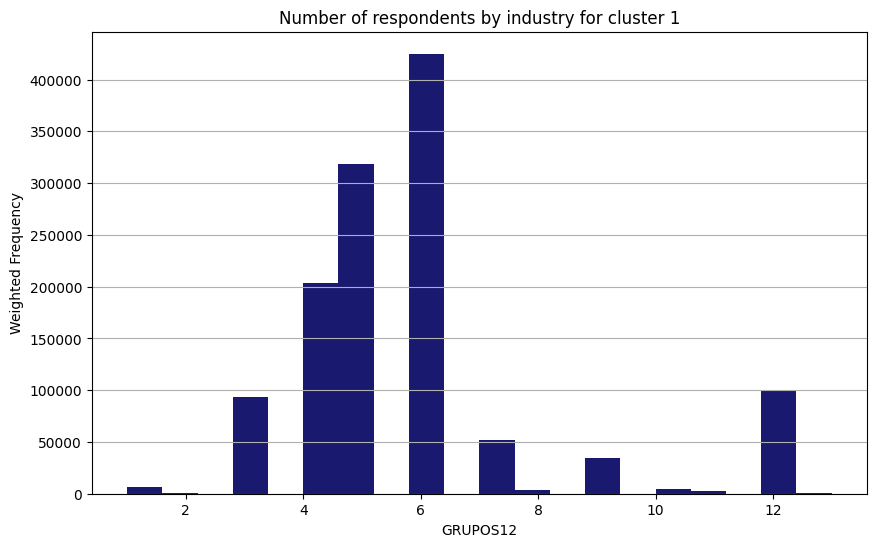

1        6
5        6
6        5
12       6
13       6
        ..
77592    4
77593    5
77600    6
77601    5
77605    5
Name: GRUPOS12, Length: 26484, dtype: int64


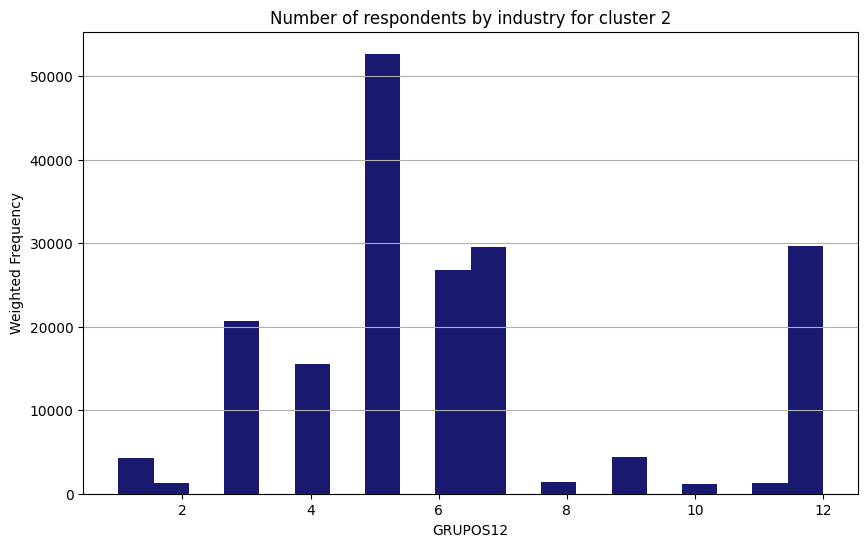

3         5
7         5
8         6
9        12
39        6
         ..
77337     3
77482     1
77524     5
77590     7
77598     5
Name: GRUPOS12, Length: 3600, dtype: int64


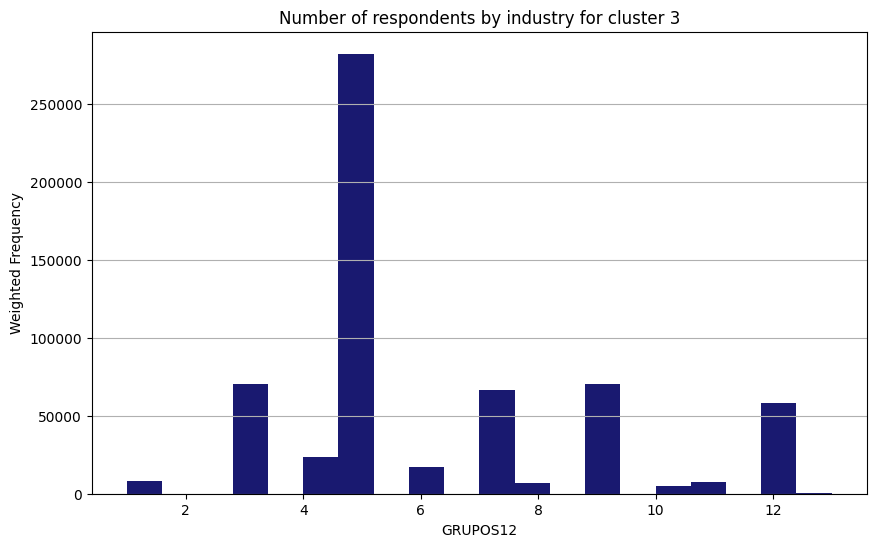

31        5
55        7
71        5
79        9
80        5
         ..
77567     3
77570     4
77581     7
77596    12
77603     9
Name: GRUPOS12, Length: 10716, dtype: int64


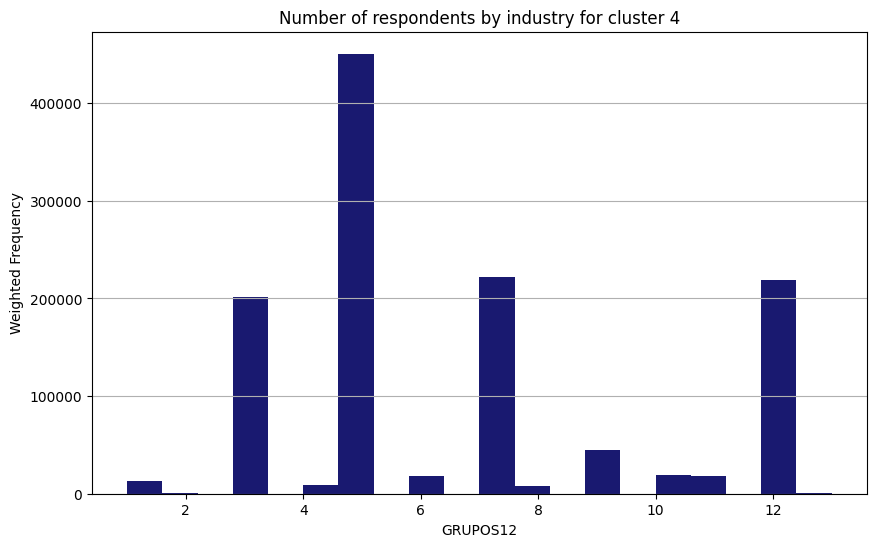

0         5
2        10
10        5
20       12
21        5
         ..
77582     5
77588    10
77589     5
77594    12
77597     5
Name: GRUPOS12, Length: 21968, dtype: int64


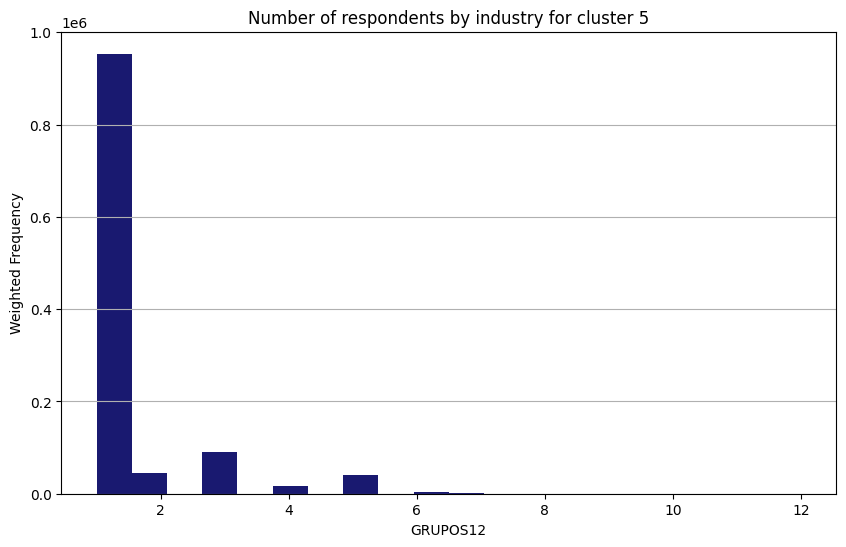

4        1
11       3
17       1
19       1
25       1
        ..
77585    1
77586    1
77587    1
77595    1
77604    1
Name: GRUPOS12, Length: 10569, dtype: int64


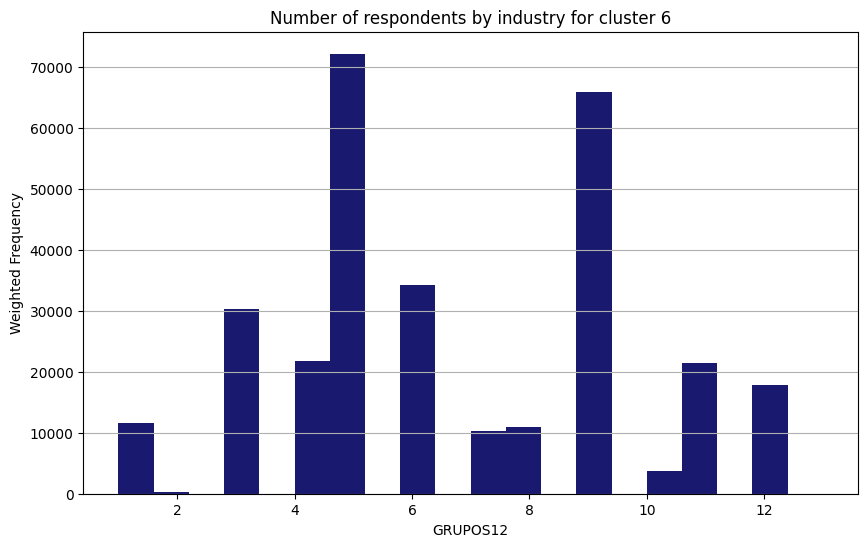

139       3
145       1
146      11
150       3
161       3
         ..
77564     6
77571     4
77572     5
77599     5
77602     7
Name: GRUPOS12, Length: 4178, dtype: int64


In [79]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(10, 6))
    plt.hist(data['GRUPOS12'], bins=20, weights=data['F_EXP'], color='#191970')
    plt.xlabel('GRUPOS12')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Number of respondents by industry for cluster {cluster}')
    plt.grid(axis='y')
    plt.show()
    print(data['GRUPOS12'])

*which industrial category? 4*

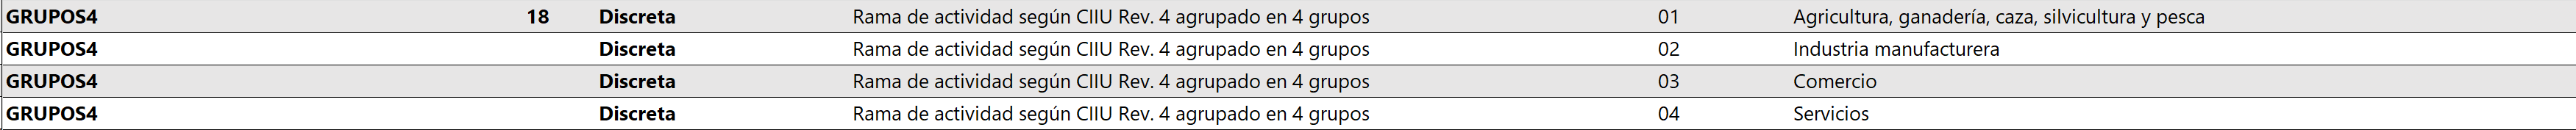

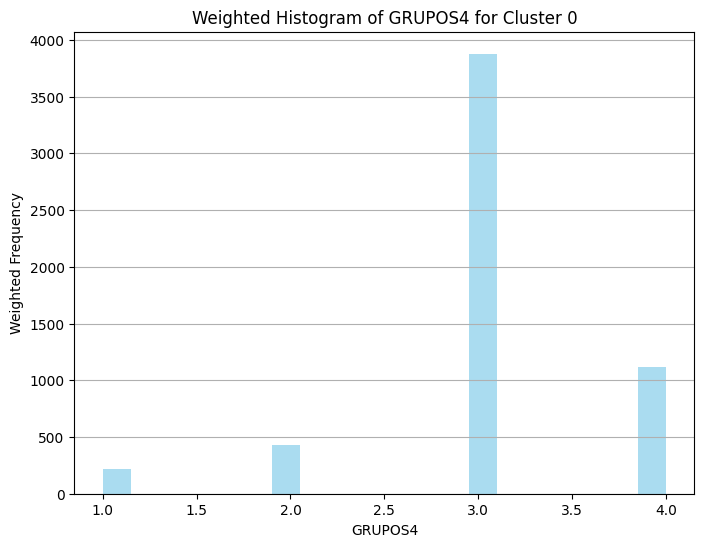

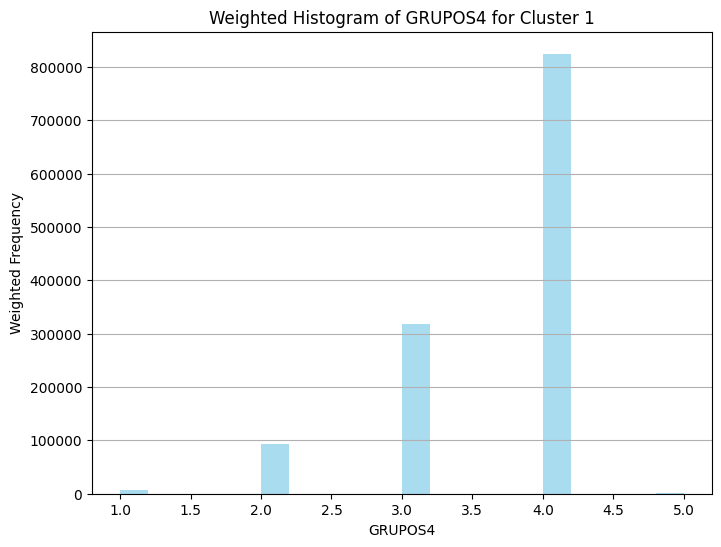

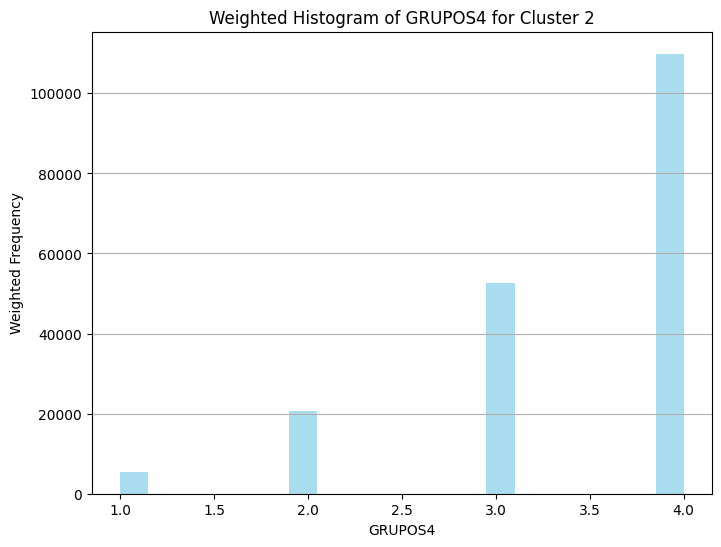

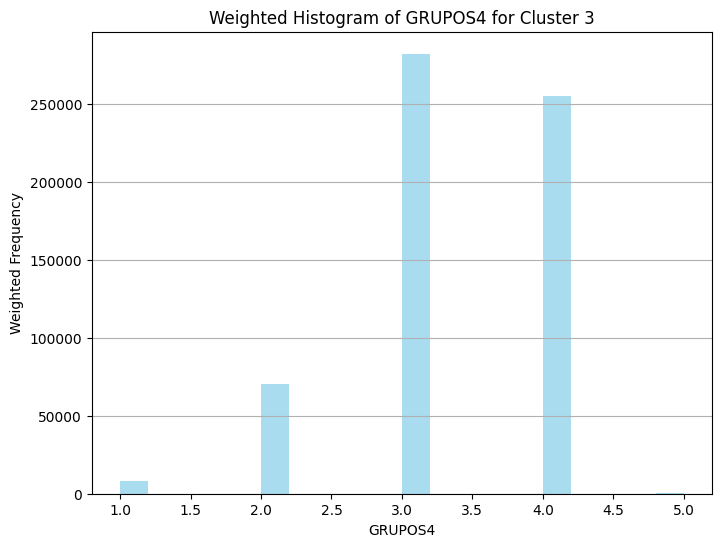

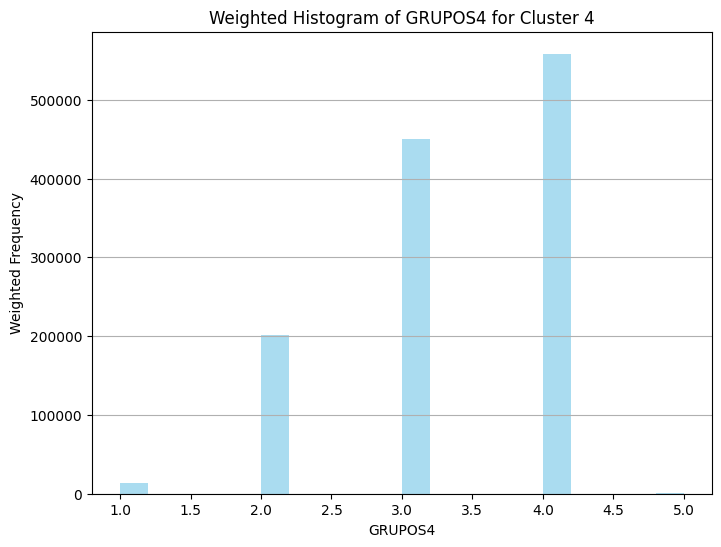

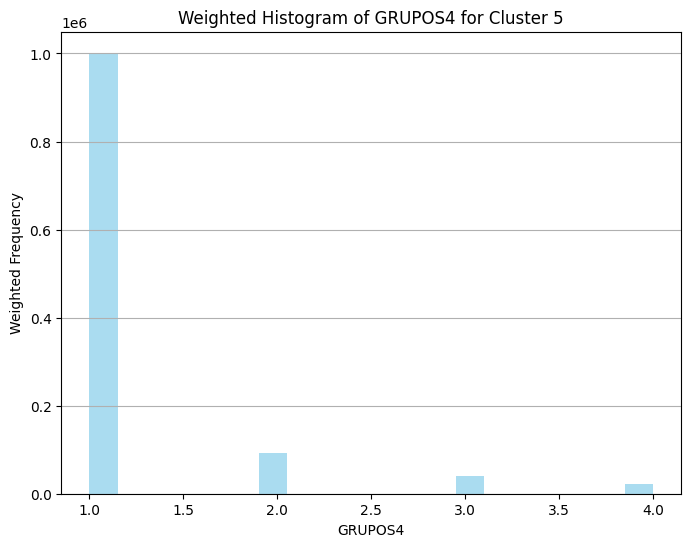

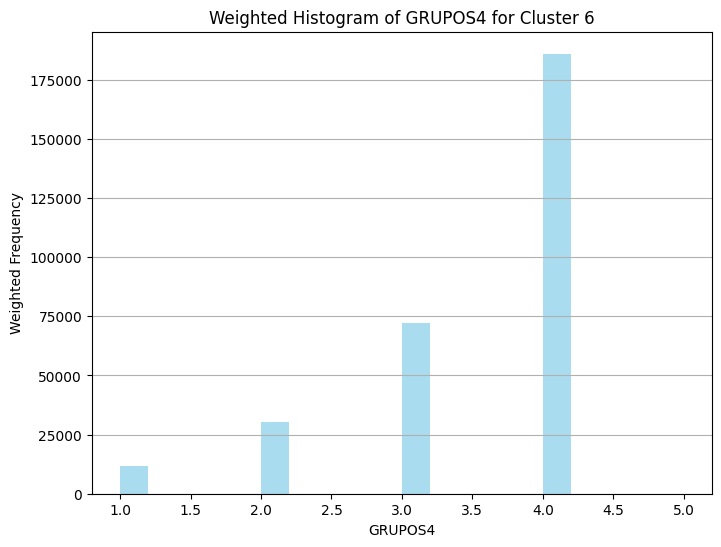

In [80]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['GRUPOS4'], bins=20, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('GRUPOS4')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of GRUPOS4 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

*Municipal Head Offices*

*Populated Centres and Dispersed Rural Areas*

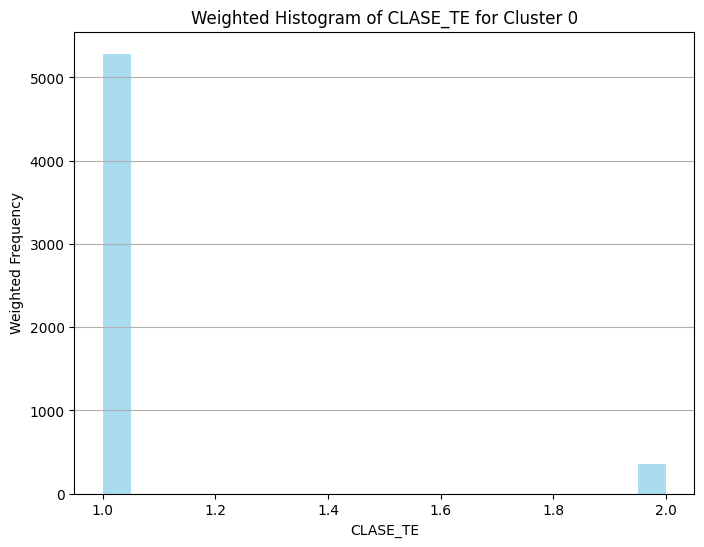

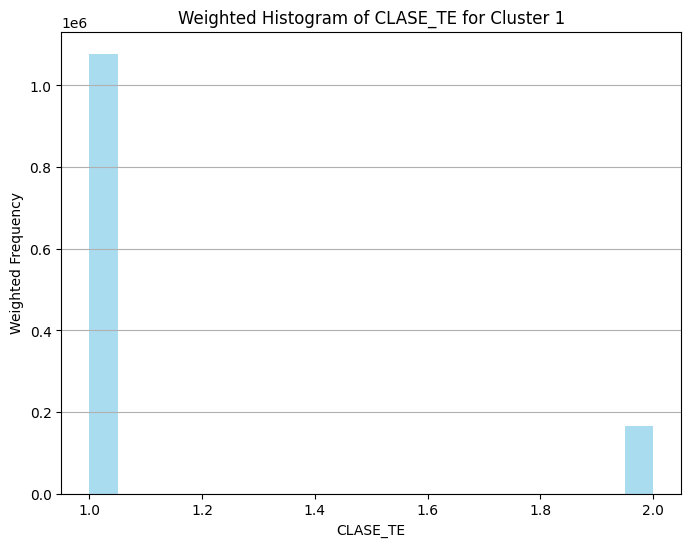

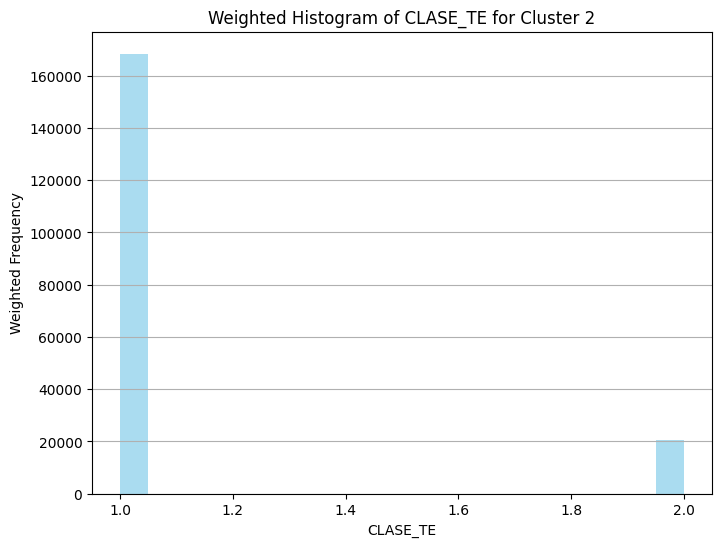

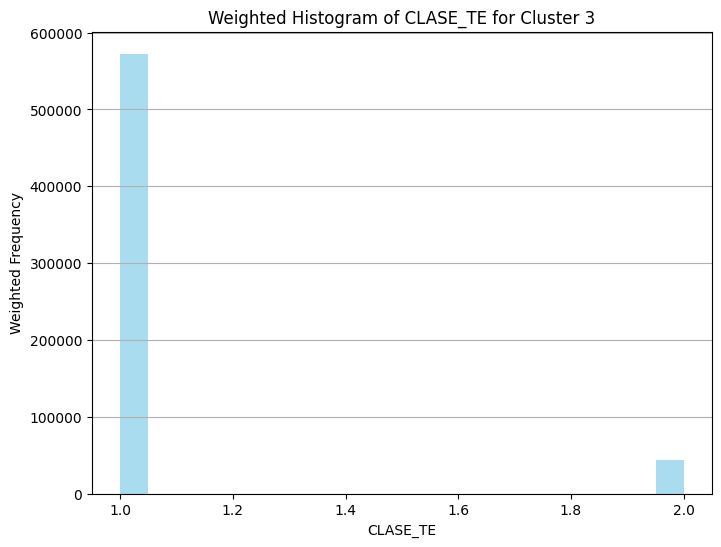

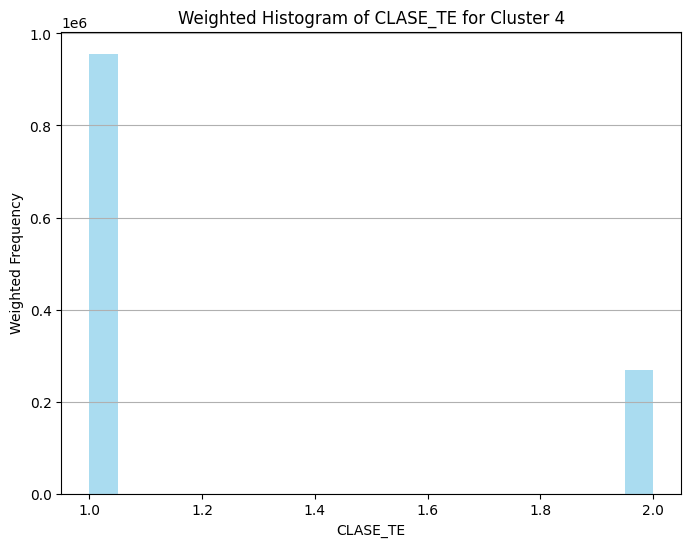

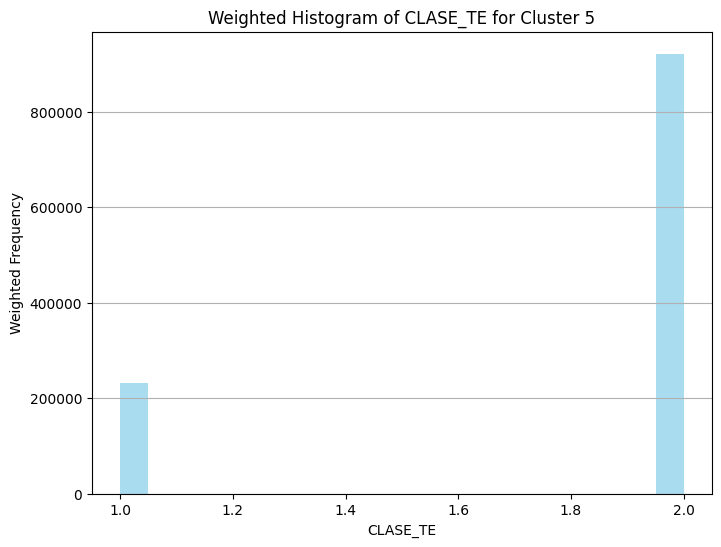

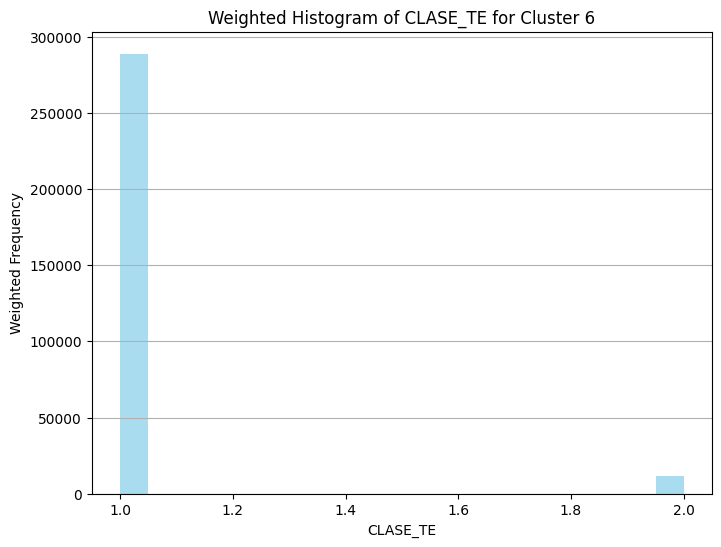

In [81]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['CLASE_TE'], bins=20, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('CLASE_TE')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of CLASE_TE for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

*P3373: where born*

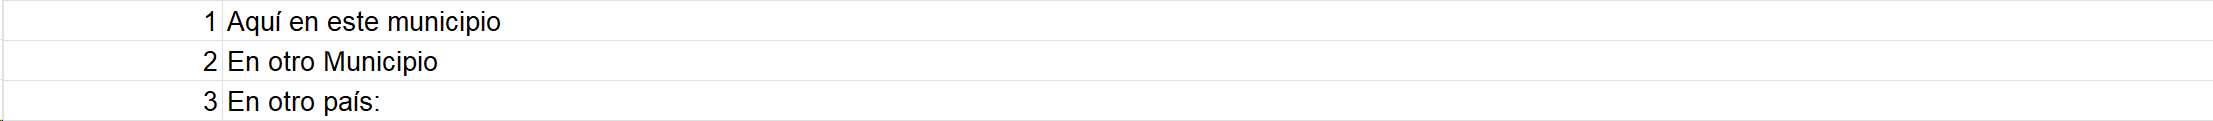

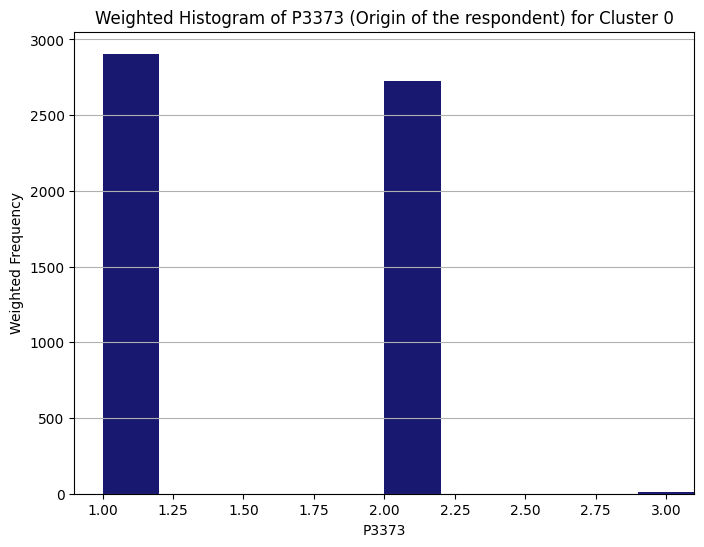

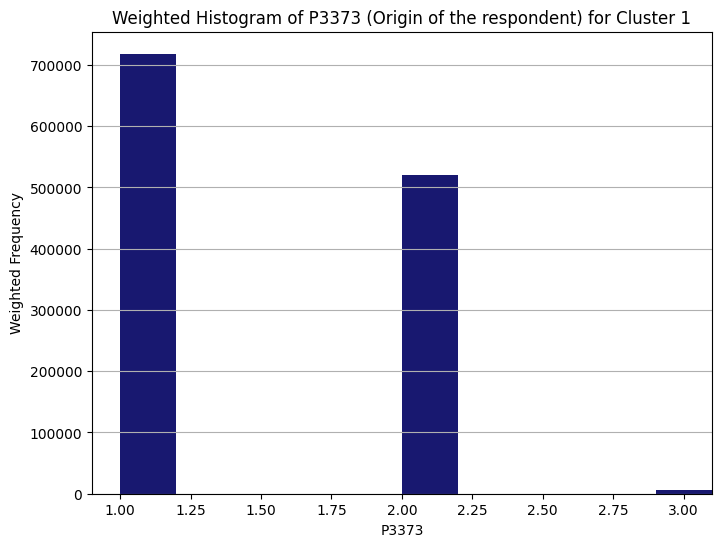

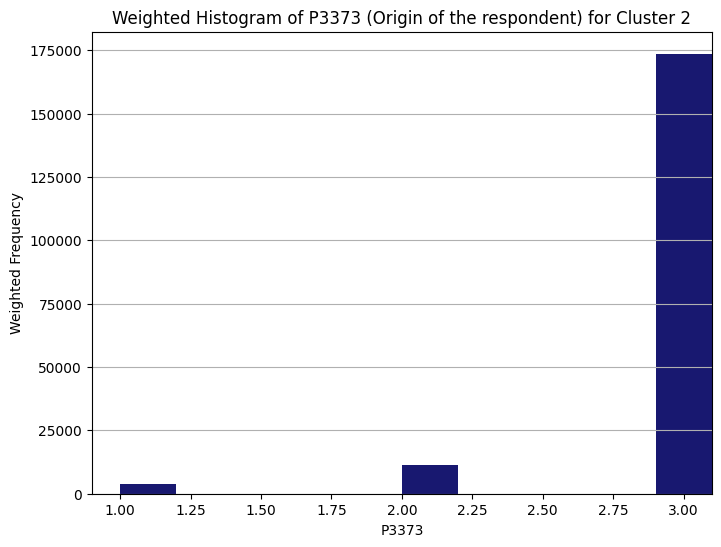

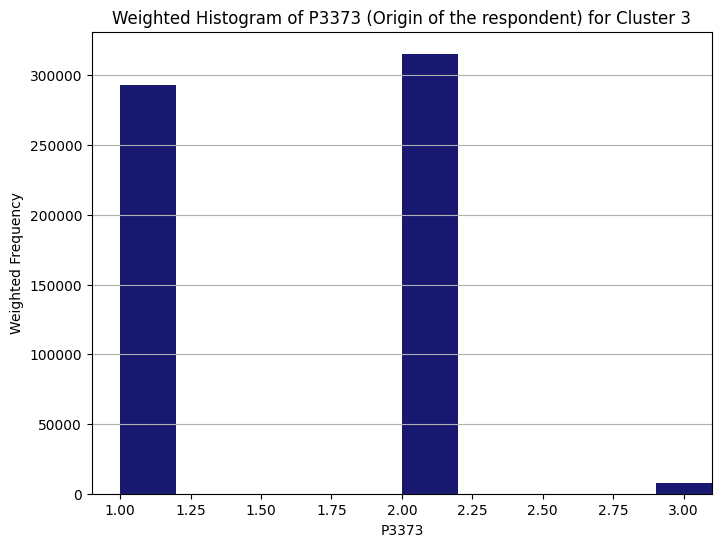

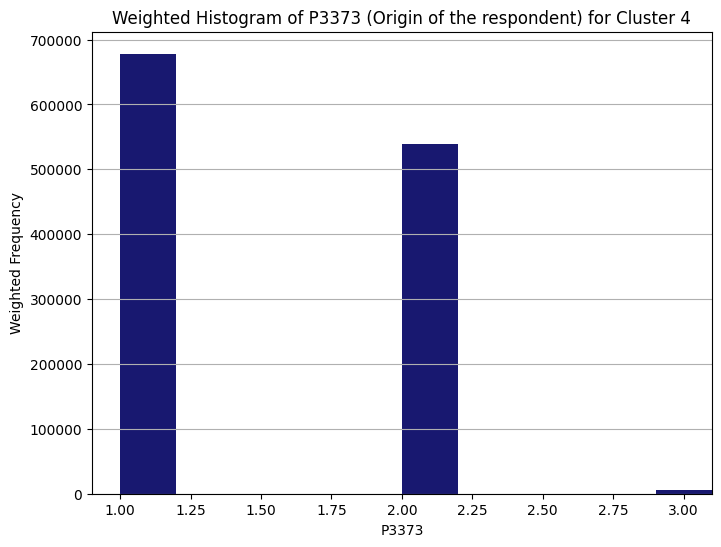

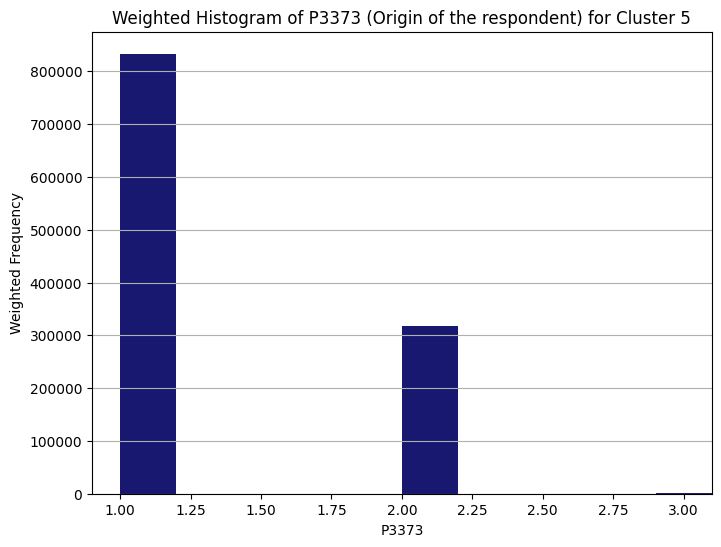

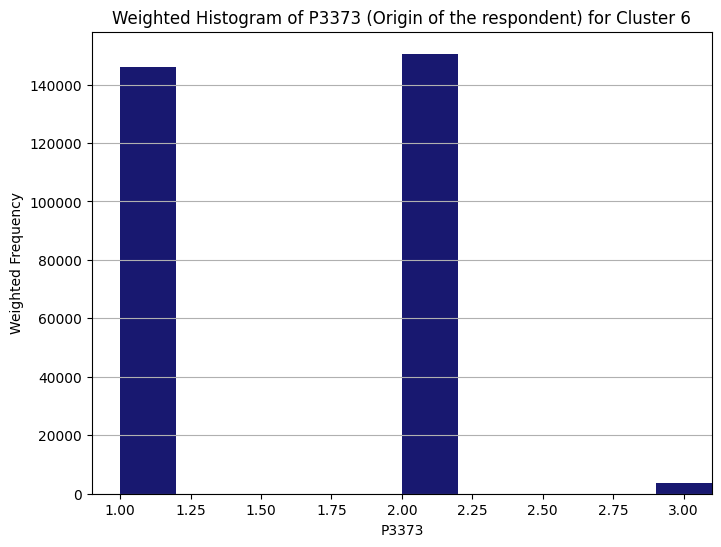

In [82]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P3373'], bins=20, weights=data['F_EXP'], color='#181870', width=0.2)
    plt.xlabel('P3373')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P3373 (Origin of the respondent) for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()


In [83]:
# Initialize an empty dictionary to store the results
weighted_percentages = {}

# Loop over each cluster
for cluster, data in emicron.groupby('cluster'):
    # Calculate the total weight in the cluster
    total_weight = data['F_EXP'].sum()

    # Calculate the sum of weights where 'P3373' is 3
    weight_value_3 = data.loc[data['P3373'] == 3, 'F_EXP'].sum()

    # Calculate the weighted percentage
    weighted_percentage = (weight_value_3 / total_weight) * 100

    # Store the result in the dictionary
    weighted_percentages[cluster] = weighted_percentage

# Print the results
for cluster, percentage in weighted_percentages.items():
    print(f'Cluster {cluster}: {percentage:.2f}%')

Cluster 0: 0.26%
Cluster 1: 0.46%
Cluster 2: 91.96%
Cluster 3: 1.21%
Cluster 4: 0.51%
Cluster 5: 0.12%
Cluster 6: 1.24%


*urban: if 1 they are in city, if 0 rural area*

In [84]:
np.average(emicron[emicron['cluster']==3]['urban'], weights=emicron[emicron['cluster']==3]['F_EXP'])

0.6444395082928983

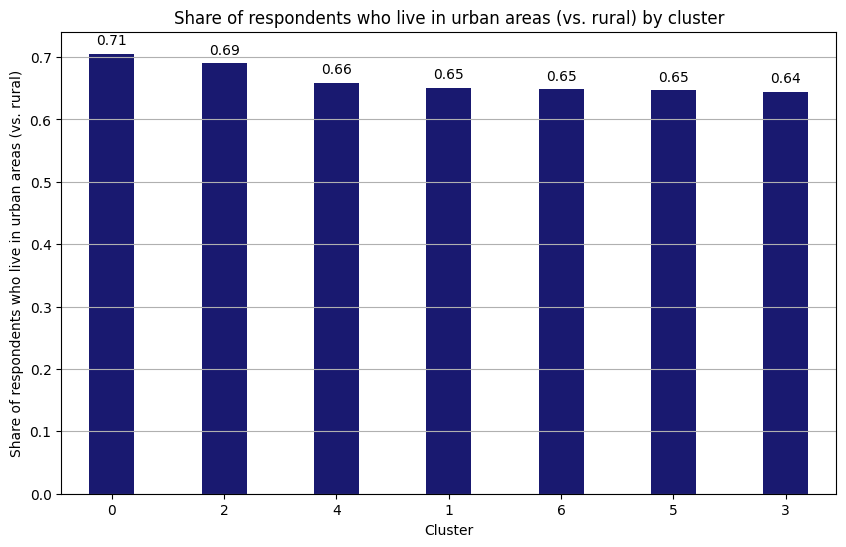

In [85]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['urban']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who live in urban areas (vs. rural)')
plt.title('Share of respondents who live in urban areas (vs. rural) by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*P3374: nationality*

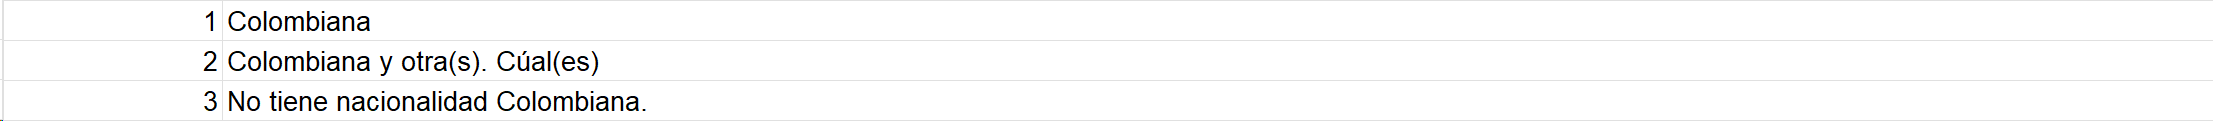

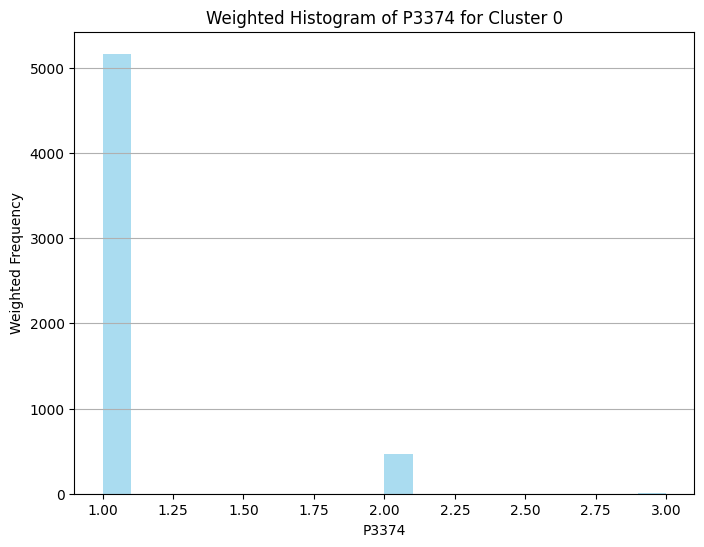

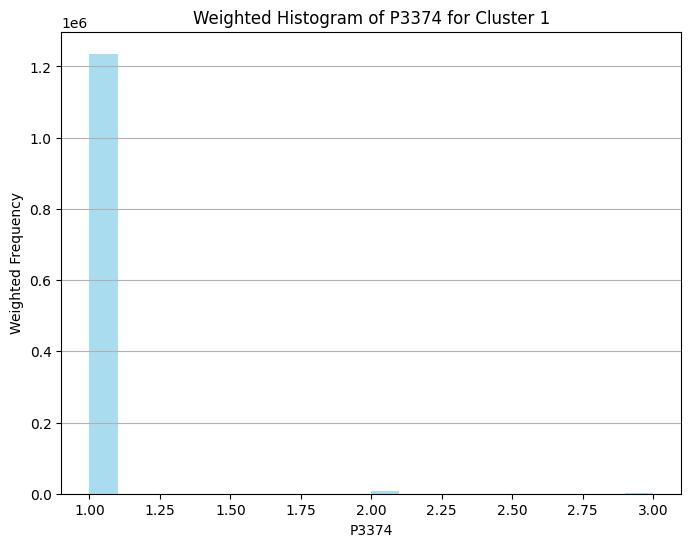

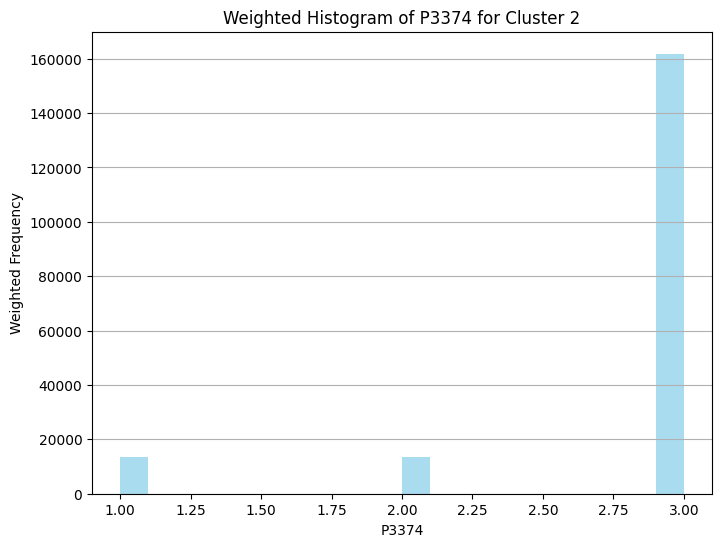

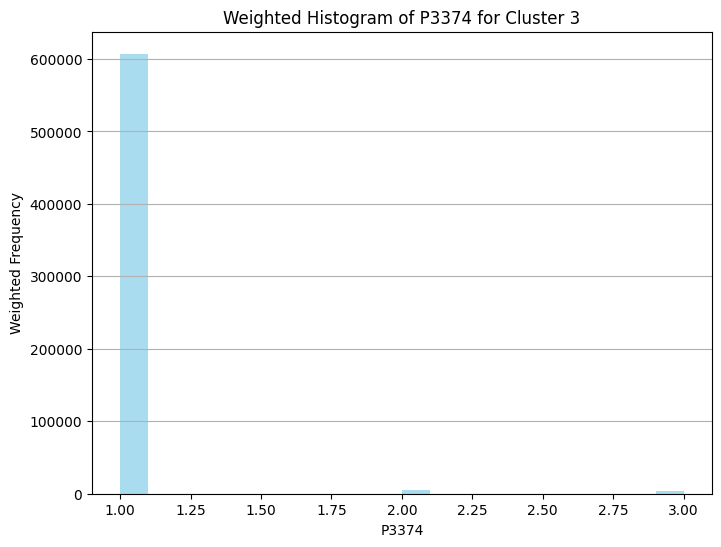

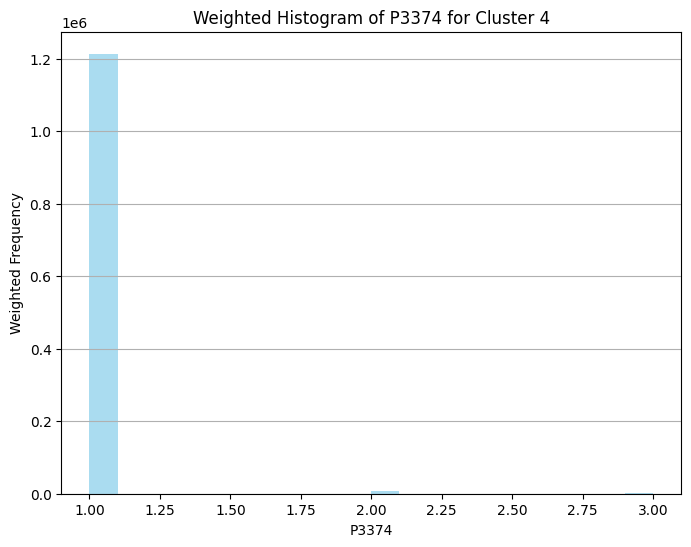

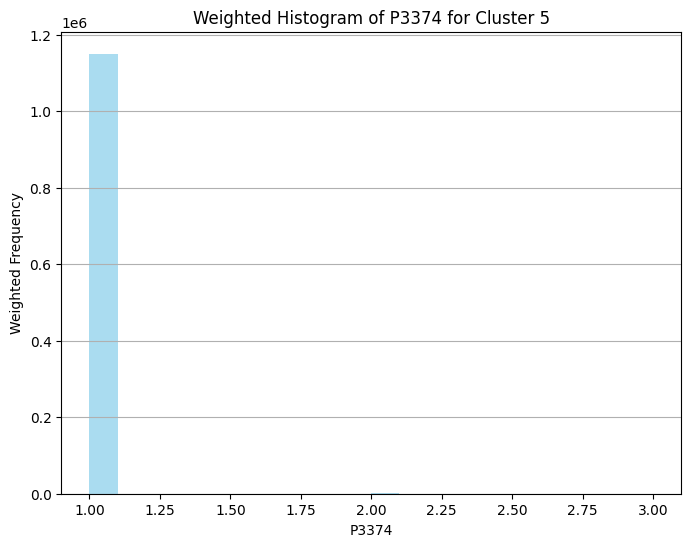

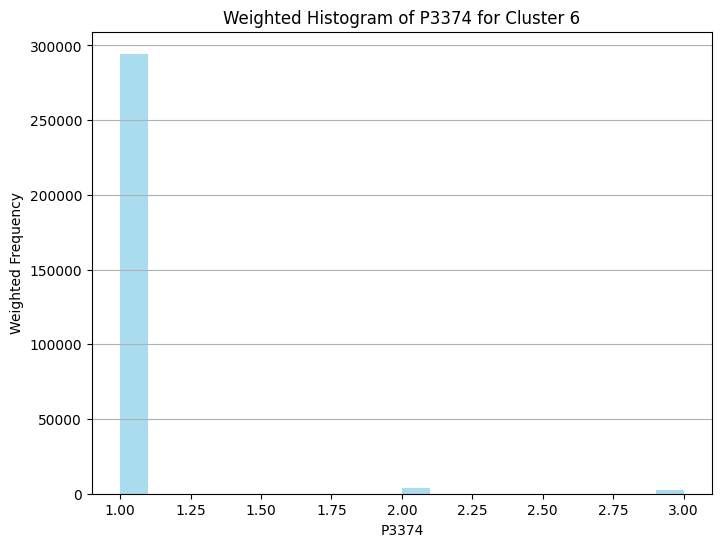

In [86]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P3374'], bins=20, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P3374')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P3374 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

*establishment of business (physical location)*

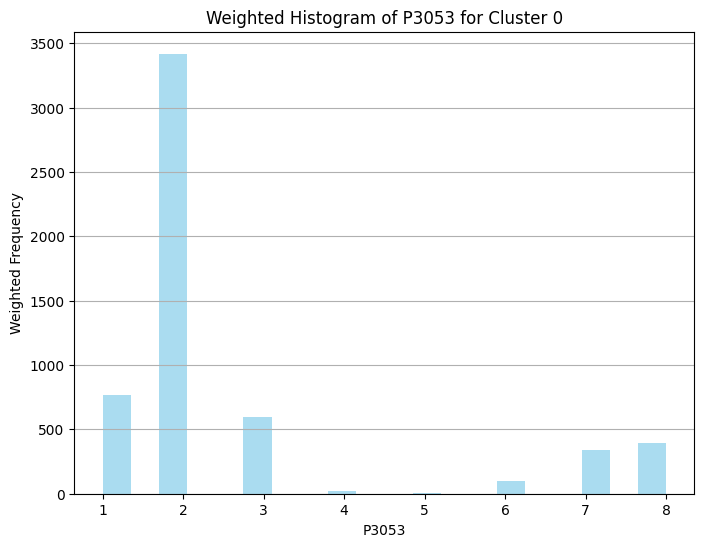

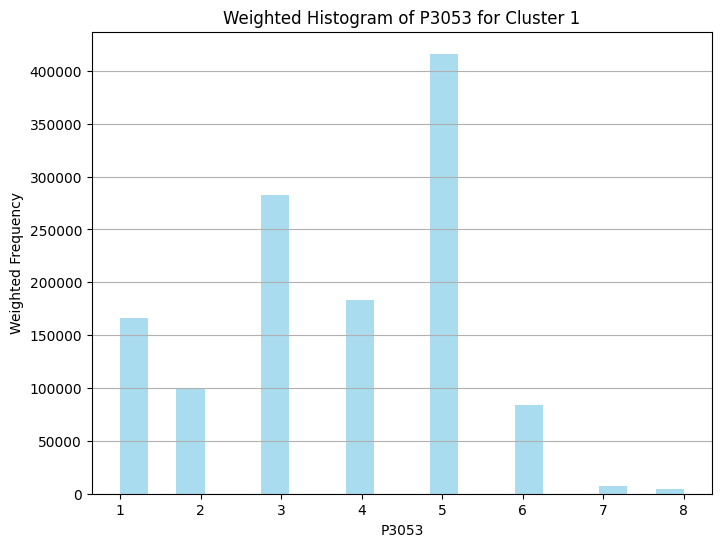

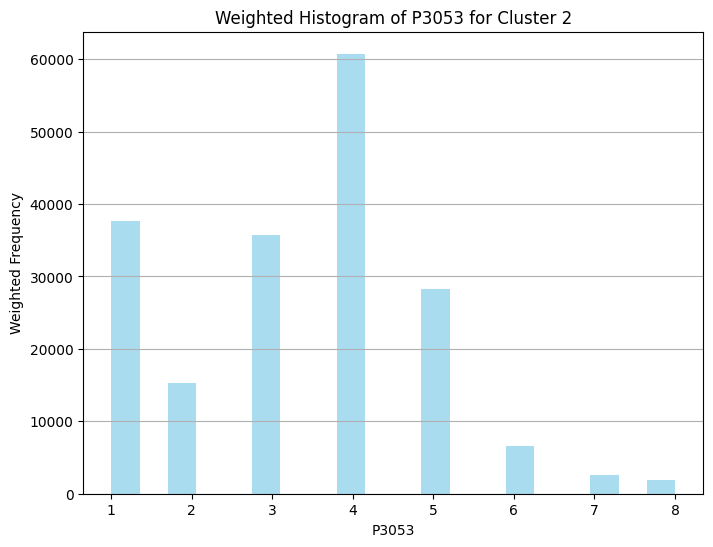

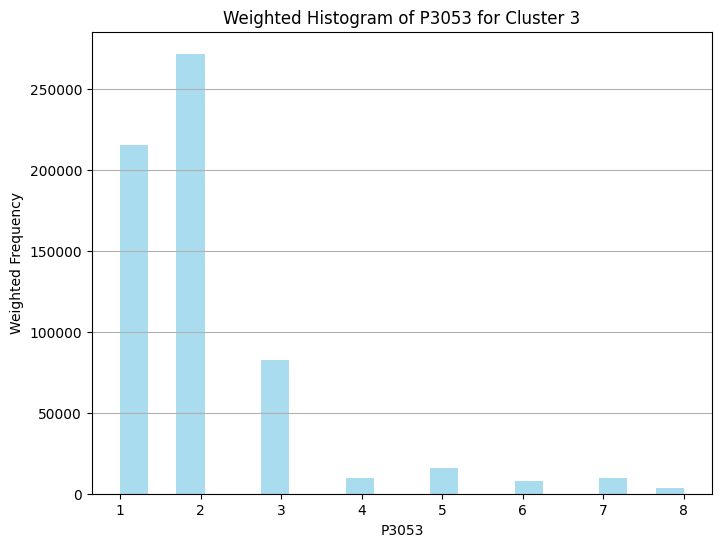

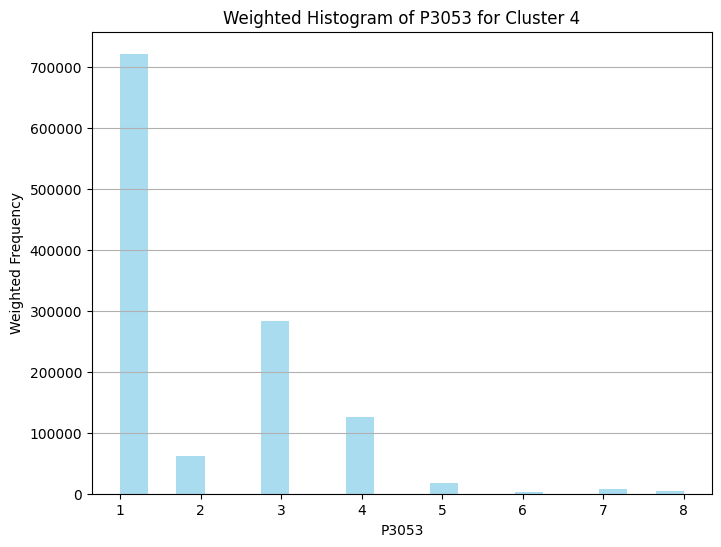

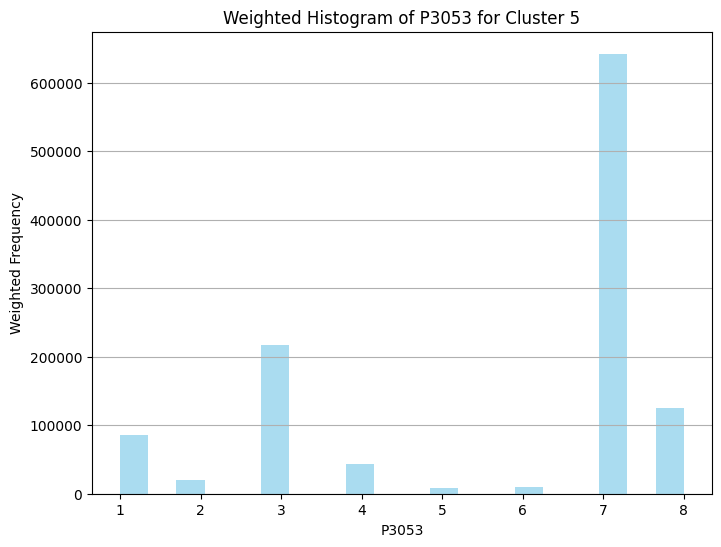

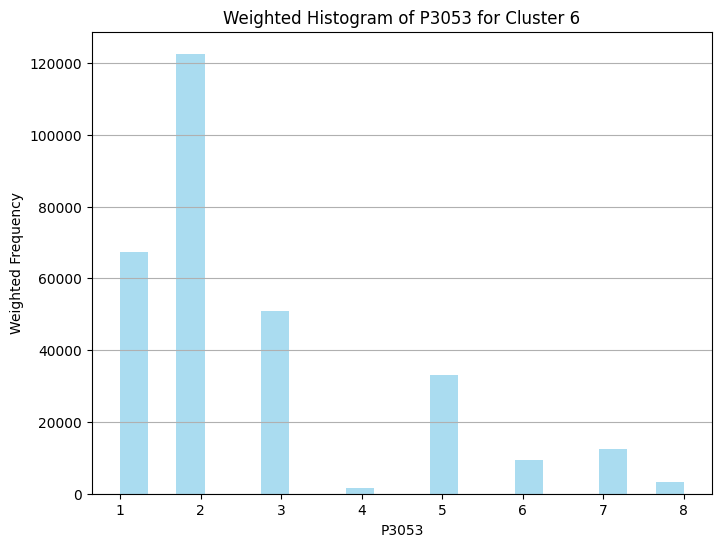

In [87]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P3053'], bins=20, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P3053')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P3053 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

*how many months have you been working in this establishment?*

In [88]:
np.average(emicron[emicron['cluster']==3]['P3034'], weights=emicron[emicron['cluster']==3]['P3034'])

248.1058454478787

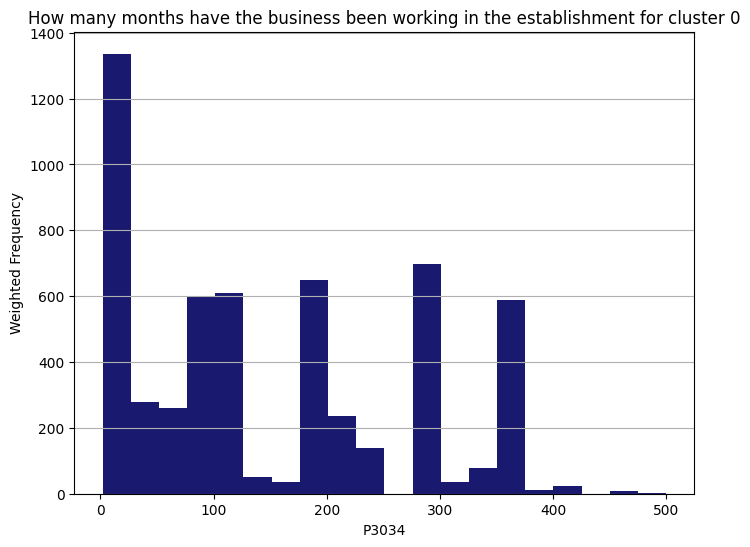

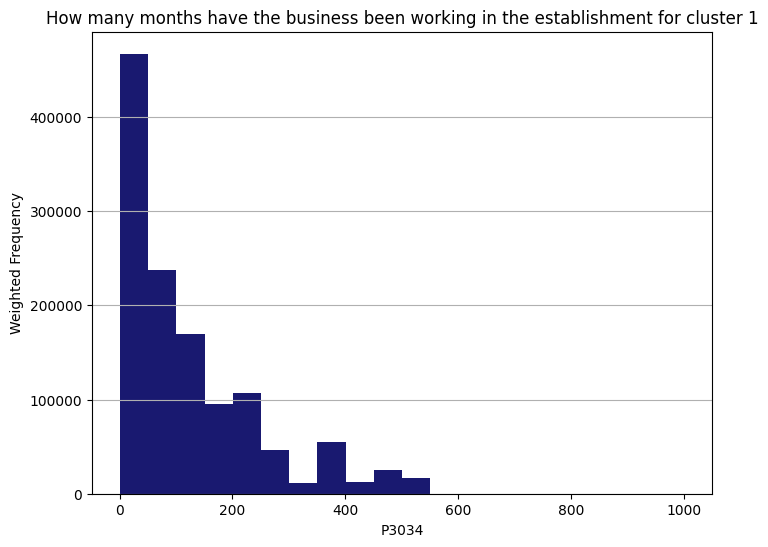

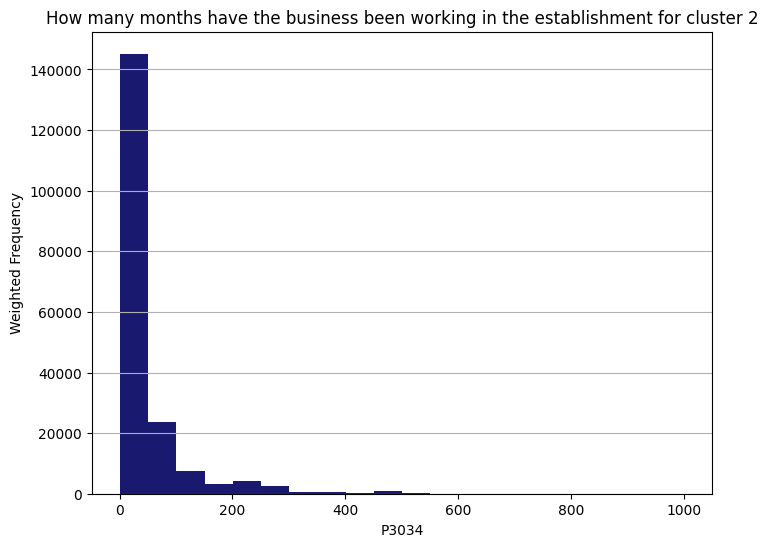

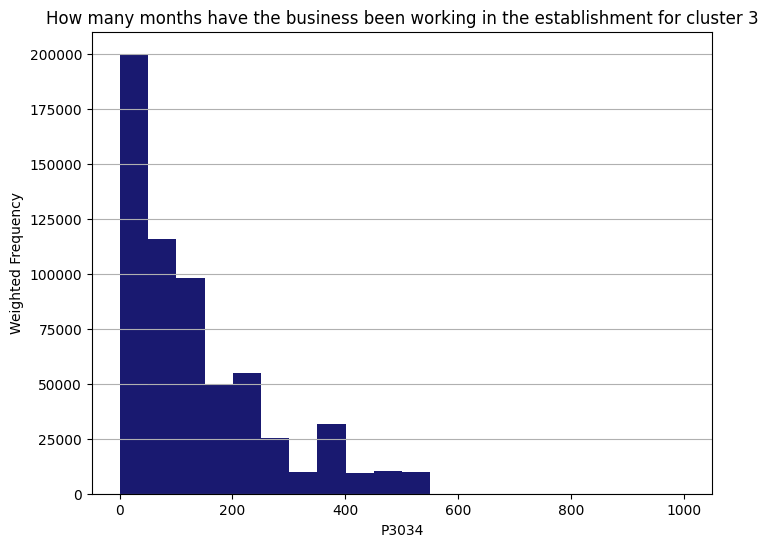

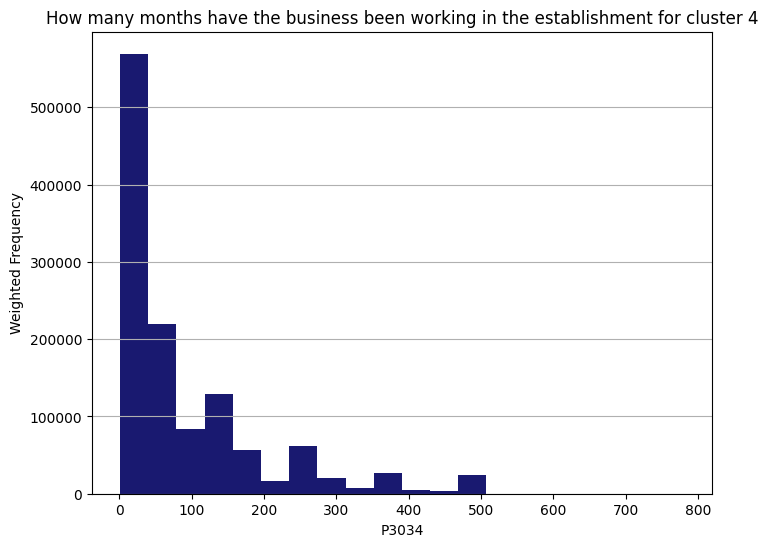

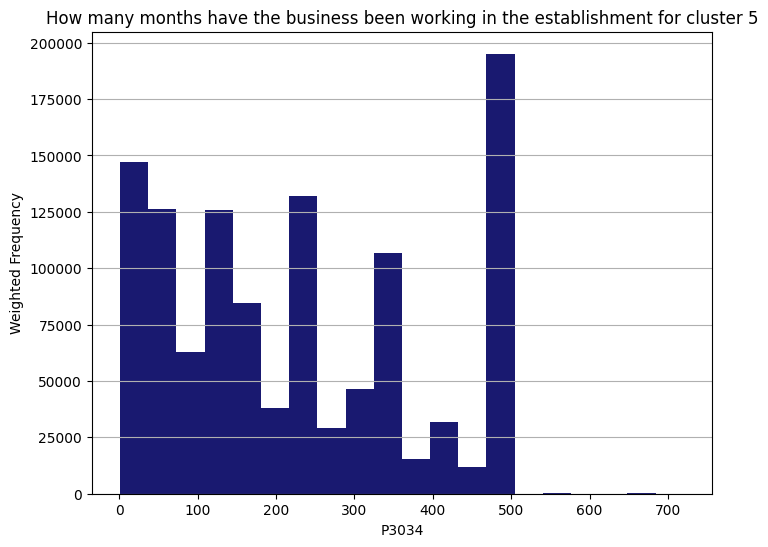

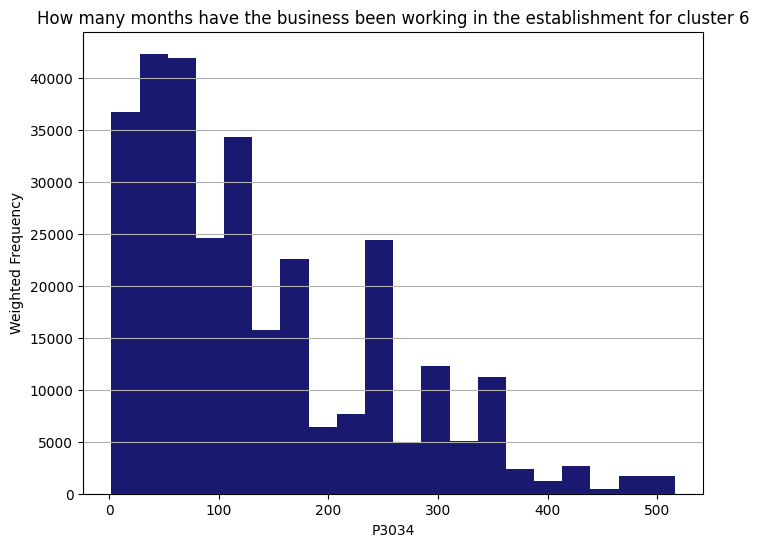

In [89]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P3034'], bins=20, weights=data['F_EXP'], color='#191970')
    plt.xlabel('P3034')
    plt.ylabel('Weighted Frequency')
    plt.title(f'How many months have the business been working in the establishment for cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

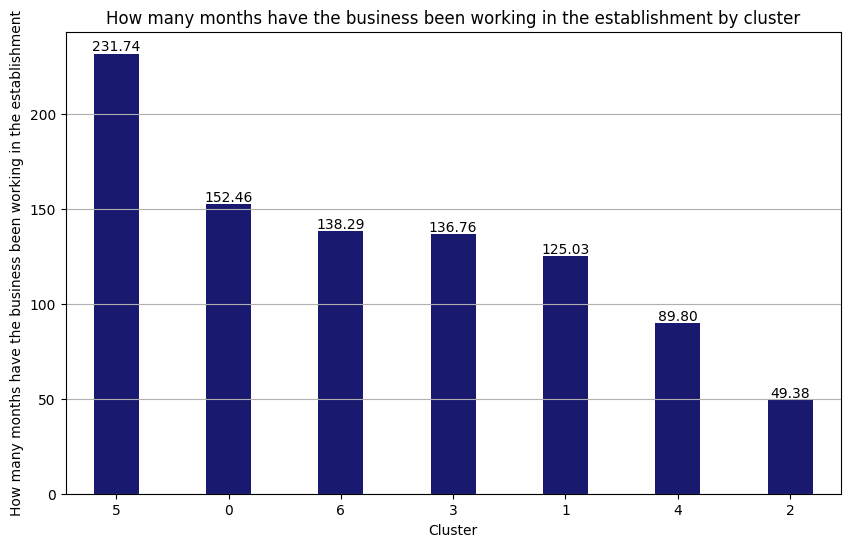

In [90]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P3034']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('How many months have the business been working in the establishment')
plt.title('How many months have the business been working in the establishment by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*How much time has this business working?*

In [91]:
np.average(emicron[emicron['cluster']==3]['P639'], weights=emicron[emicron['cluster']==3]['P639'])

4.3553508150248055

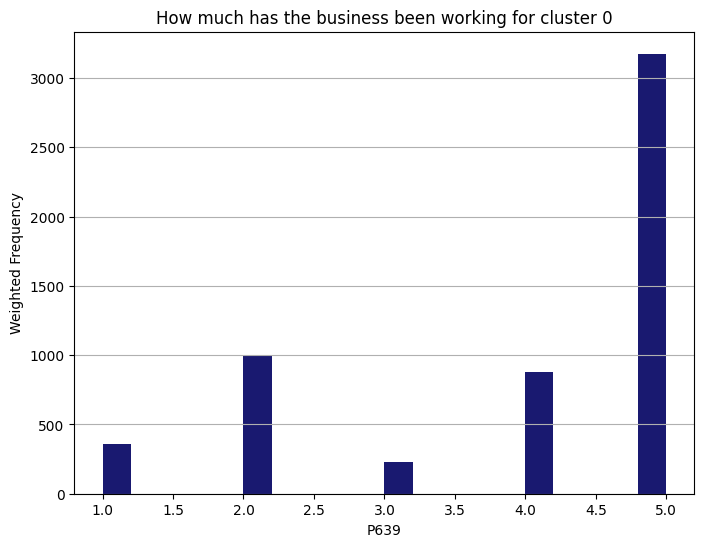

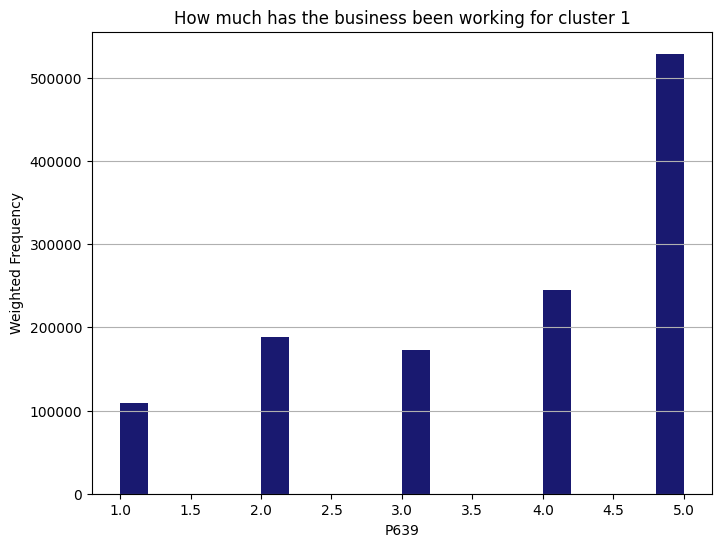

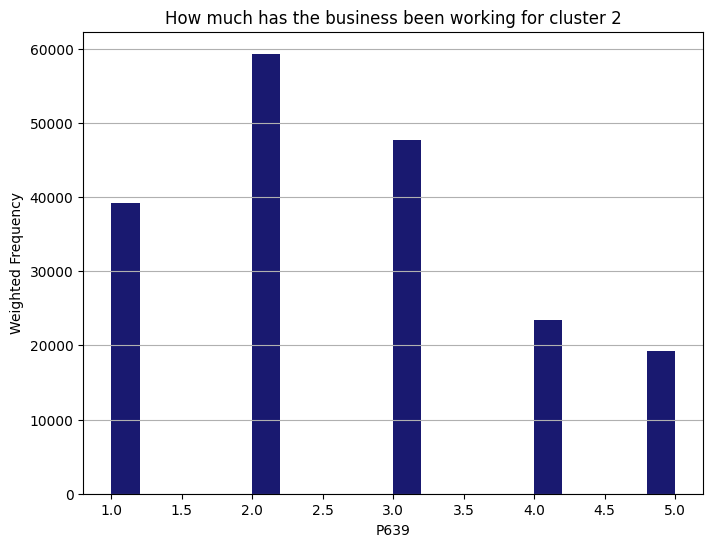

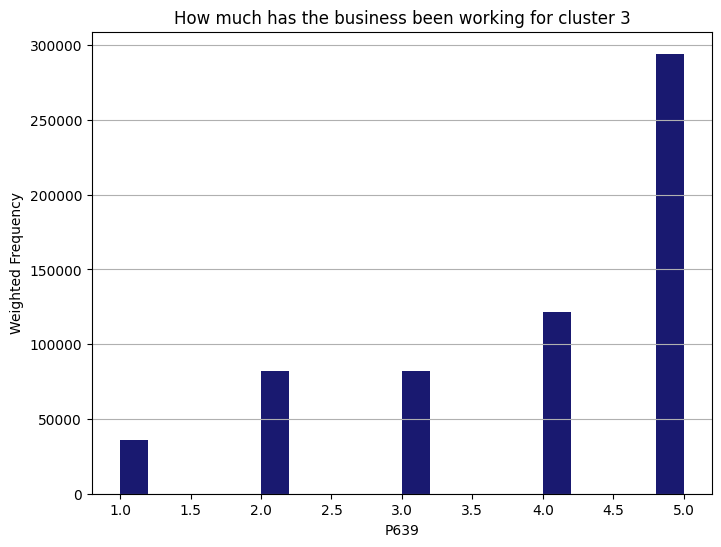

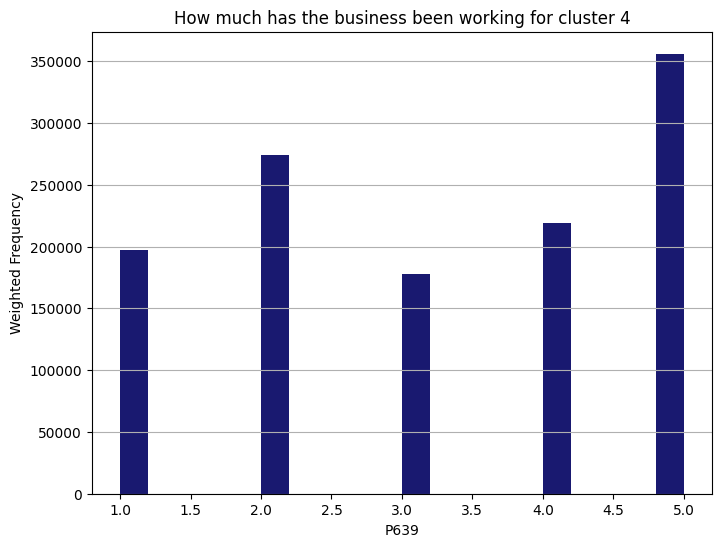

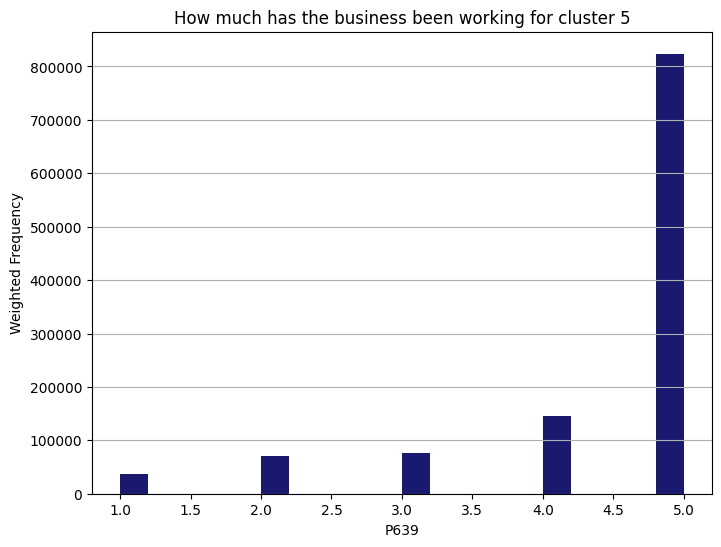

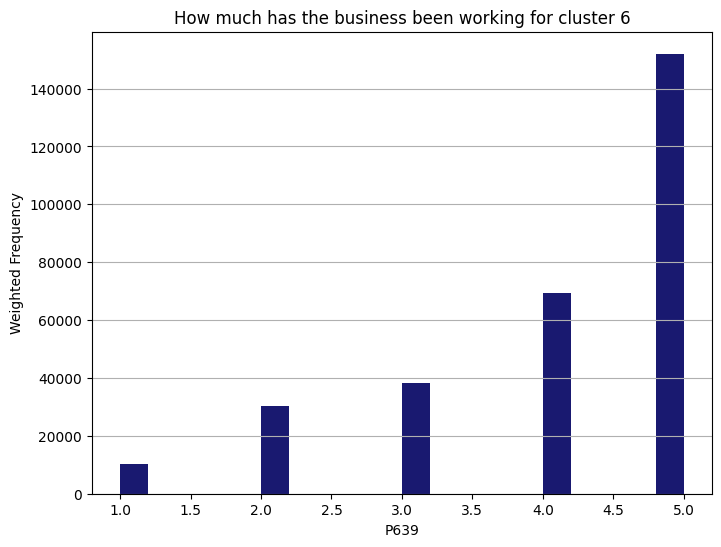

In [92]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P639'], bins=20, weights=data['F_EXP'], color='#191970')
    plt.xlabel('P639')
    plt.ylabel('Weighted Frequency')
    plt.title(f'How much has the business been working for cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

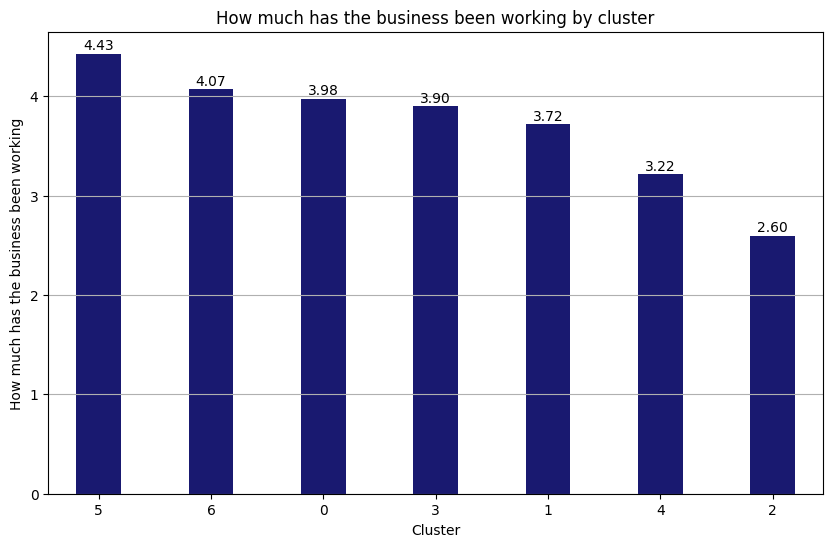

In [93]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P639']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('How much has the business been working')
plt.title('How much has the business been working by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*age of the owner*

In [94]:
np.average(emicron[emicron['cluster']==3]['P241'], weights=emicron[emicron['cluster']==3]['P241'])

51.05201125419668

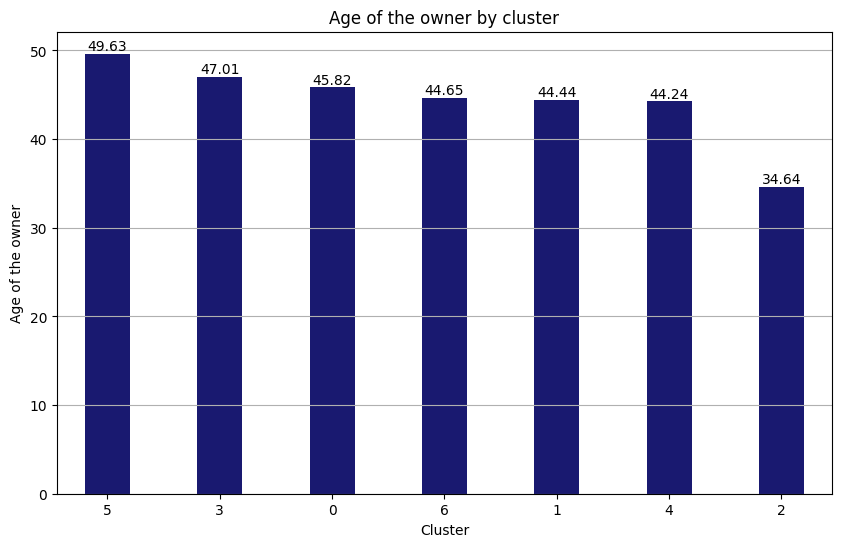

In [95]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['P241']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Age of the owner')
plt.title('Age of the owner by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*geographical location*

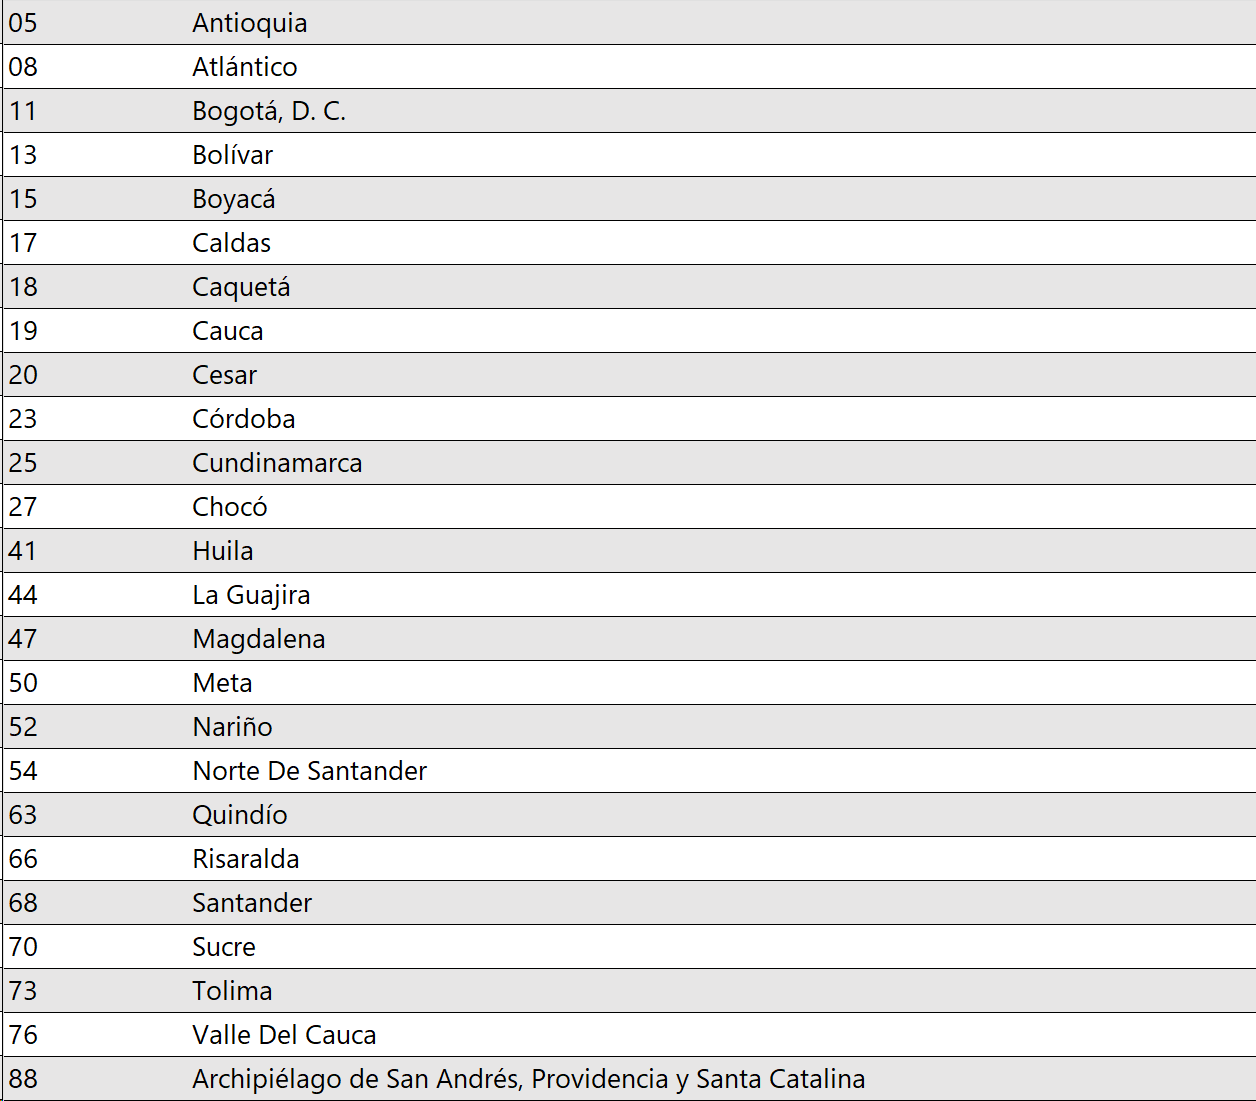

In [96]:
# Filter data for cluster 0
cluster_0_data = emicron[emicron['cluster'] == 1]

# Calculate weighted frequency of each department
weighted_frequency_table = cluster_0_data.groupby('COD_DEPTO')['F_EXP'].sum().reset_index()
weighted_frequency_table.columns = ['COD_DEPTO', 'Weighted Frequency']

# Sort by alphabetical order of COD_DEPTO
weighted_frequency_table = weighted_frequency_table.sort_values(by='Weighted Frequency', ascending=False)

# Display weighted frequency table for cluster 0
print(weighted_frequency_table)

    COD_DEPTO  Weighted Frequency
0           5       158841.982693
1           8       129281.177055
3          13       126626.891621
23         76       122625.609268
2          11        98101.905860
14         47        74210.237681
9          23        70133.229943
20         68        66831.771787
21         70        63953.050090
8          20        48087.501529
13         44        38261.700129
17         54        35772.965964
16         52        28007.646381
10         25        24218.050252
15         50        22602.172945
12         41        20388.512015
19         66        19003.243774
4          15        18332.340510
5          17        16800.040719
22         73        16687.113704
7          19        15020.239984
6          18        11124.273551
18         63        10413.441324
11         27         7719.191169
24         88         1102.616949


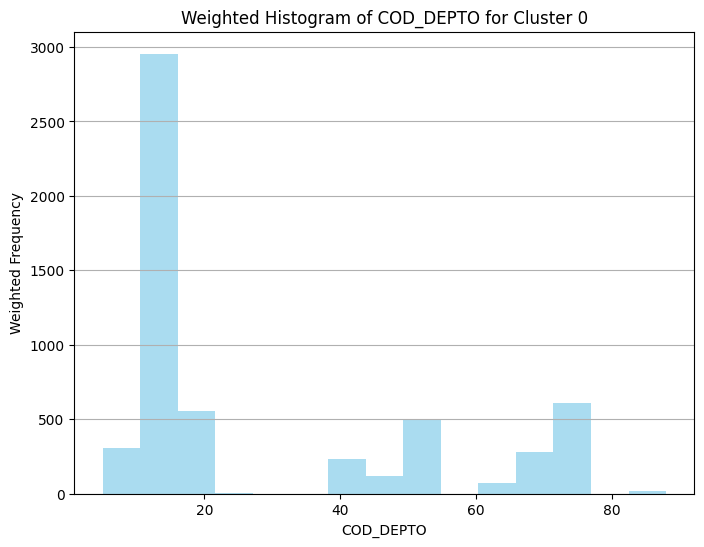

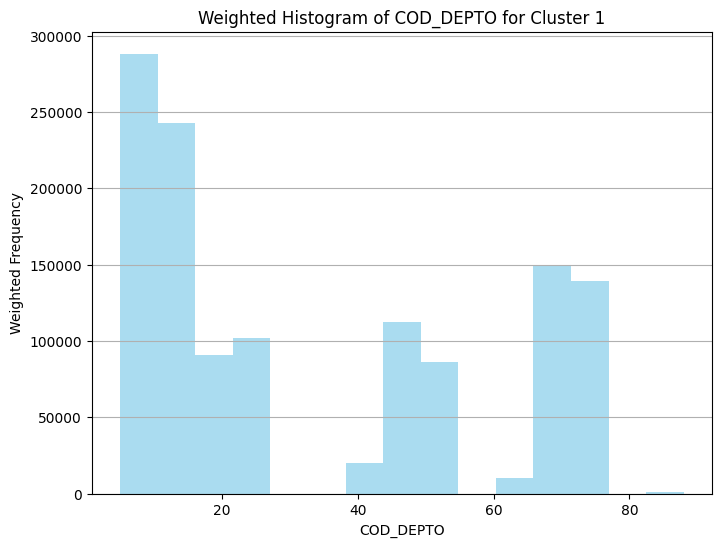

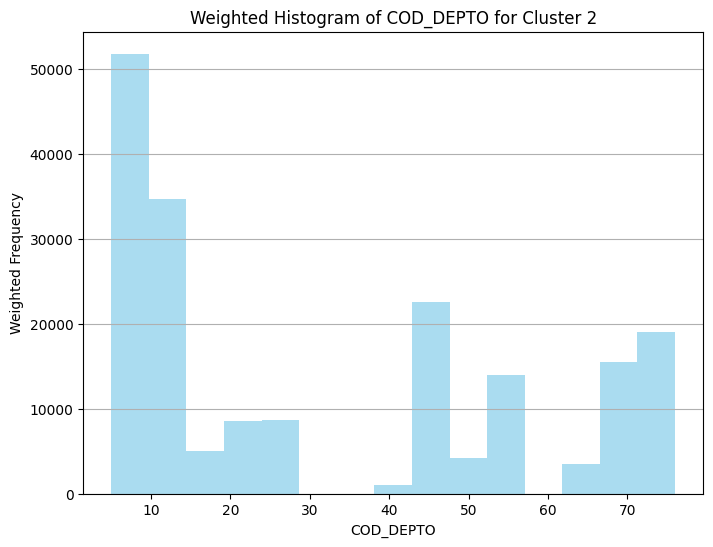

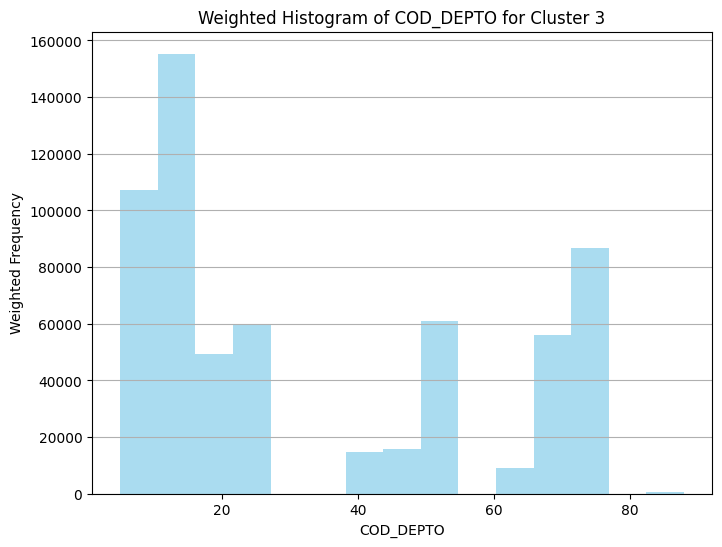

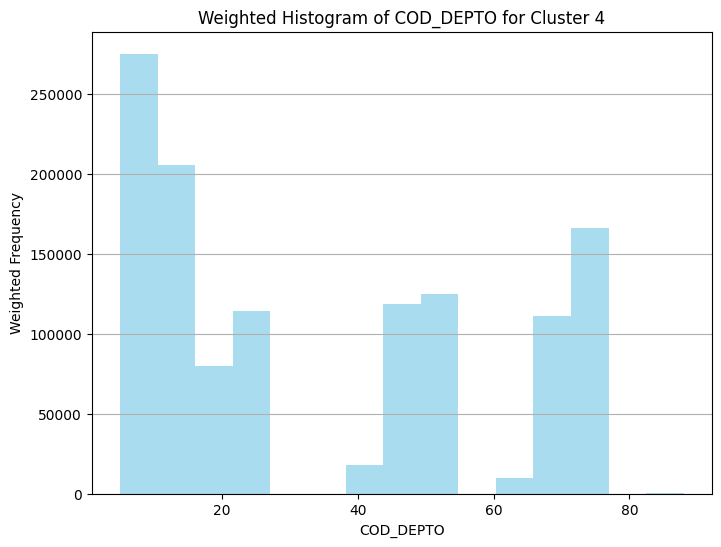

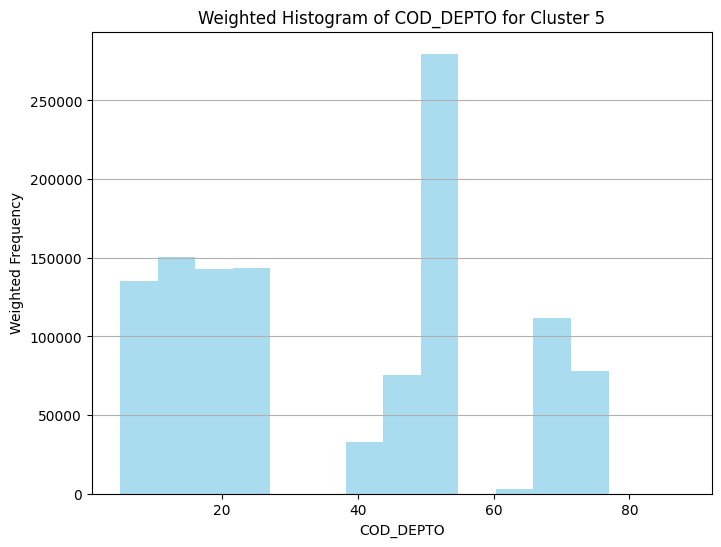

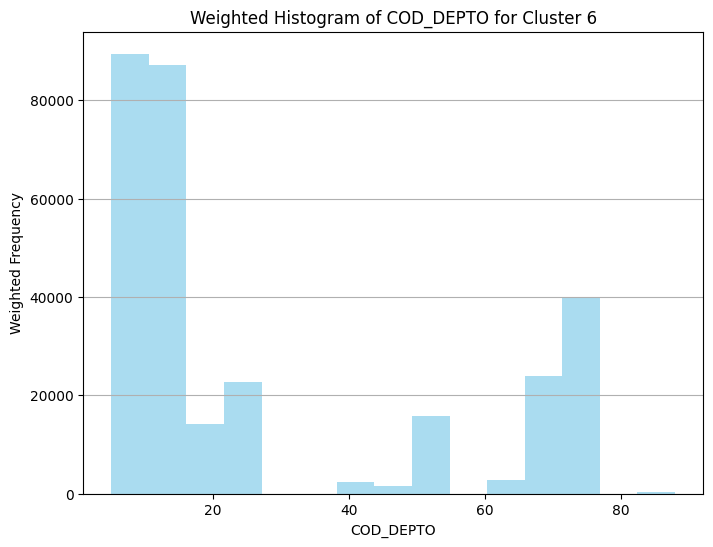

In [97]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['COD_DEPTO'], bins=15, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('COD_DEPTO')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of COD_DEPTO for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

#variables to analyse further

P2532

P1093

P1006_xxx

*P3051*
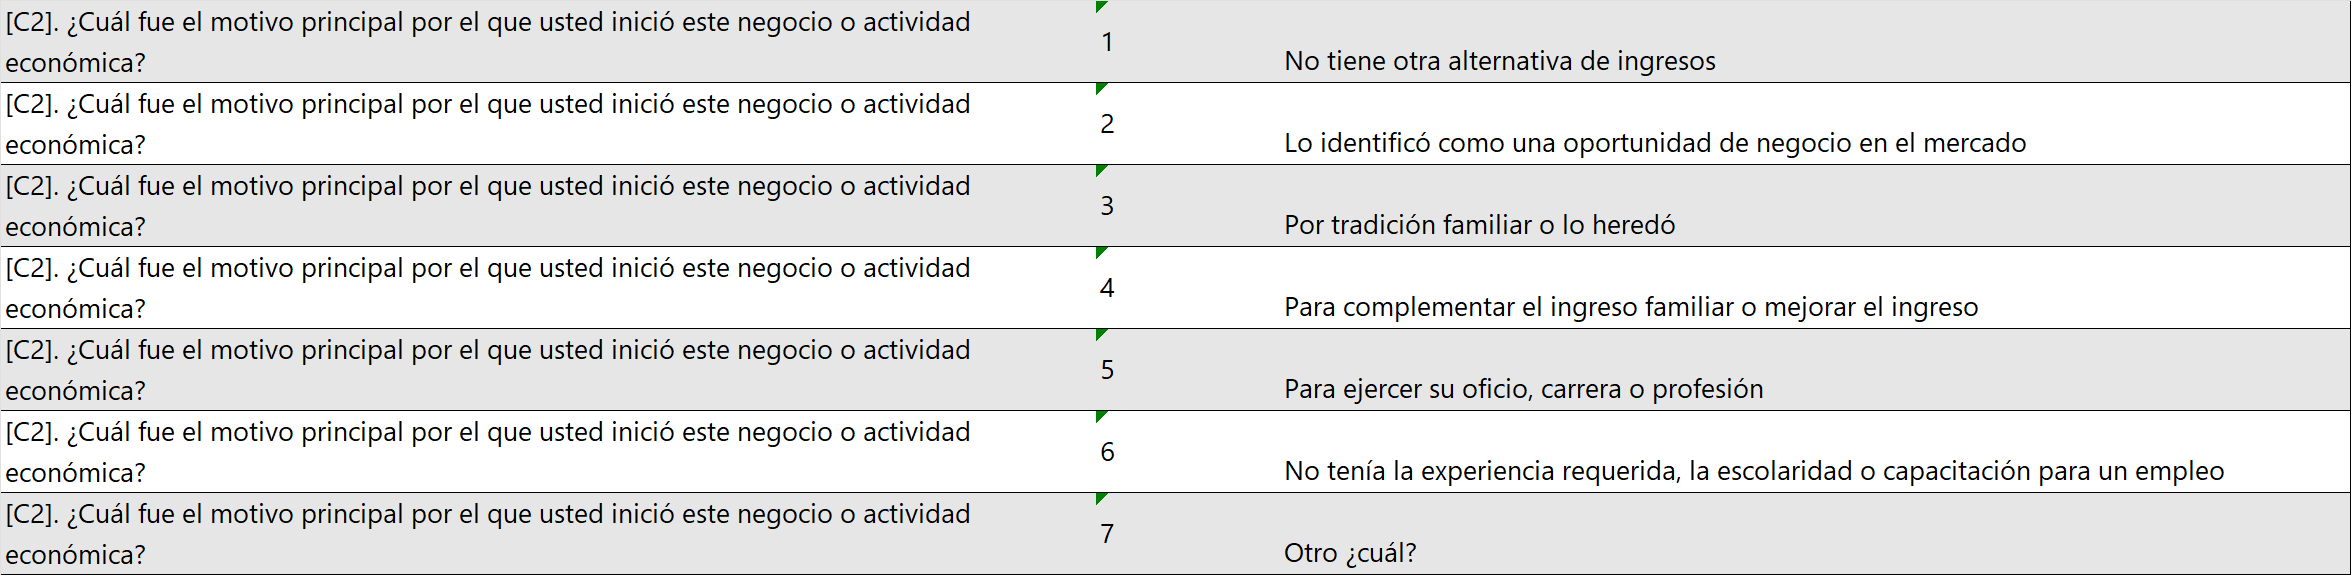

In [98]:
emicron['bad_reason_create_business'] = emicron['P3051'].apply(lambda x: 1 if x in [1, 6] else 0)

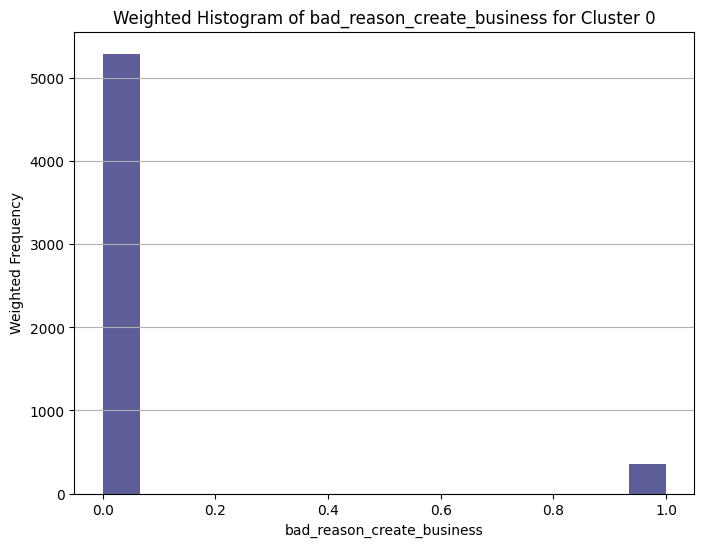

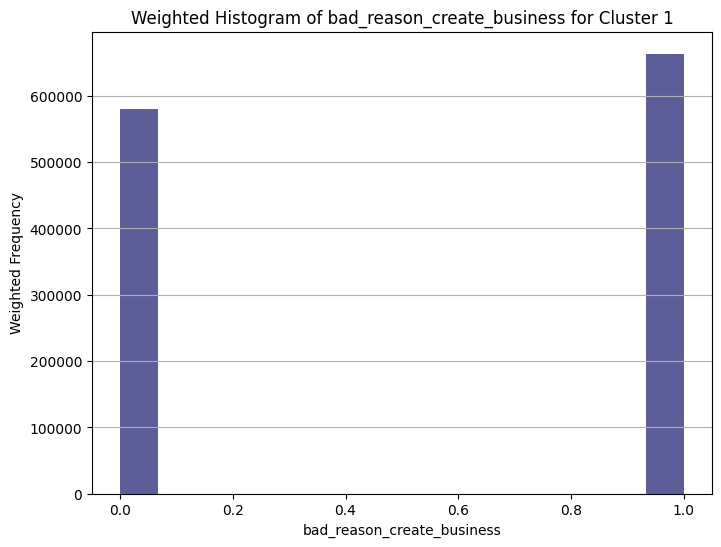

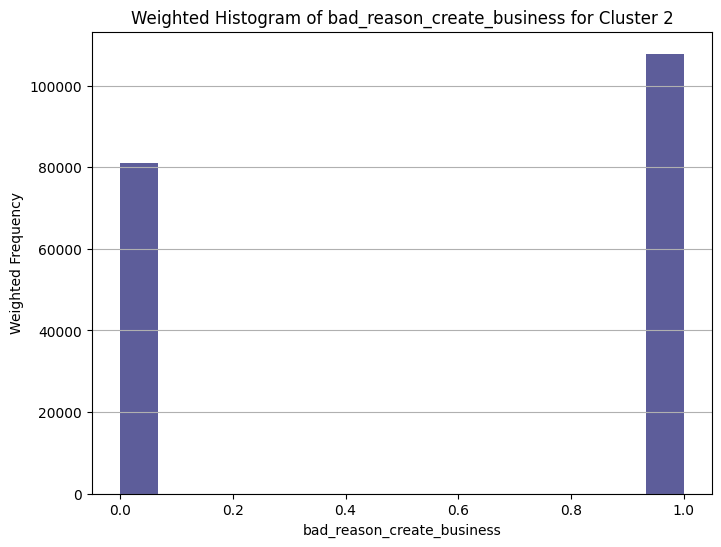

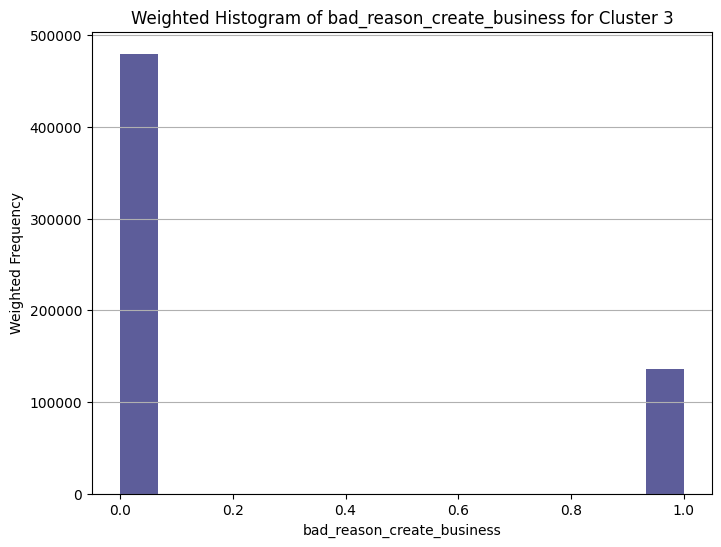

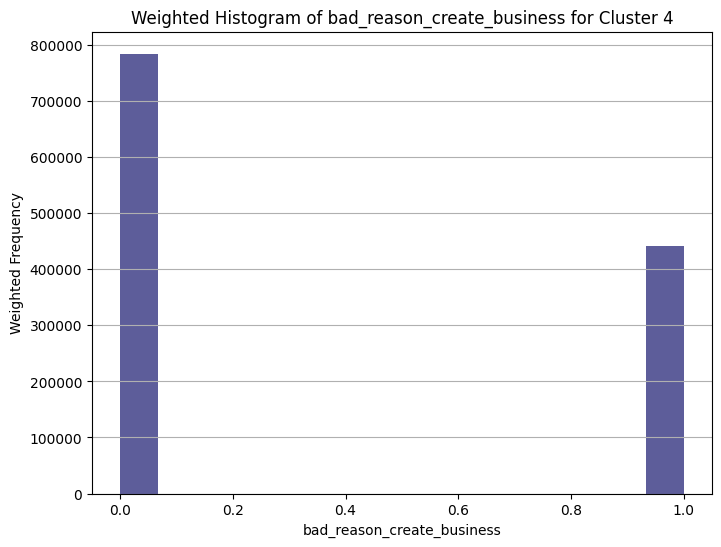

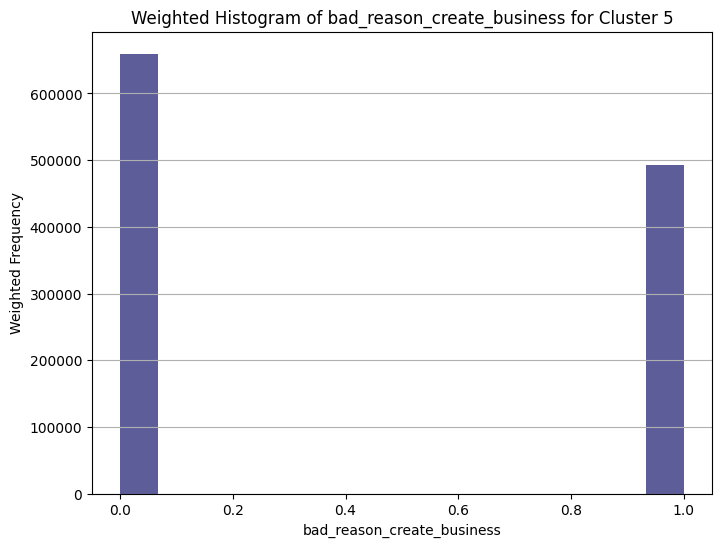

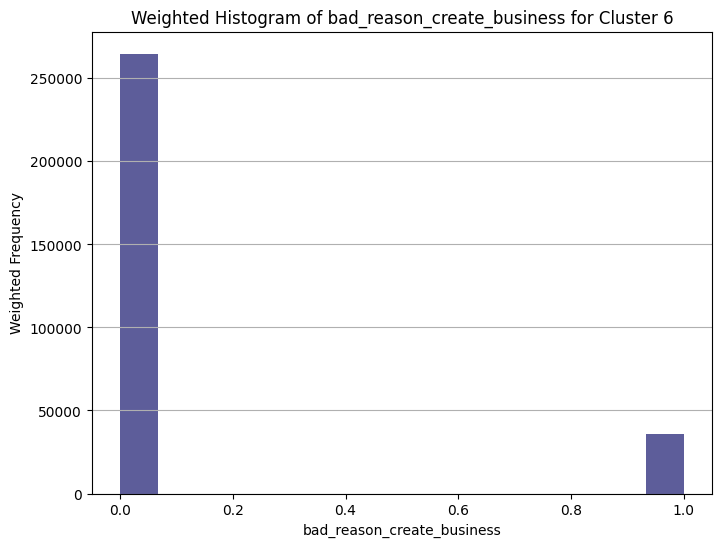

In [99]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['bad_reason_create_business'], bins=15, weights=data['F_EXP'], color='#191970', alpha=0.7)
    plt.xlabel('bad_reason_create_business')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of bad_reason_create_business for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

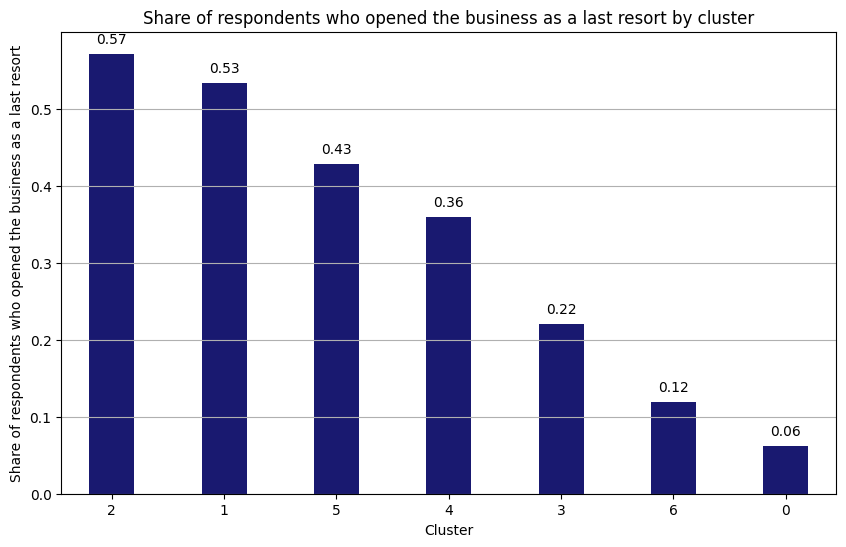

In [100]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['bad_reason_create_business']
    return (values * weights).sum() / weights.sum()

result = emicron.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who opened the business as a last resort')
plt.title('Share of respondents who opened the business as a last resort by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

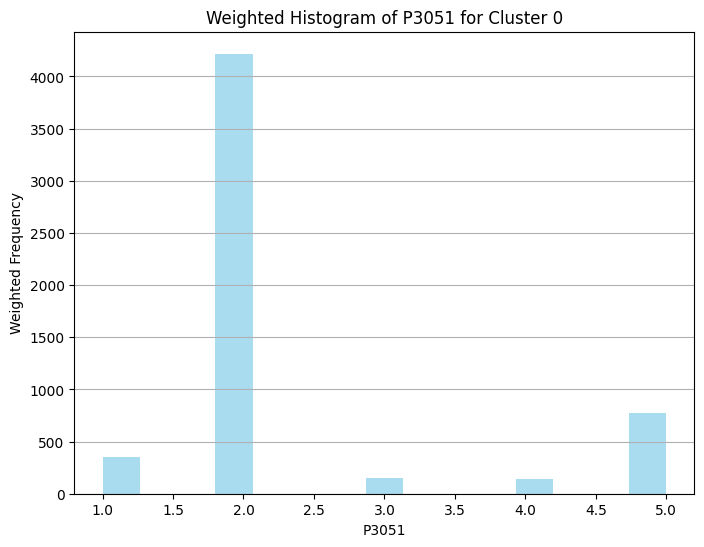

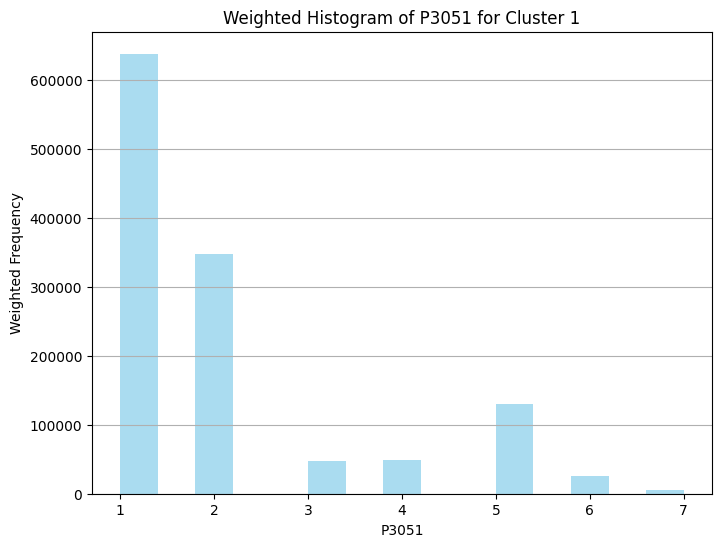

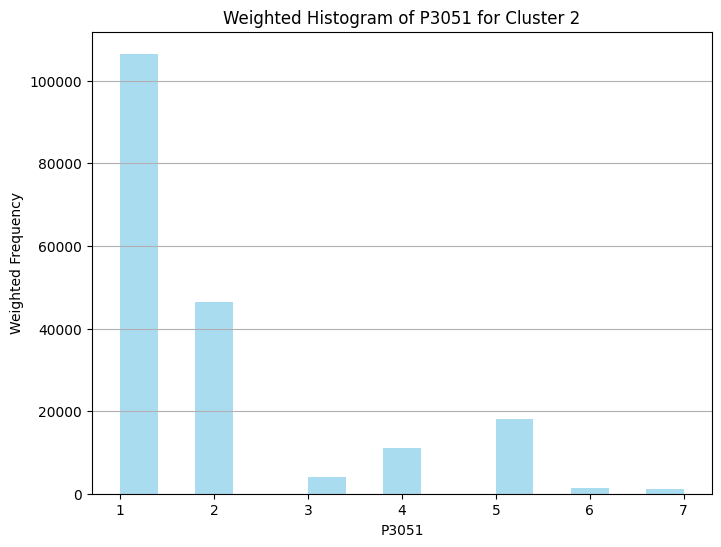

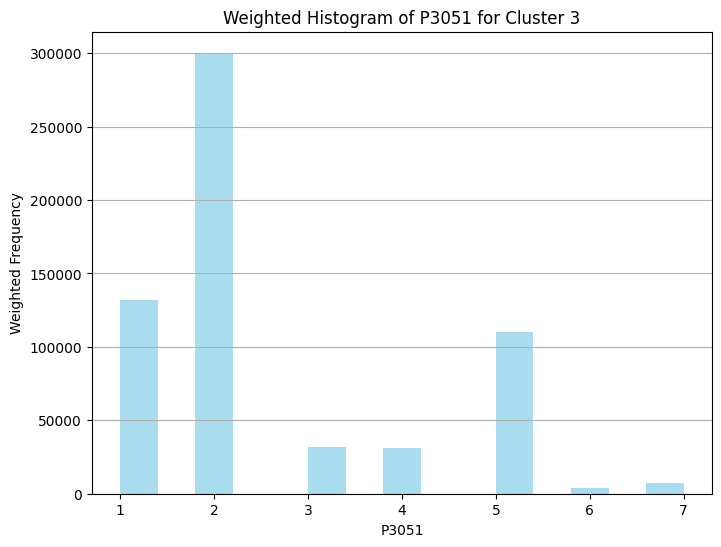

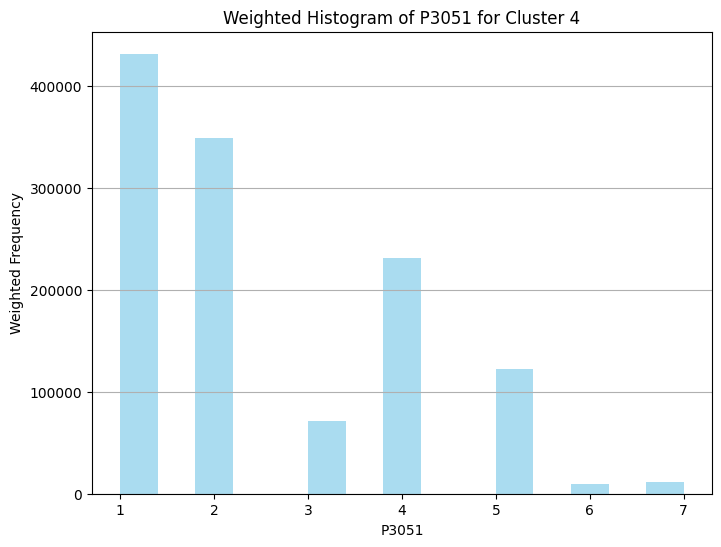

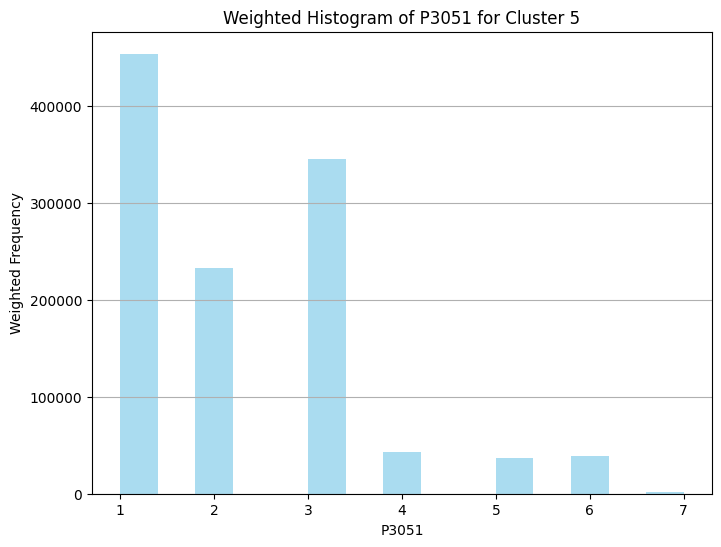

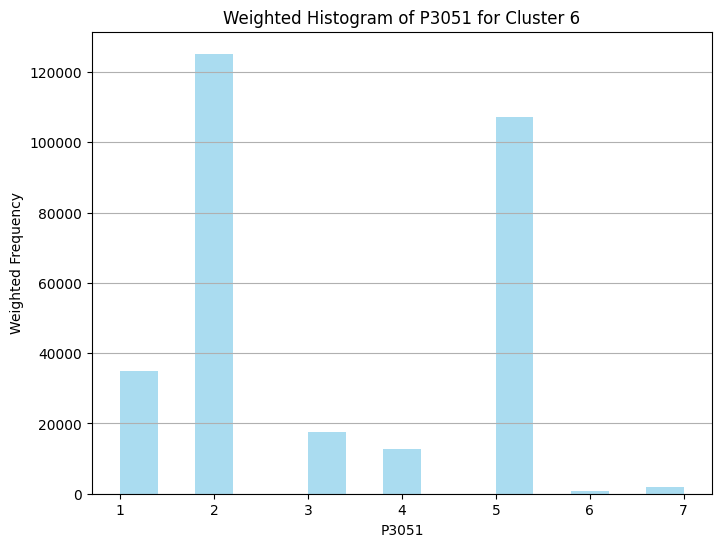

In [101]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P3051'], bins=15, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P3051')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P3051 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

*P3052*
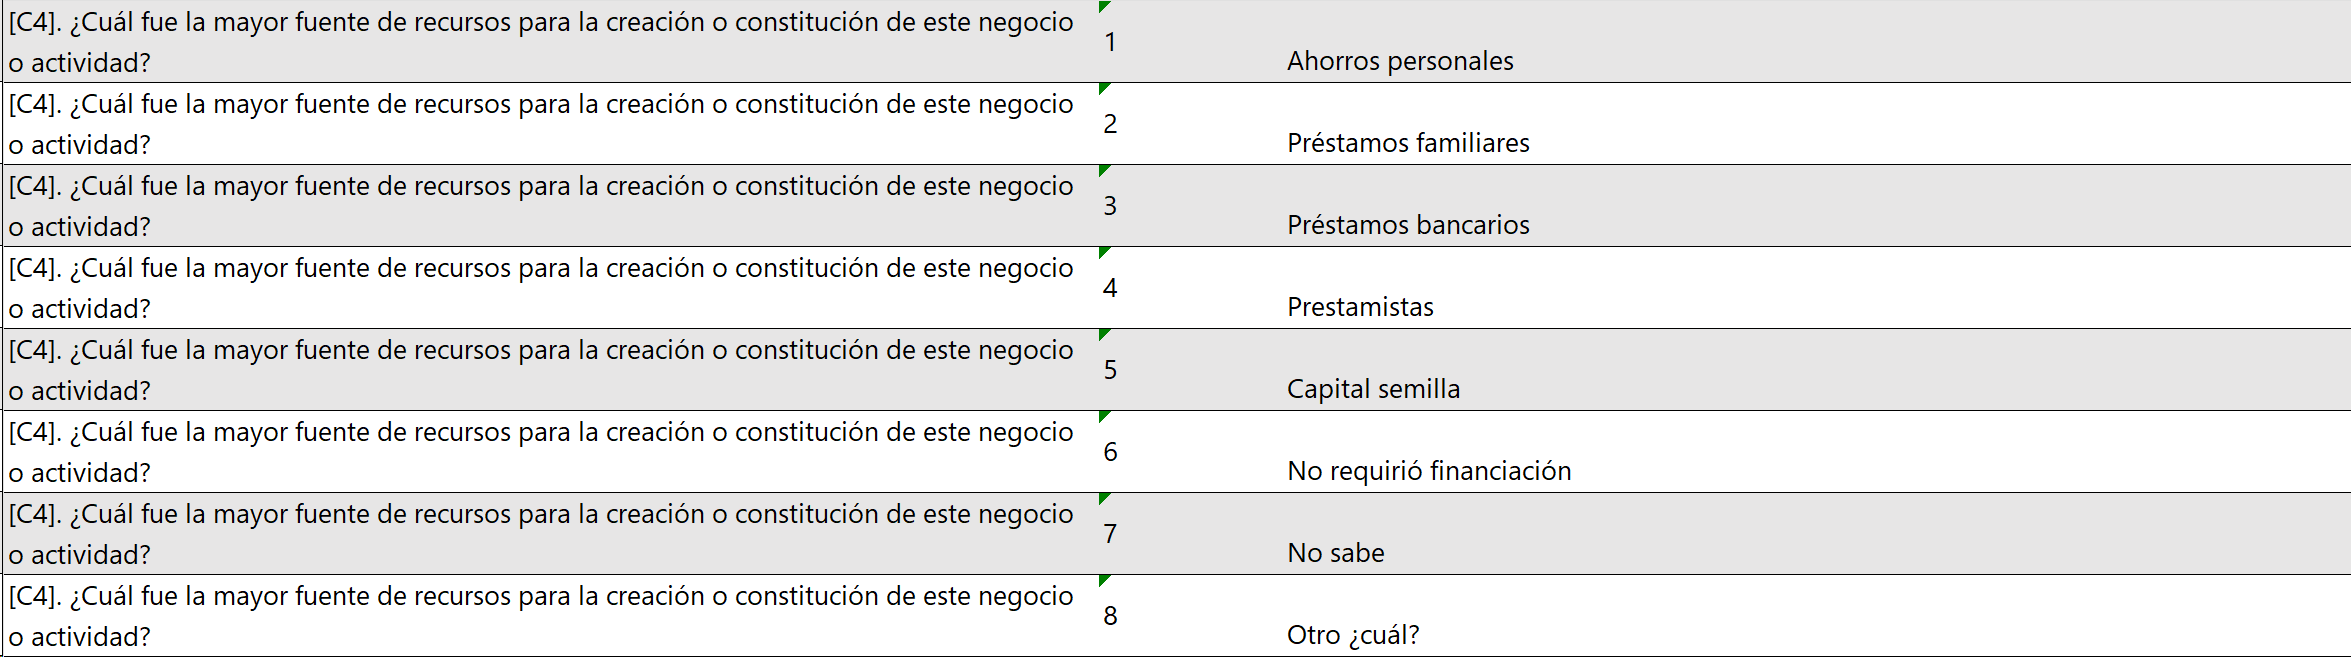

In [102]:
emicron_nan = {}

In [103]:
modulo_emprendimiento = pd.read_csv("../../Data/Módulo de emprendimiento.csv")

In [104]:
emicron_nan = pd.merge(emicron, modulo_emprendimiento, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [105]:
emicron_nan['finance'] = emicron_nan['P3052'].isin([1, 2, 6, 7, 8]).astype(int)

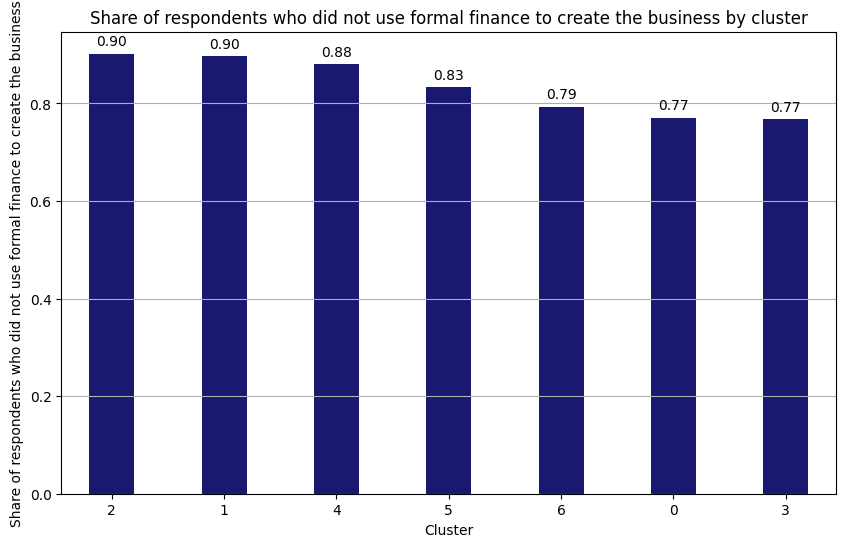

In [106]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['finance']
    return (values * weights).sum() / weights.sum()

result = emicron_nan.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who did not use formal finance to create the business')
plt.title('Share of respondents who did not use formal finance to create the business by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

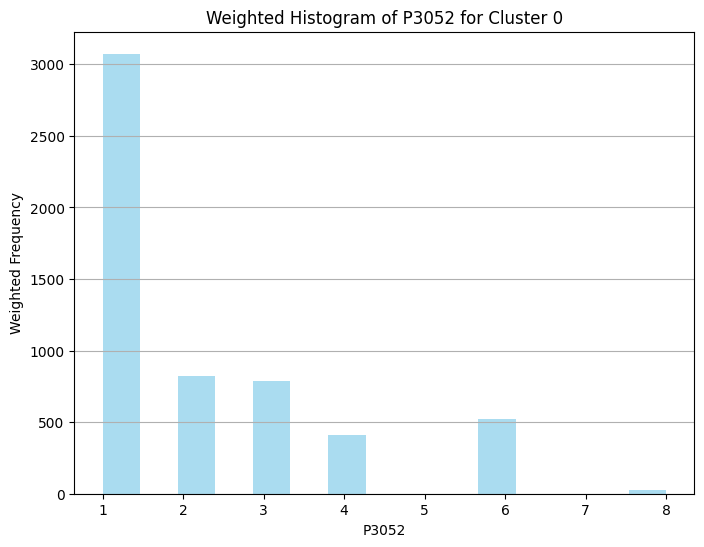

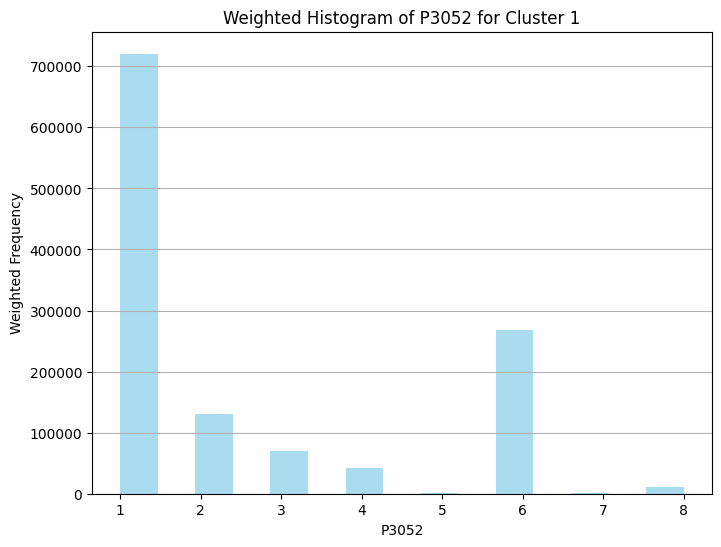

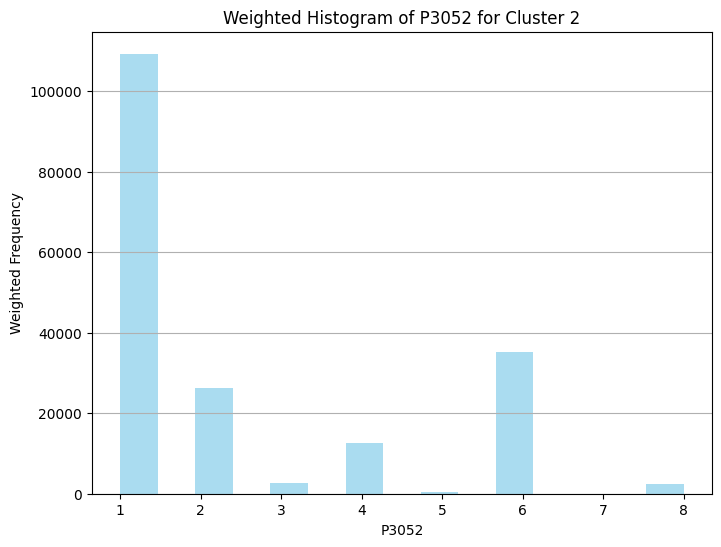

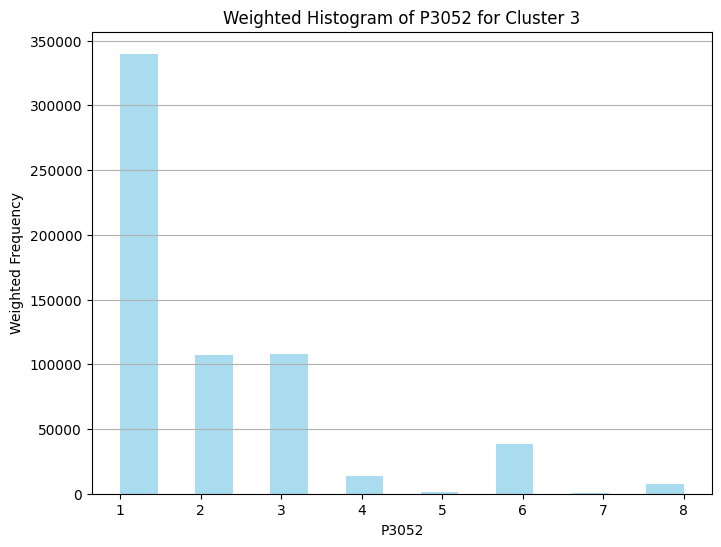

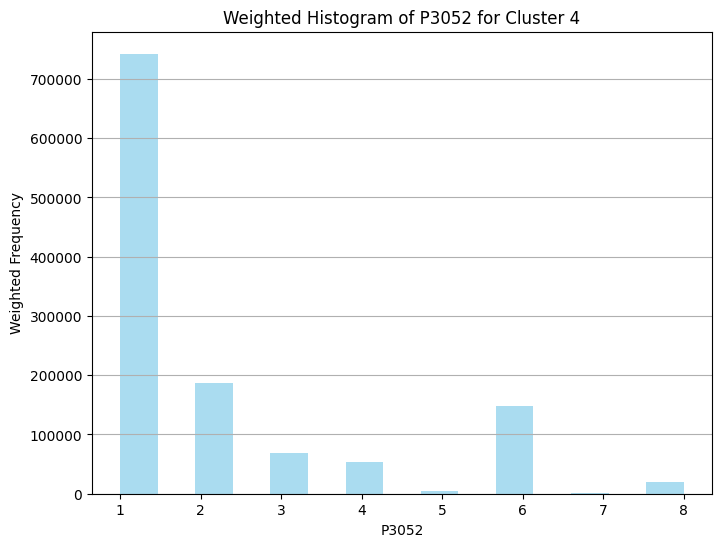

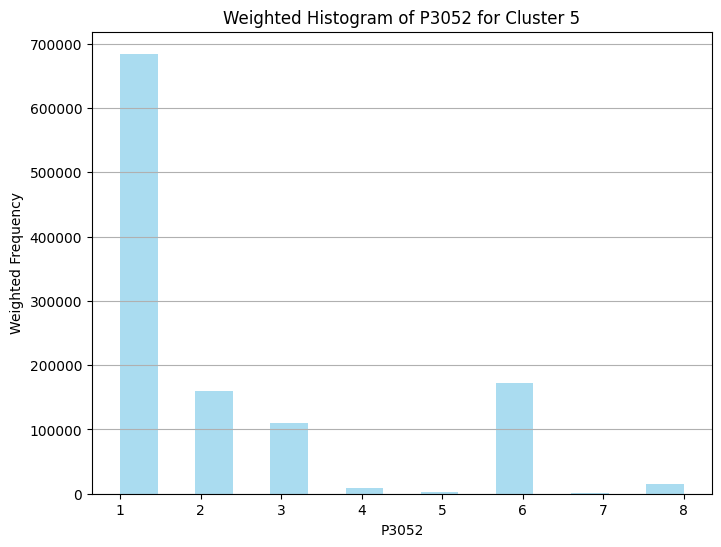

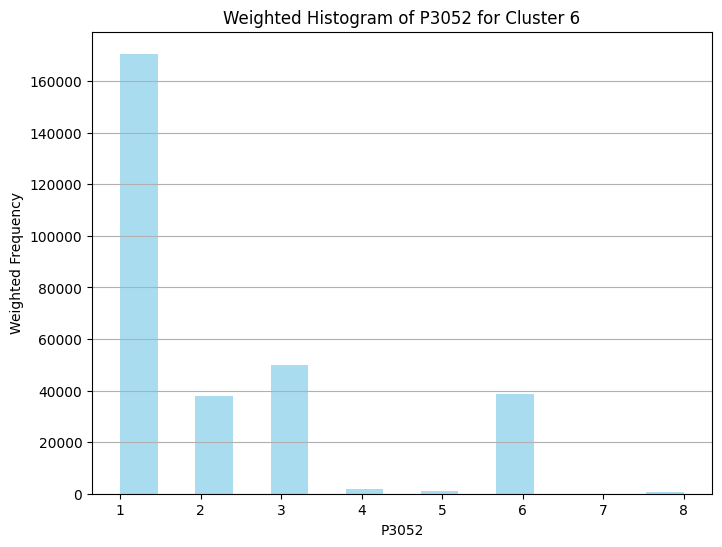

In [107]:
# Calculate the mean of the non-NaN values in the 'P3052' column
mean_P3052 = emicron_nan['P3052'].mean()

# Impute NaN values with the mean
emicron_nan['P3052'].fillna(mean_P3052, inplace=True)

# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron_nan.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P3052'], bins=15, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P3052')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P3052 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()


*P994*

They don't need them
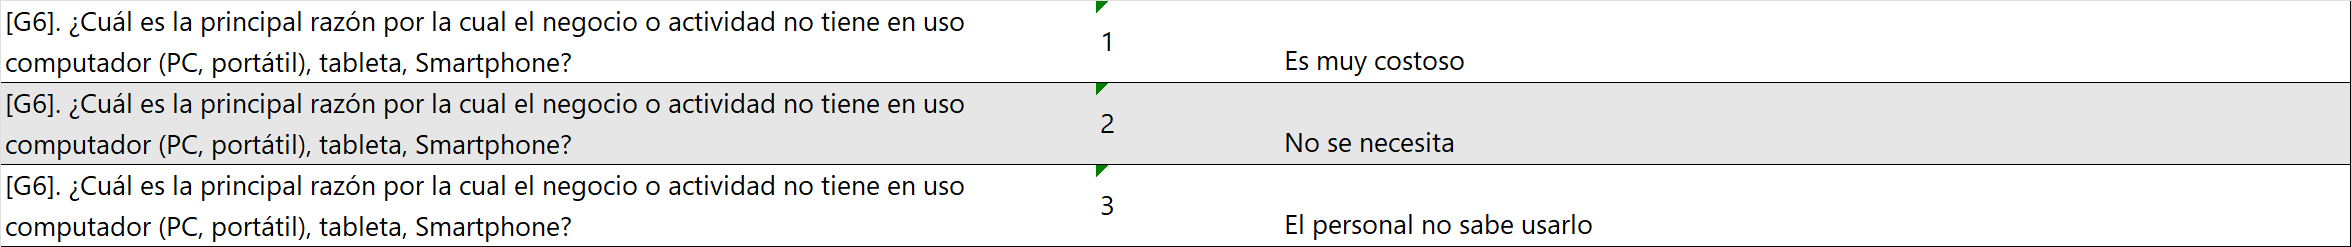

In [108]:
emicron_nan = {}

In [109]:
modulo_TIC = pd.read_csv("../../Data/Módulo de TIC.csv")

In [110]:
emicron_nan = pd.merge(emicron, modulo_TIC, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [111]:
emicron_nan['why_not_tech'] = emicron_nan['P994'].isin([2]).astype(int)

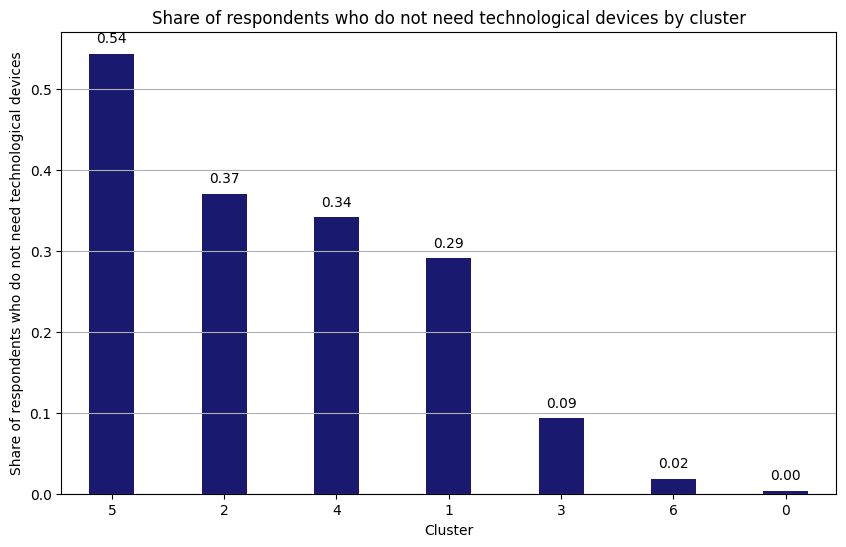

In [112]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['why_not_tech']
    return (values * weights).sum() / weights.sum()

result = emicron_nan.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who do not need technological devices')
plt.title('Share of respondents who do not need technological devices by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*P2532: does the business have a website?*

In [113]:
modulo_TIC['P2532']

0        2
1        2
2        2
3        2
4        2
        ..
84748    2
84749    2
84750    2
84751    2
84752    2
Name: P2532, Length: 84753, dtype: int64

In [114]:
modulo_TIC['P2532'].isna().sum()

0

In [115]:
emicron['SECUENCIA_P']

0        1
1        1
2        1
3        1
4        1
        ..
77601    1
77602    1
77603    1
77604    1
77605    1
Name: SECUENCIA_P, Length: 77606, dtype: int64

In [116]:
emicron_nan = {}

In [117]:
emicron_nan = pd.merge(emicron, modulo_TIC, on=['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P'], how='left')

*P1093: do you use internet?*

In [118]:
modulo_TIC['P1093']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
84748    NaN
84749    NaN
84750    1.0
84751    NaN
84752    NaN
Name: P1093, Length: 84753, dtype: float64

In [119]:
emicron_nan = {}

In [120]:
emicron_nan = pd.merge(emicron, modulo_TIC, on=['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'CLASE_TE', 'COD_DEPTO', 'F_EXP'], how='inner')

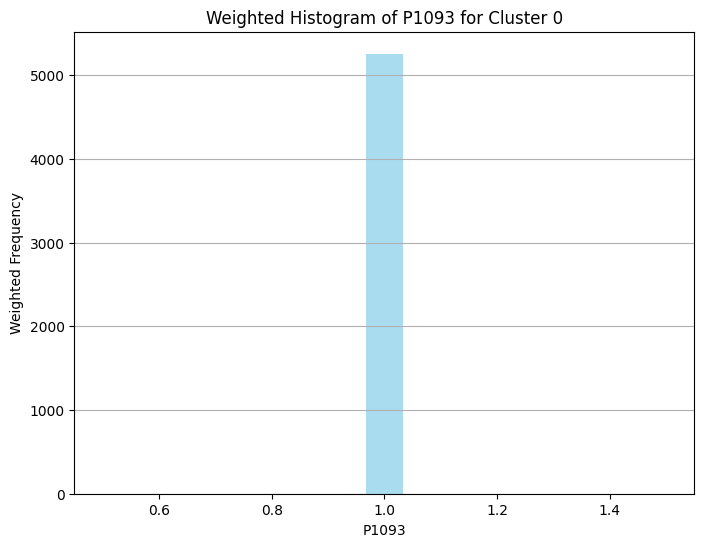

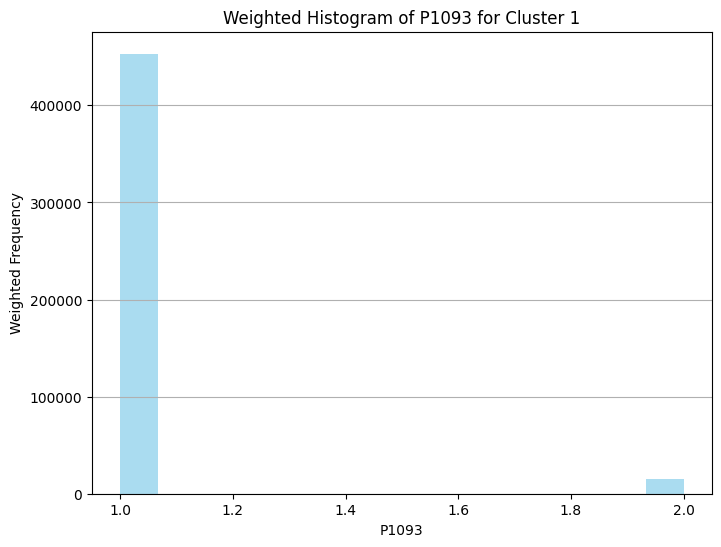

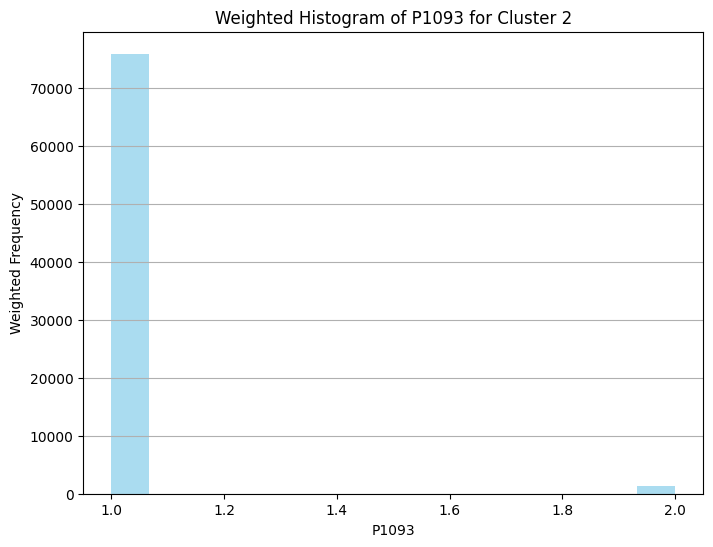

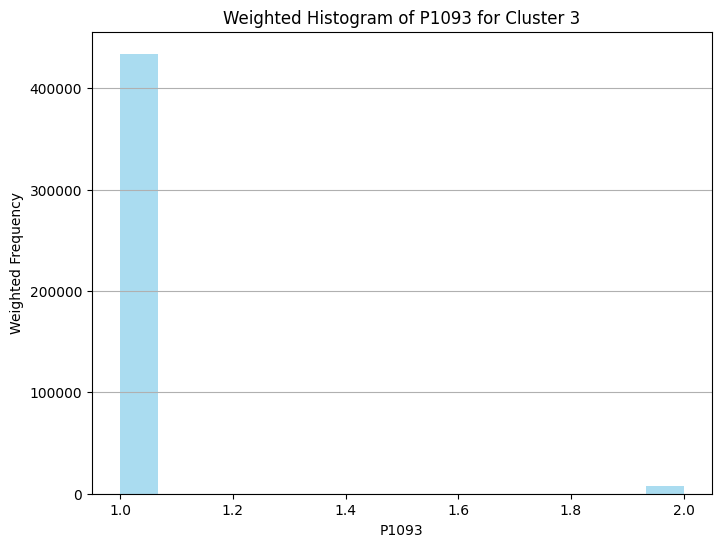

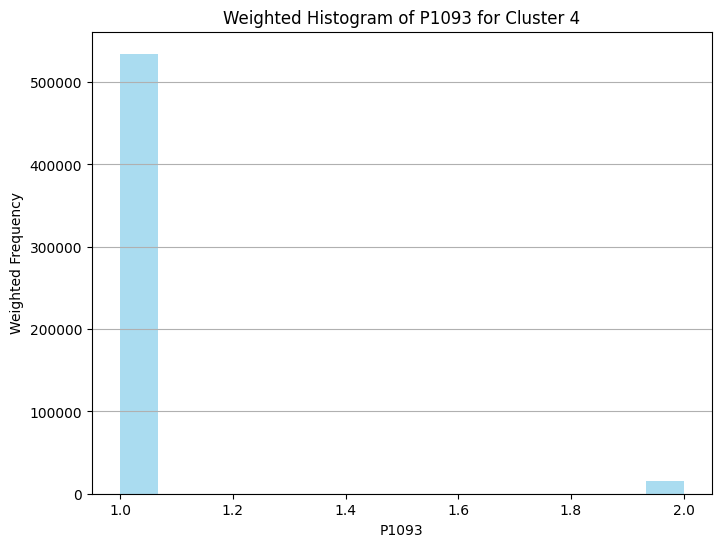

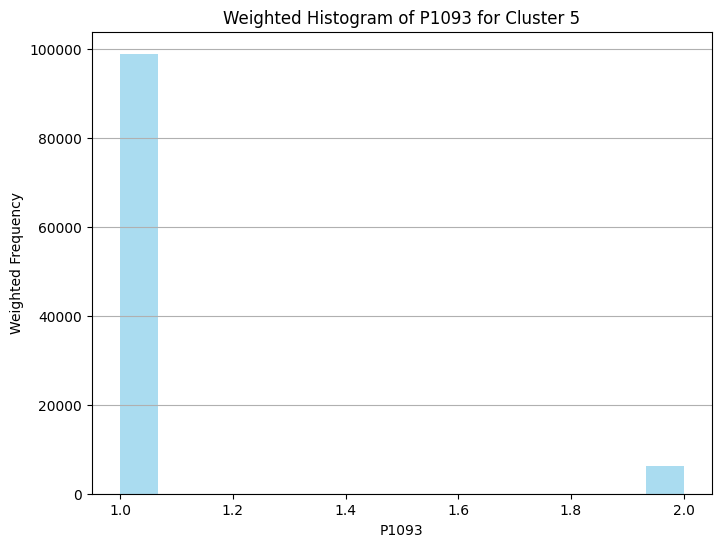

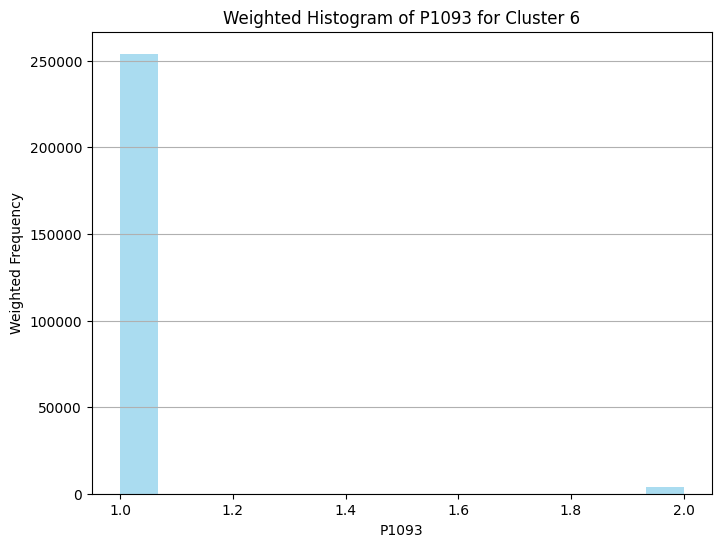

In [121]:
# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron_nan.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P1093'], bins=15, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P1093')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P1093 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

*P3042 edu level*

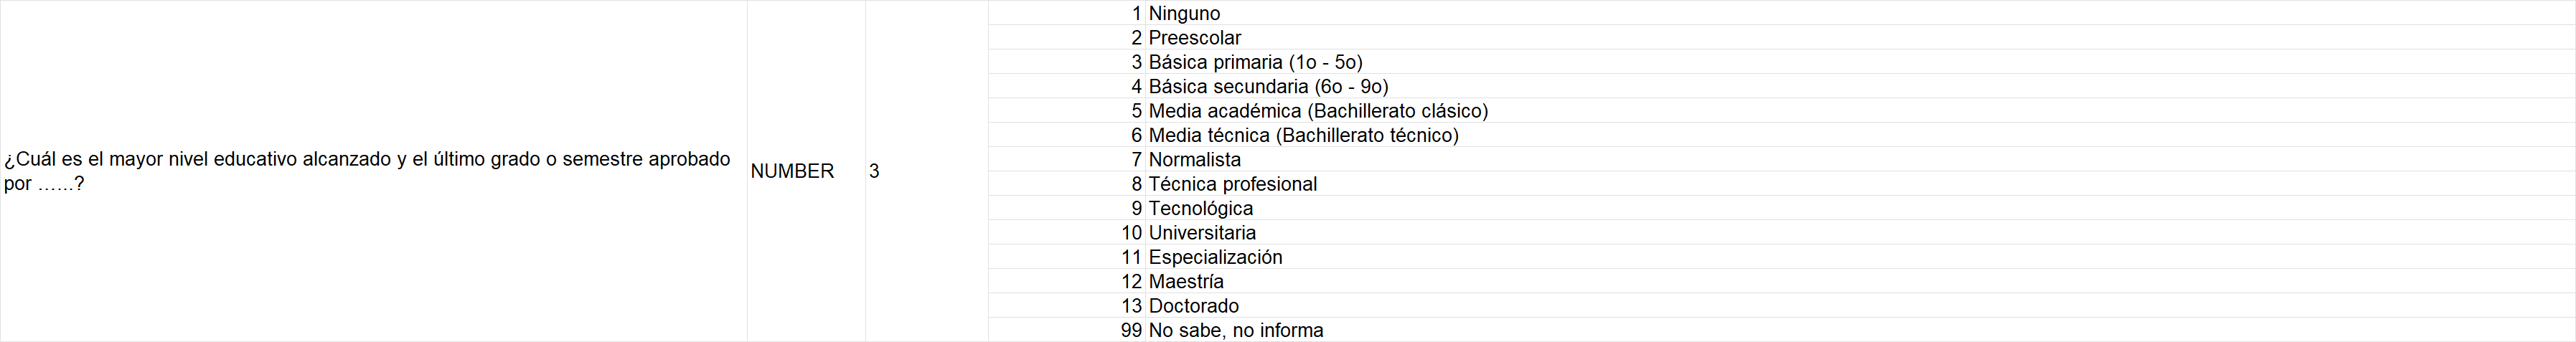

Most did high school as highest

In [122]:
emicron_nan = {}

In [123]:
modulo_individual_geih = pd.read_stata("../../Data/individual_geih-2022-clean.dta")

/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_50412/3222384955.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  modulo_individual_geih = pd.read_stata("../../Data/individual_geih-2022-clean.dta")


In [124]:
# Define the old and new column names
rename_cols = {'MES': 'MES_REF', 'CLASE': 'CLASE_TE', 'DPTO': 'COD_DEPTO', 'ORDEN':'SECUENCIA_ENCUESTA'}

# Rename the columns in all dataframes
modulo_individual_geih = modulo_individual_geih.rename(columns=rename_cols)

In [125]:
columns_to_drop = ['PERIODO', 'PER', 'REGIS', 'CLASE_TE', 'COD_DEPTO', 'MES_REF', 'id_house', 'FEX_C18', 'HOGAR', 'adj_weight', 'P3091', 'P3089', 'P3095', 'P3096', 'P3098', 'P3099', 'P3093']

modulo_individual_geih = modulo_individual_geih.drop(columns_to_drop, axis=1, errors='ignore')

In [126]:
modulo_individual_geih["DIRECTORIO"] = modulo_individual_geih["DIRECTORIO"].astype('int64')
modulo_individual_geih["SECUENCIA_P"] = modulo_individual_geih["SECUENCIA_P"].astype('int64')
modulo_individual_geih["SECUENCIA_ENCUESTA"] = modulo_individual_geih["SECUENCIA_ENCUESTA"].astype('int64')

In [127]:
#to run
# Define the columns you want to merge
merge_cols = ["DIRECTORIO", "SECUENCIA_P", 'SECUENCIA_ENCUESTA']

# Merge the first dataset
emicron_merge = pd.merge(emicron, modulo_individual_geih, on=merge_cols, how='inner')

In [128]:
# Filter data for cluster 0
cluster_0_data = emicron_merge[emicron_merge['cluster'] == 4]

# Calculate weighted frequency of each department
weighted_frequency_table = cluster_0_data.groupby('P3042')['F_EXP'].sum().reset_index()
weighted_frequency_table.columns = ['P3042', 'Weighted Frequency']

# Sort by alphabetical order of COD_DEPTO
weighted_frequency_table = weighted_frequency_table.sort_values(by='Weighted Frequency', ascending=False)

# Display weighted frequency table for cluster 0
print(weighted_frequency_table)

    P3042  Weighted Frequency
4     5.0       396850.375474
2     3.0       297485.532414
3     4.0       163898.420697
7     8.0       110086.714580
9    10.0       107506.285167
0     1.0        61974.420896
8     9.0        40669.049135
5     6.0        32452.066546
10   11.0         8252.686412
11   12.0         2953.305006
6     7.0         2168.837311
12   13.0           48.048546
1     2.0           16.968118


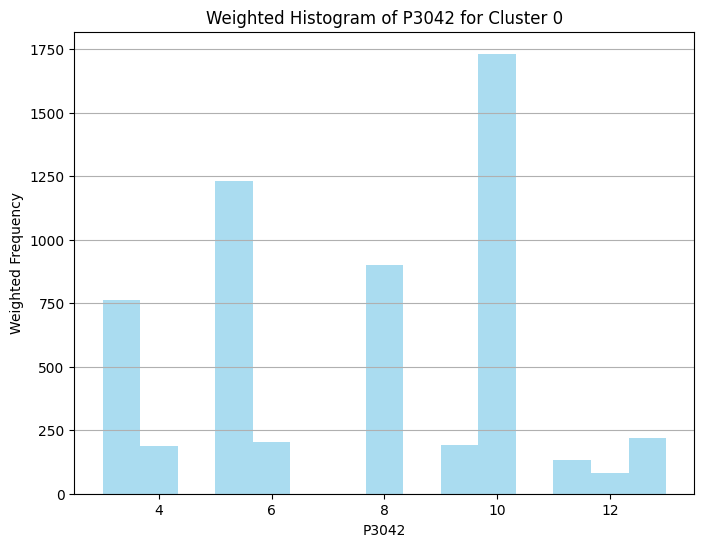

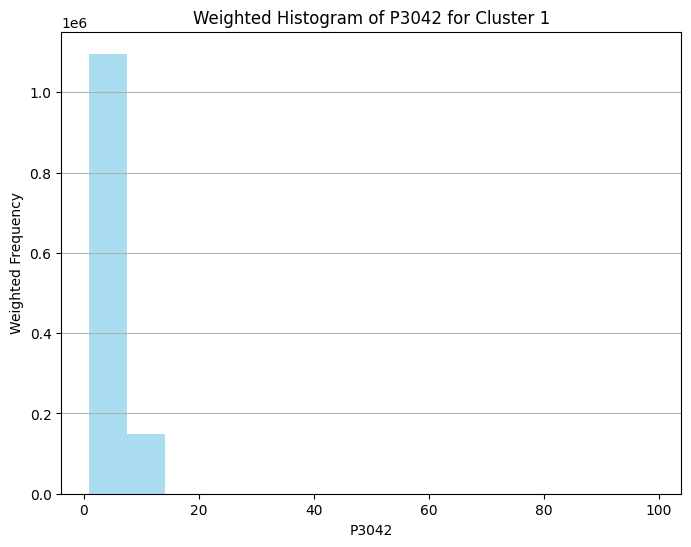

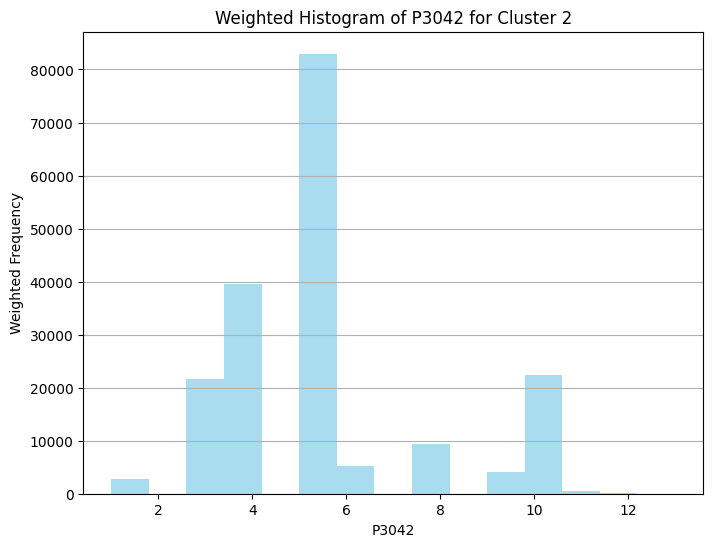

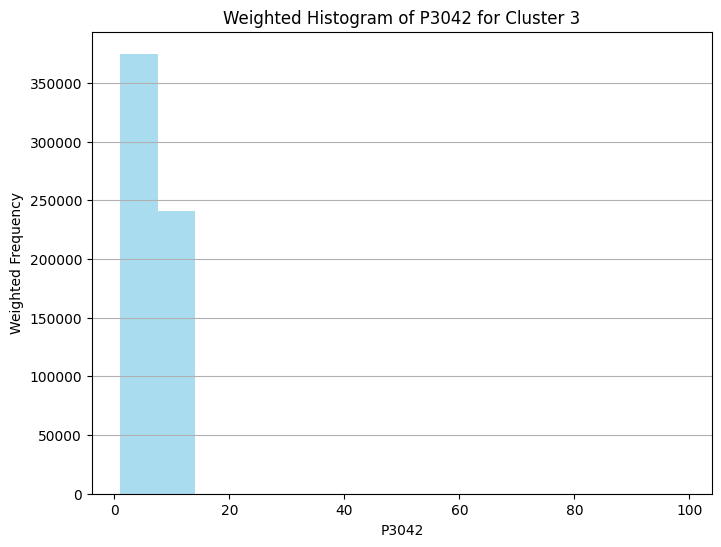

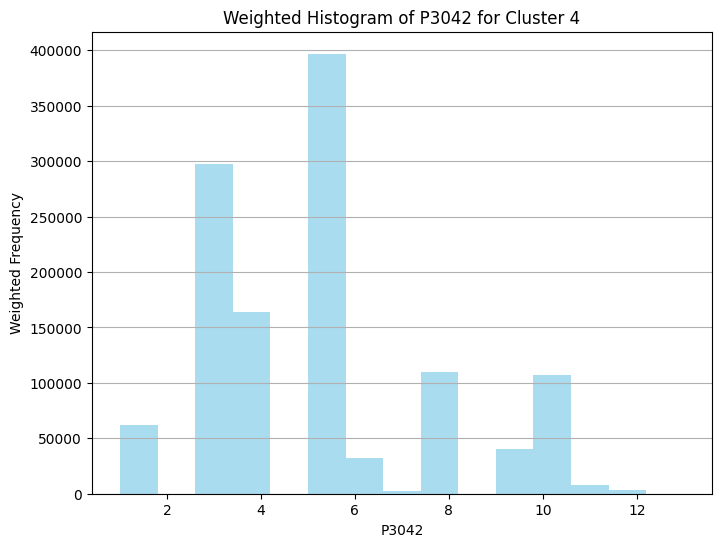

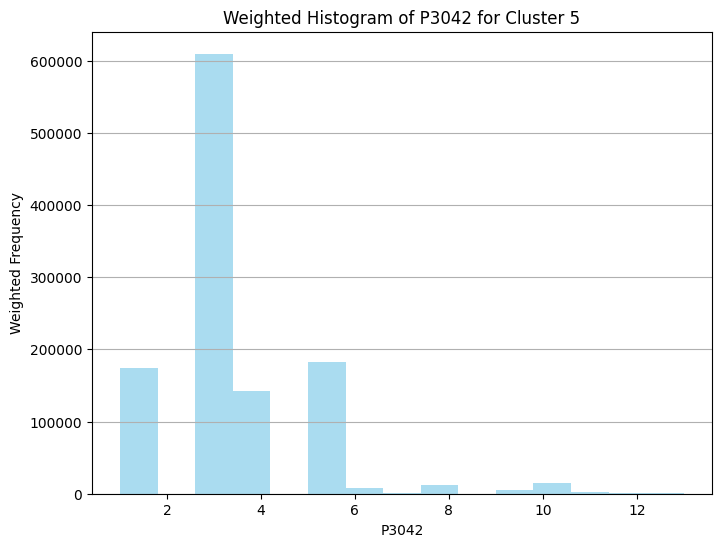

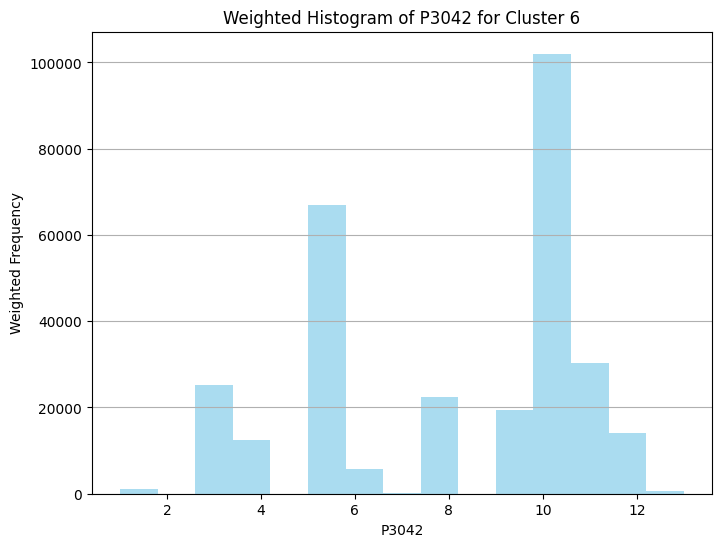

In [129]:
# Impute NaN values in the 'P994' column with the mean
mean_P3042 = emicron_merge['P3042'].mean()
emicron_merge['P3042'].fillna(mean_P3042, inplace=True)

# Now, let's create a weighted histogram for each cluster
for cluster, data in emicron_merge.groupby('cluster'):
    plt.figure(figsize=(8, 6))
    plt.hist(data['P3042'], bins=15, weights=data['F_EXP'], color='skyblue', alpha=0.7)
    plt.xlabel('P3042')
    plt.ylabel('Weighted Frequency')
    plt.title(f'Weighted Histogram of P3042 for Cluster {cluster}')
    plt.grid(axis='y')
    plt.show()

In [130]:
emicron_merge['edu_level_high_school'] = ((emicron_merge['P3042'].ge(5)) & (emicron_merge['P3042'] != 99)).astype(int)

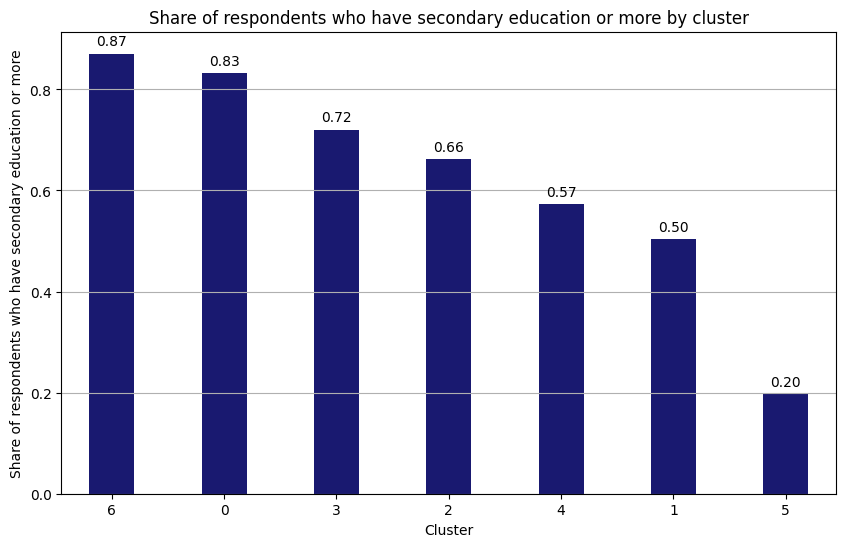

In [131]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['edu_level_high_school']
    return (values * weights).sum() / weights.sum()

result = emicron_merge.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who have secondary education or more')
plt.title('Share of respondents who have secondary education or more by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*P3043: edu degree*
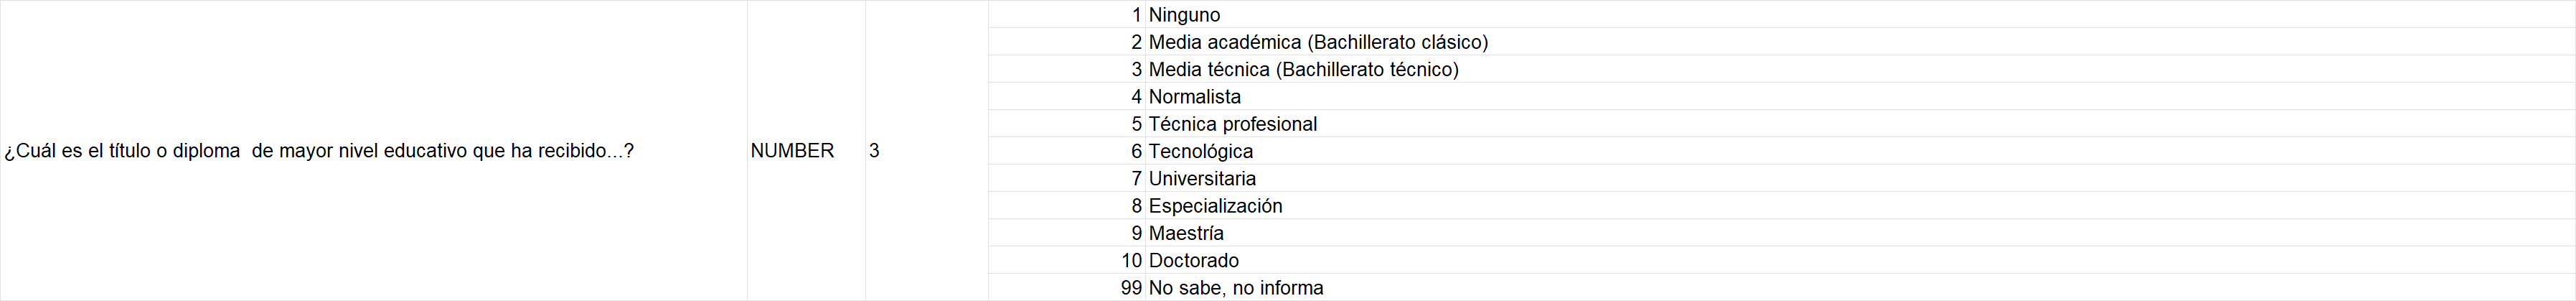

In [132]:
# Filter data for cluster 0
cluster_0_data = emicron_merge[emicron_merge['cluster'] == 4]

# Calculate weighted frequency of each department
weighted_frequency_table = cluster_0_data.groupby('P3043')['F_EXP'].sum().reset_index()
weighted_frequency_table.columns = ['P3043', 'Weighted Frequency']

# Sort by alphabetical order of COD_DEPTO
weighted_frequency_table = weighted_frequency_table.sort_values(by='Weighted Frequency', ascending=False)

# Display weighted frequency table for cluster 0
print(weighted_frequency_table)

   P3043  Weighted Frequency
1    2.0       409705.271202
4    5.0       105773.543714
6    7.0        75123.109653
2    3.0        38258.411278
5    6.0        37390.884160
0    1.0        22580.077700
7    8.0         8087.166245
3    4.0         2473.709427
8    9.0         1547.146251
9   10.0           48.048546


In [133]:
emicron_merge['edu_degree_high_school'] = ((emicron_merge['P3043'].ge(2)) & (emicron_merge['P3043'] != 99)).astype(int)

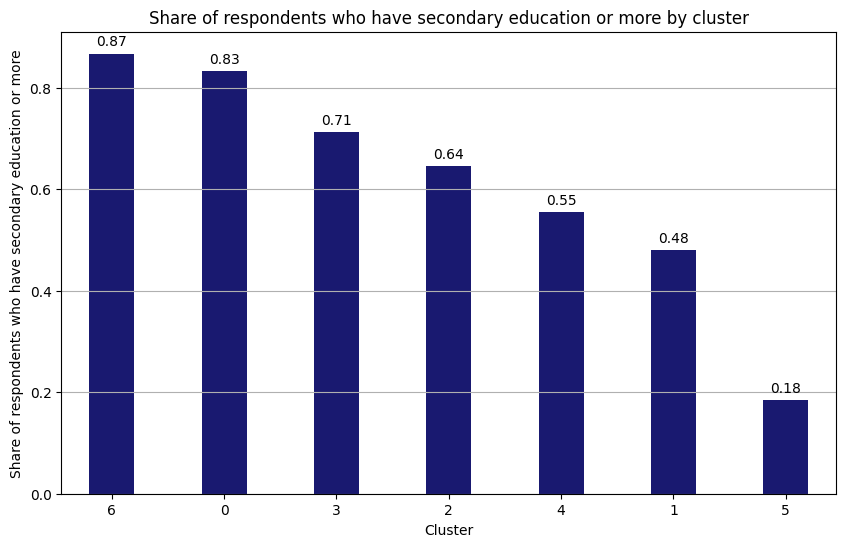

In [134]:
def weighted_mean(df):
    weights = df['F_EXP']
    values = df['edu_degree_high_school']
    return (values * weights).sum() / weights.sum()

result = emicron_merge.groupby('cluster').apply(weighted_mean).sort_values(ascending=False)

# Plotting the mean values
plt.figure(figsize=(10, 6))
result.plot(kind='bar', color='#191970', width=0.4)  # Adjusted bar width for similarity
plt.xlabel('Cluster')
plt.ylabel('Share of respondents who have secondary education or more')
plt.title('Share of respondents who have secondary education or more by cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Adding value annotations on each bar for detailed information (optional)
for index, value in enumerate(result):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*P3039: gender*

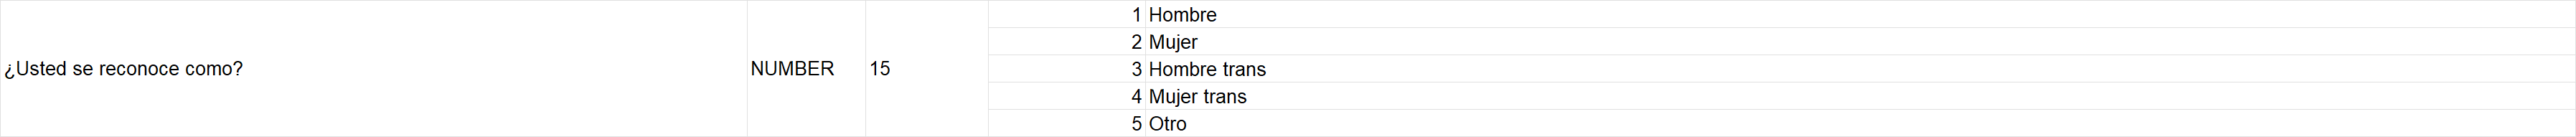

In [135]:
# Filter data for cluster 0
cluster_0_data = emicron_merge[emicron_merge['cluster'] == 4]

# Calculate weighted frequency of each department
weighted_frequency_table = cluster_0_data.groupby('P3039')['F_EXP'].sum().reset_index()
weighted_frequency_table.columns = ['P3039', 'Weighted Frequency']

# Sort by alphabetical order of COD_DEPTO
weighted_frequency_table = weighted_frequency_table.sort_values(by='Weighted Frequency', ascending=False)

# Display weighted frequency table for cluster 0
print(weighted_frequency_table)

   P3039  Weighted Frequency
1    2.0        1.089569e+06
0    1.0        1.322294e+05
2    3.0        1.400894e+03
3    4.0        7.723340e+02
4    5.0        3.910187e+02


#how many informal migrants as a percentage of informal businesses?

In [136]:
# Define the conditions for migrants and informal businesses
migrant_condition = emicron['P3373'] == 3
informal_condition = emicron['II'] < 4

# Calculate the weights for migrants and informal businesses
migrant_weights = emicron.loc[migrant_condition, 'F_EXP'].sum()
informal_weights = emicron.loc[informal_condition, 'F_EXP'].sum()

# Calculate the percentage of informal migrants among all the informal businesses
percentage = (migrant_weights / informal_weights) * 100

# Print the result
print(f"The percentage of informal migrants among all the informal businesses is {percentage}%.")

The percentage of informal migrants among all the informal businesses is 4.2187601631319005%.


*type of sales*
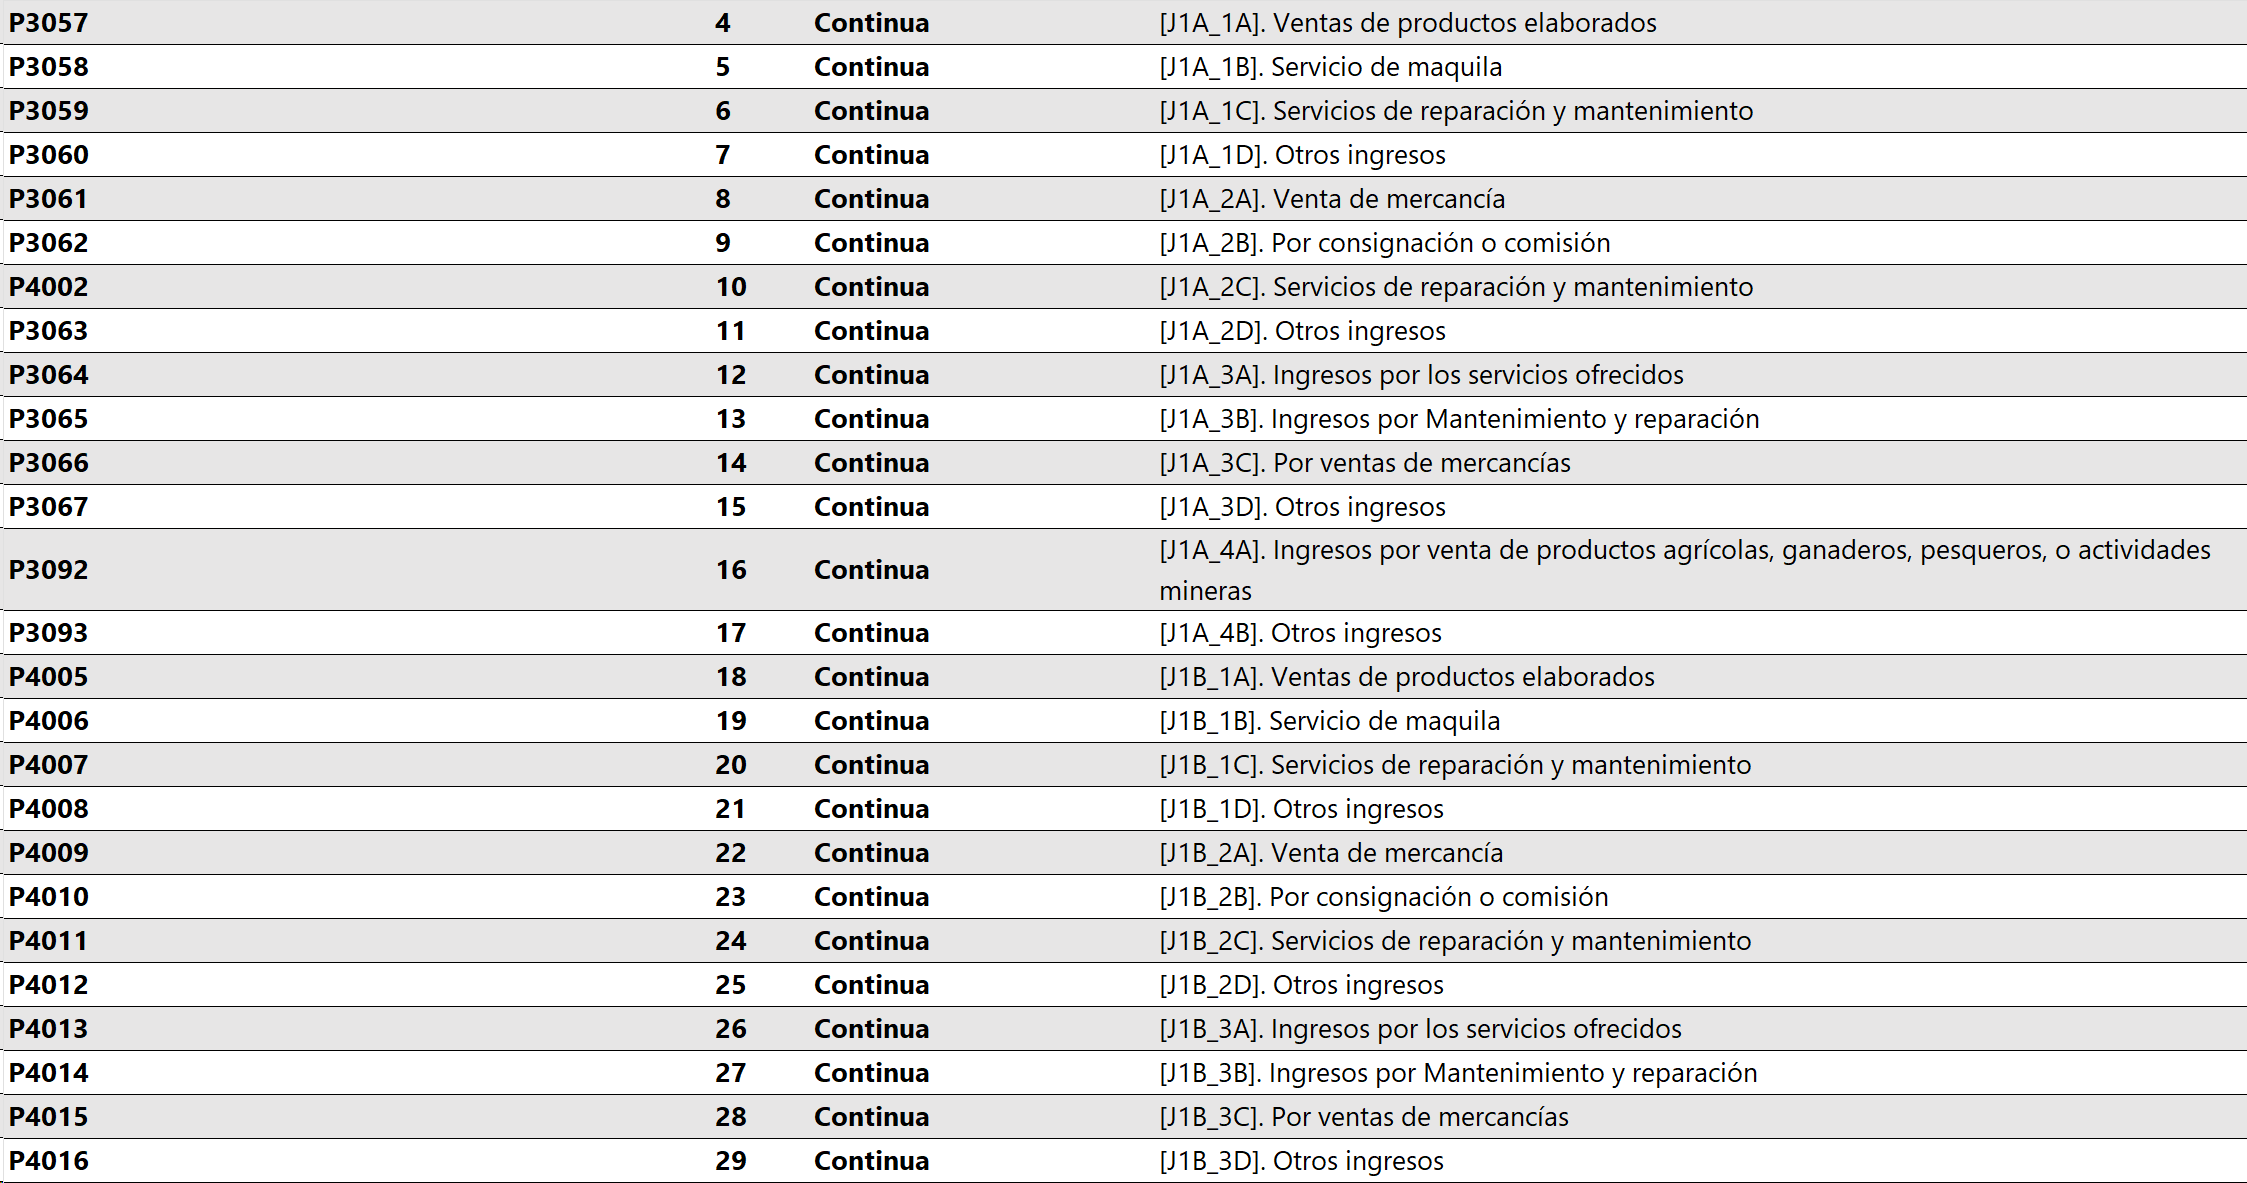

In [137]:
modulo_sales = pd.read_csv("../../Data/Módulo de ventas o ingresos.csv")

In [138]:
emicron_nan = {}

In [139]:
emicron_nan = pd.merge(emicron, modulo_sales, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

P3057 to P3062

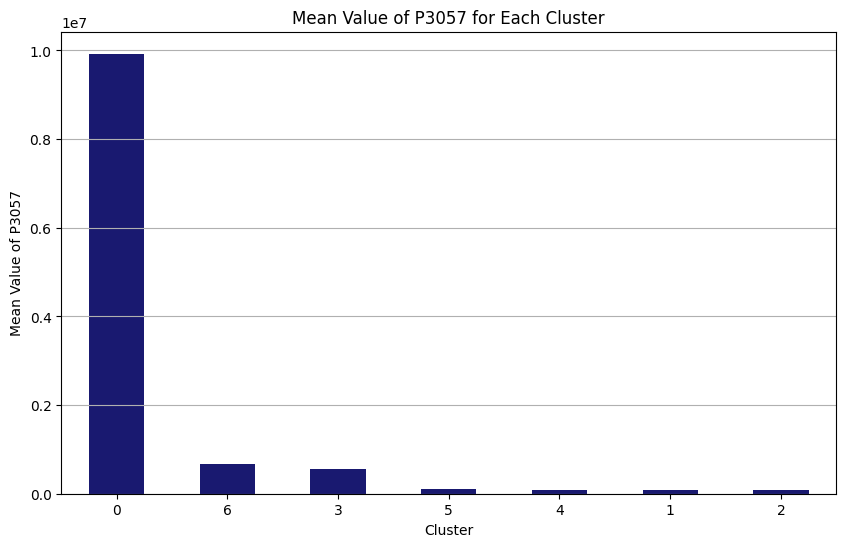

cluster
0    9.926543e+06
6    6.713334e+05
3    5.520553e+05
5    9.780863e+04
4    9.514484e+04
1    9.324870e+04
2    7.869407e+04
dtype: float64


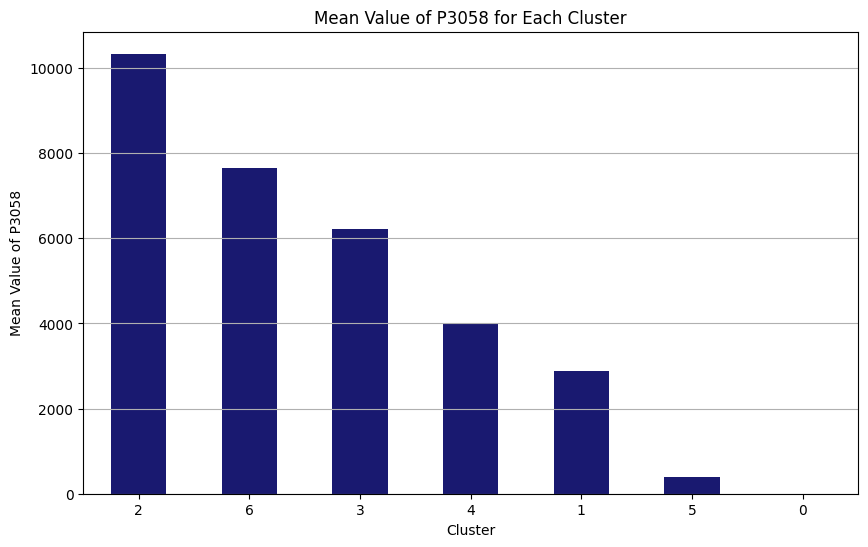

cluster
2    10336.075835
6     7654.814471
3     6208.755824
4     3984.687726
1     2887.273108
5      398.266396
0        0.000000
dtype: float64


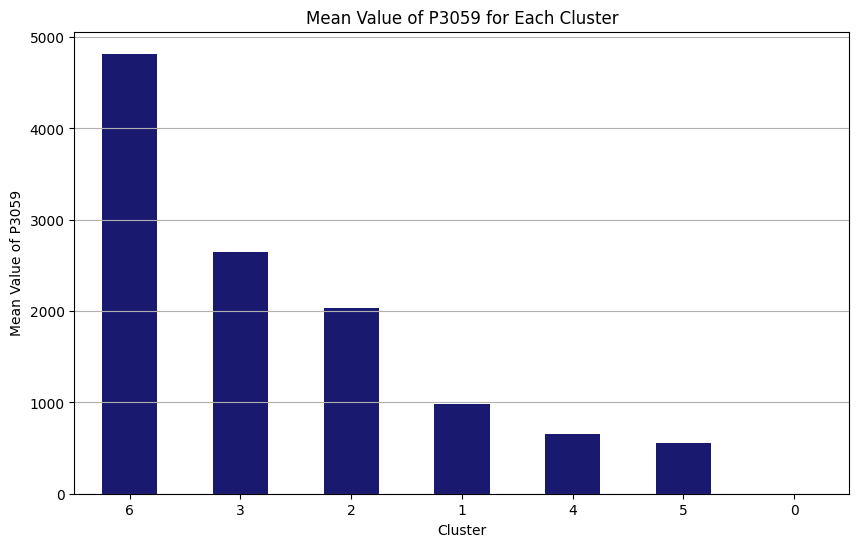

cluster
6    4818.035689
3    2650.061992
2    2029.793437
1     983.960972
4     651.653443
5     557.910215
0       0.000000
dtype: float64


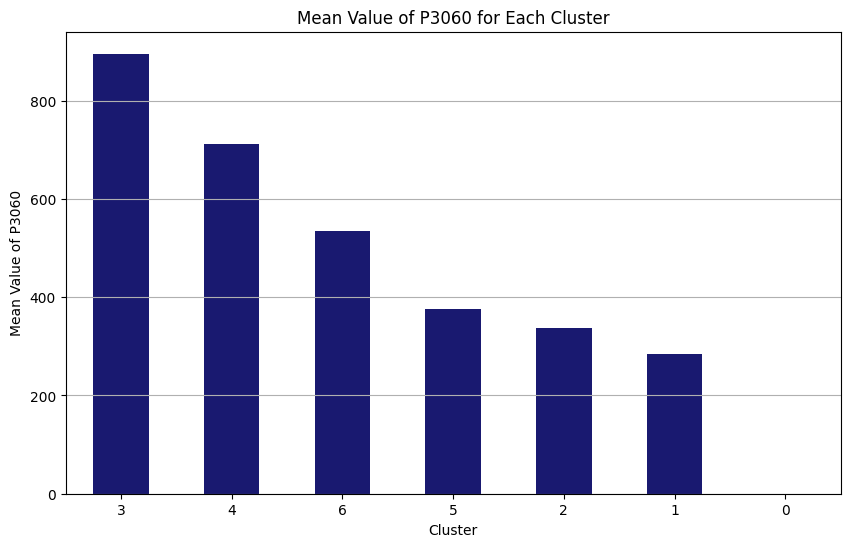

cluster
3    895.631312
4    712.409008
6    535.207937
5    375.607879
2    336.457876
1    283.925368
0      0.000000
dtype: float64


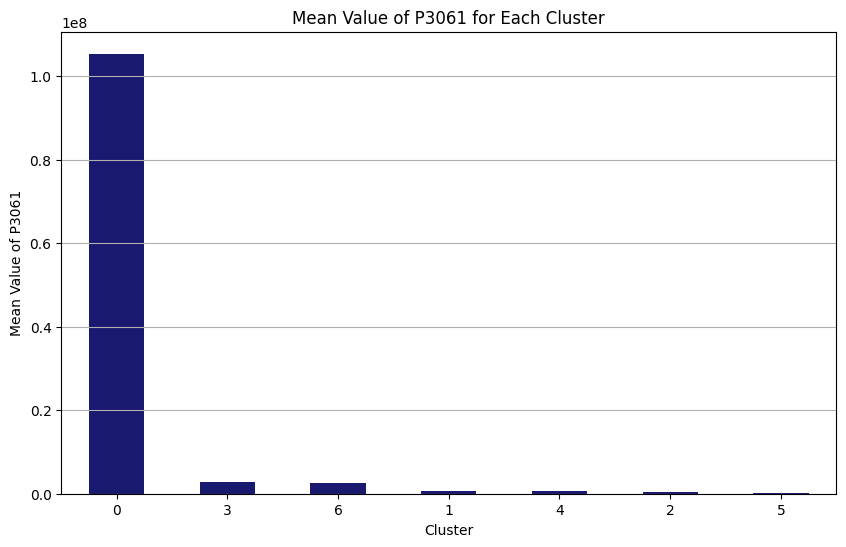

cluster
0    1.053416e+08
3    2.911536e+06
6    2.686140e+06
1    6.558231e+05
4    5.346358e+05
2    4.999173e+05
5    9.367643e+04
dtype: float64


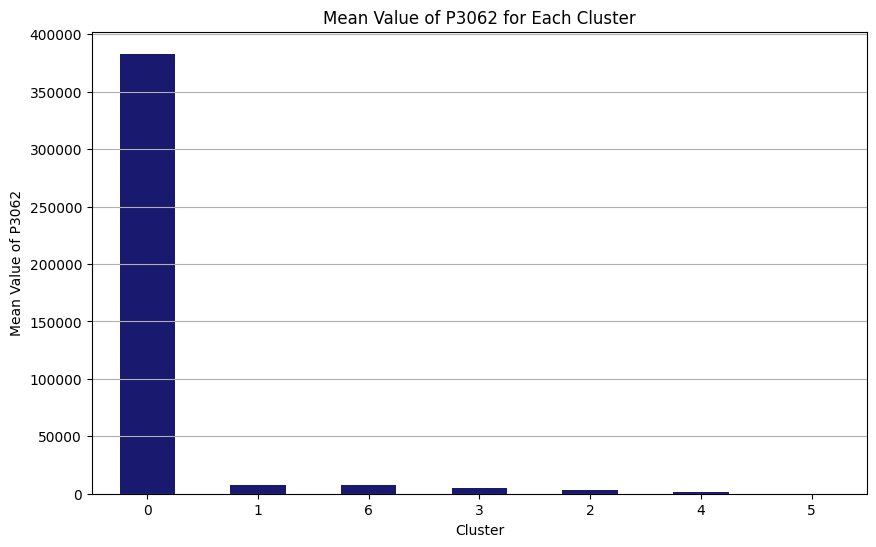

cluster
0    383118.811867
1      7874.527644
6      7716.311653
3      4877.244086
2      3143.013693
4      1873.886618
5         0.000000
dtype: float64


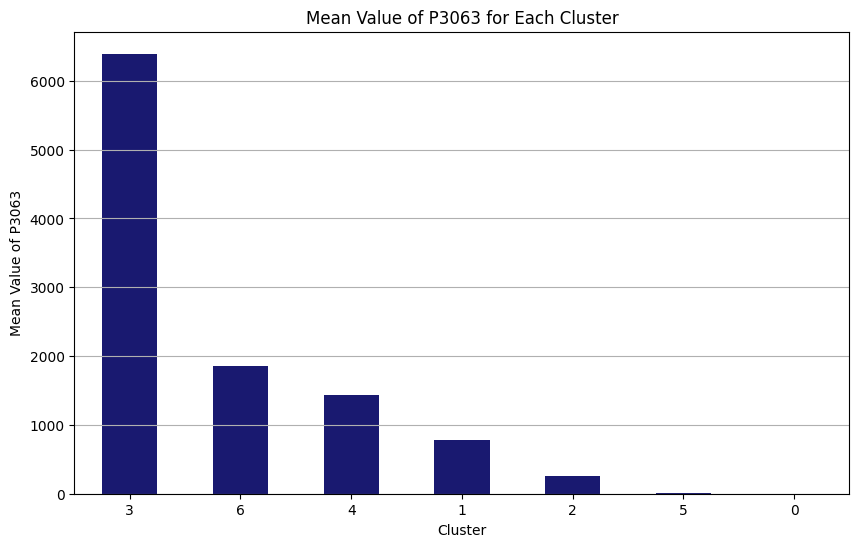

cluster
3    6392.751660
6    1856.611051
4    1428.702009
1     776.631190
2     251.099534
5      11.656622
0       0.000000
dtype: float64


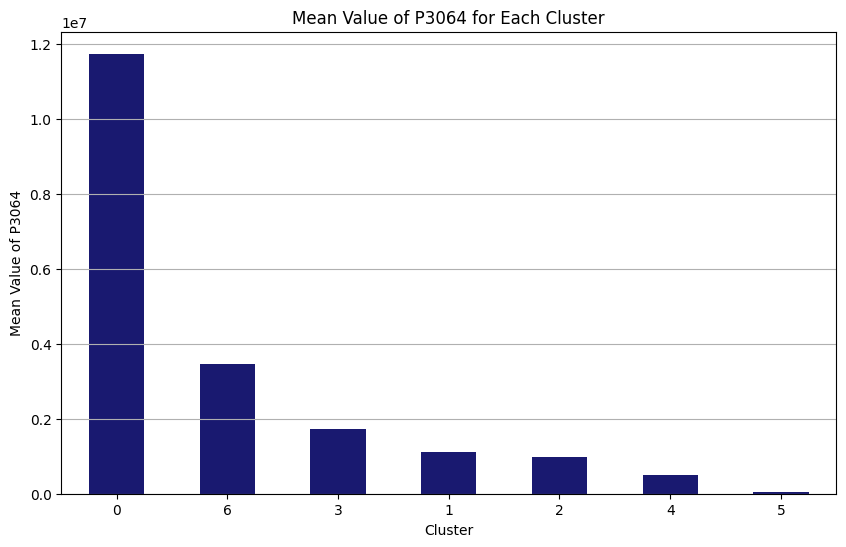

cluster
0    1.172891e+07
6    3.455614e+06
3    1.722326e+06
1    1.102702e+06
2    9.893936e+05
4    5.042314e+05
5    4.023035e+04
dtype: float64


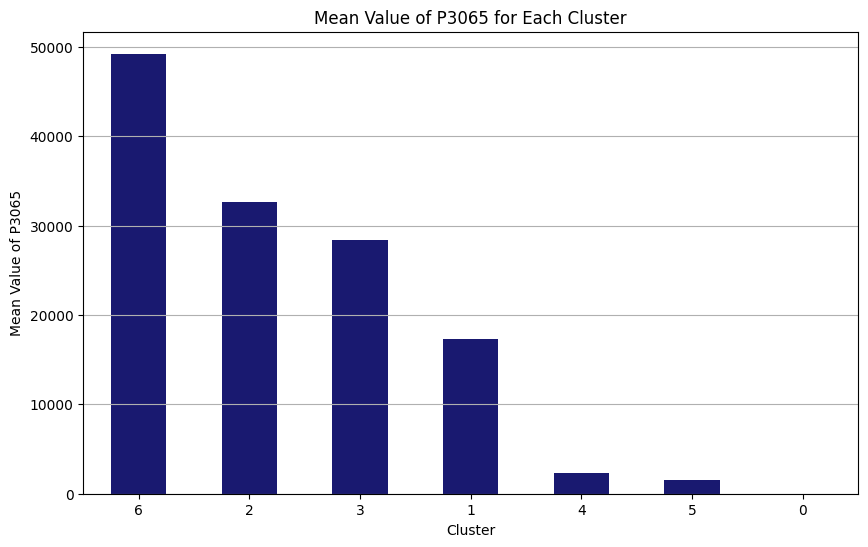

cluster
6    49225.325478
2    32639.417055
3    28432.807689
1    17265.156517
4     2359.206491
5     1545.403646
0        0.000000
dtype: float64


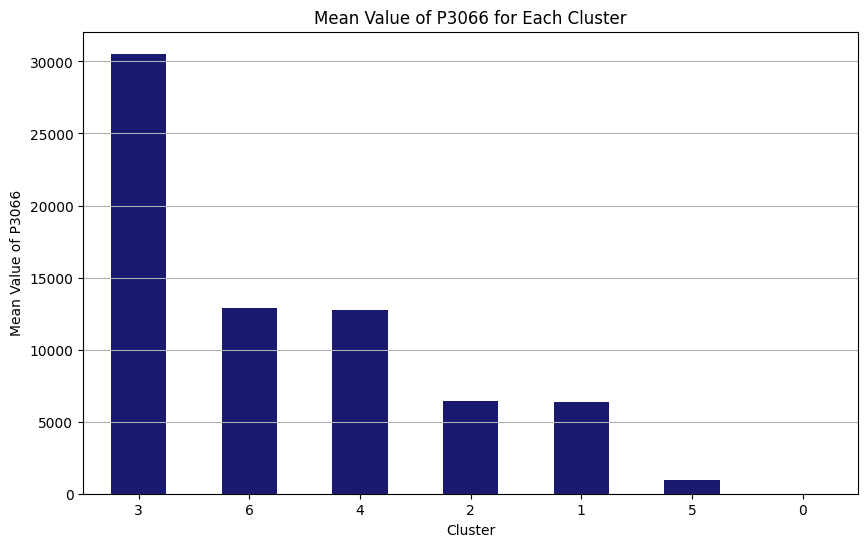

cluster
3    30536.230471
6    12858.124819
4    12767.041336
2     6424.618629
1     6370.522061
5      984.101158
0        0.000000
dtype: float64


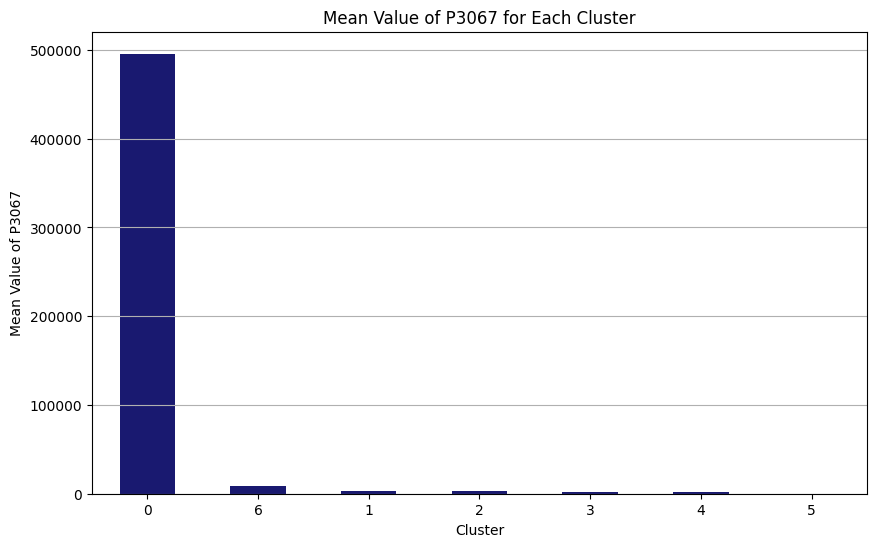

cluster
0    495726.692876
6      9219.118928
1      3160.824775
2      3124.583355
3      2463.834923
4      2356.147257
5       214.044791
dtype: float64


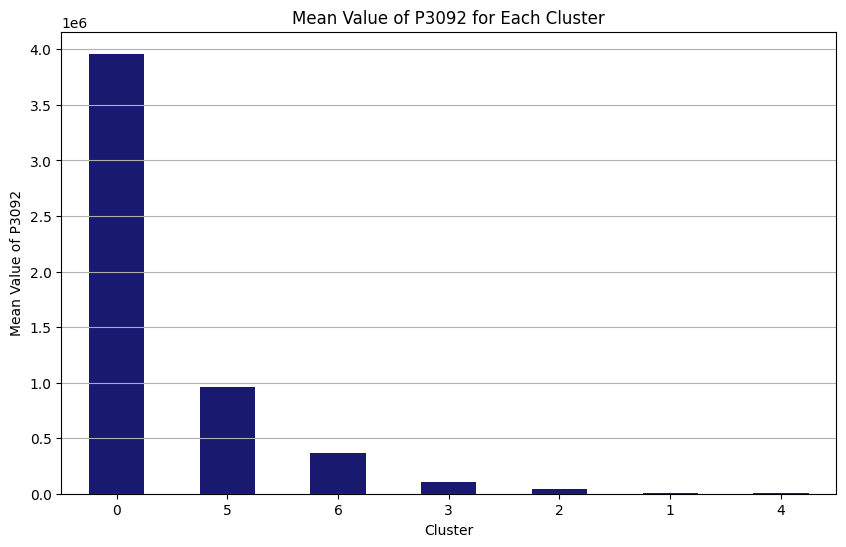

cluster
0    3.960298e+06
5    9.626558e+05
6    3.687208e+05
3    1.047836e+05
2    4.339361e+04
1    6.140657e+03
4    5.175423e+03
dtype: float64


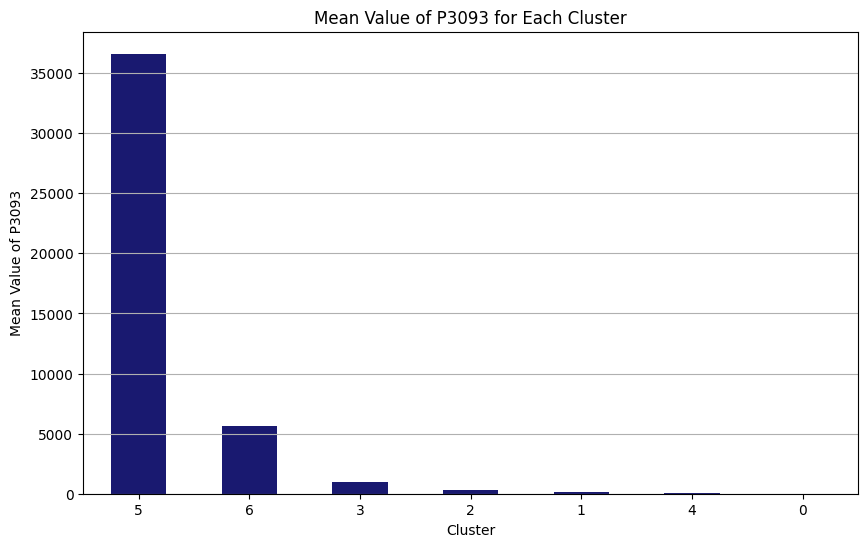

cluster
5    36600.847330
6     5673.539582
3      938.059315
2      337.034606
1      184.429446
4       99.431632
0        0.000000
dtype: float64


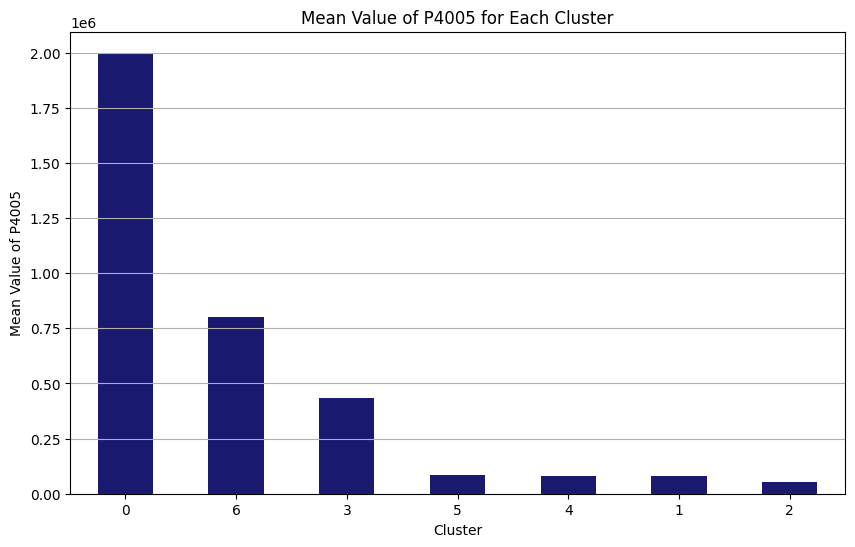

cluster
0    1.995124e+06
6    7.993882e+05
3    4.339590e+05
5    8.352611e+04
4    8.107076e+04
1    7.947112e+04
2    5.415791e+04
dtype: float64


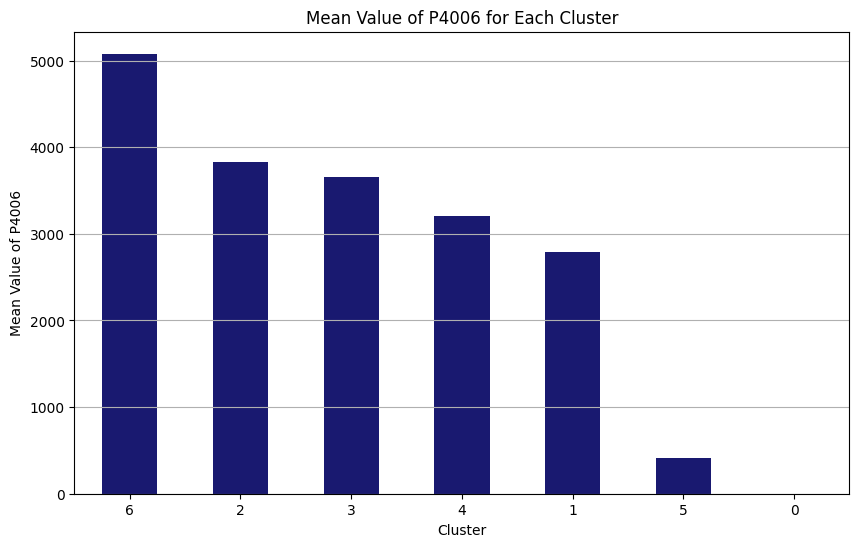

cluster
6    5078.882661
2    3831.657092
3    3656.588940
4    3202.338470
1    2788.685888
5     413.616229
0       0.000000
dtype: float64


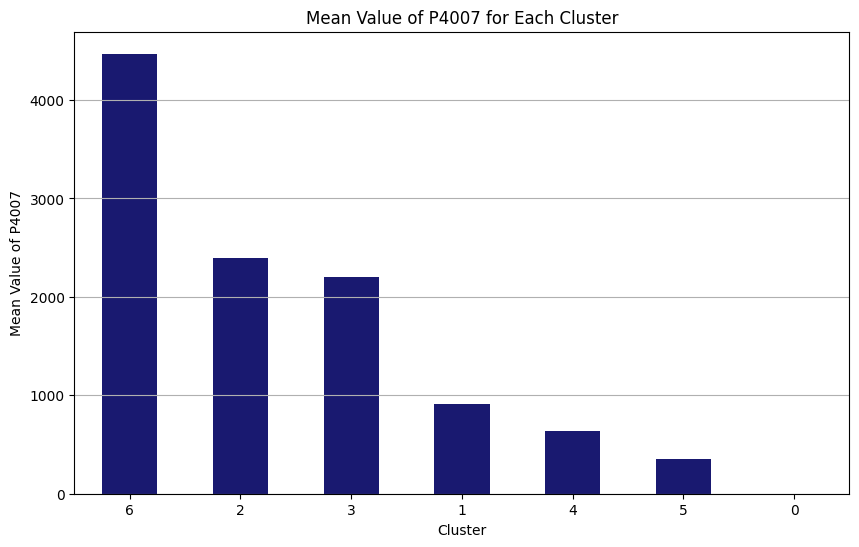

cluster
6    4470.719562
2    2392.931820
3    2199.809380
1     915.491244
4     638.839889
5     355.135246
0       0.000000
dtype: float64


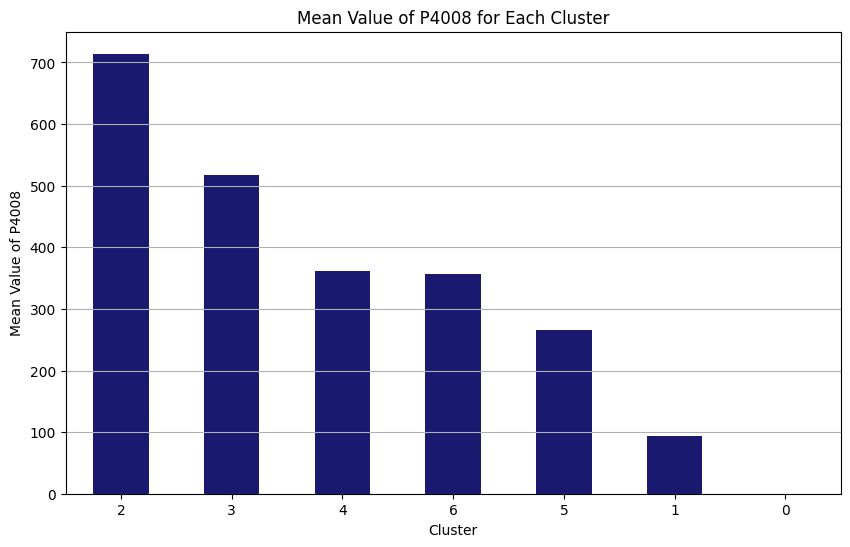

cluster
2    714.218372
3    517.295017
4    361.733021
6    356.805291
5    265.769475
1     93.570338
0      0.000000
dtype: float64


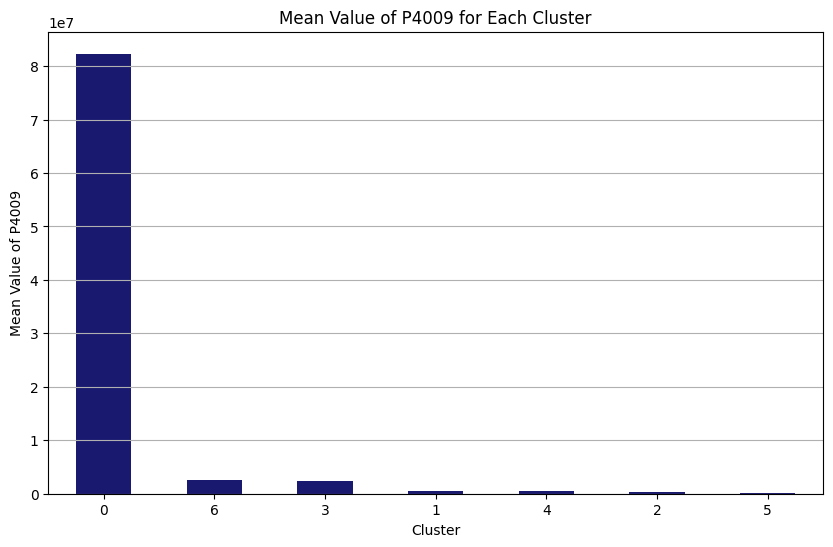

cluster
0    8.232117e+07
6    2.537226e+06
3    2.388939e+06
1    5.424038e+05
4    4.159000e+05
2    3.678308e+05
5    8.277533e+04
dtype: float64


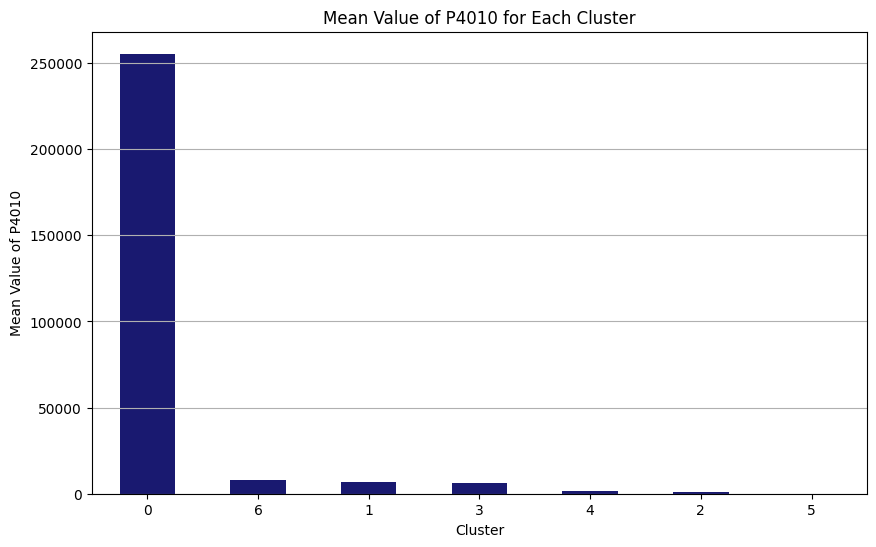

cluster
0    255412.541245
6      7682.635569
1      6715.042152
3      6280.733358
4      1633.874941
2      1272.437151
5         0.000000
dtype: float64


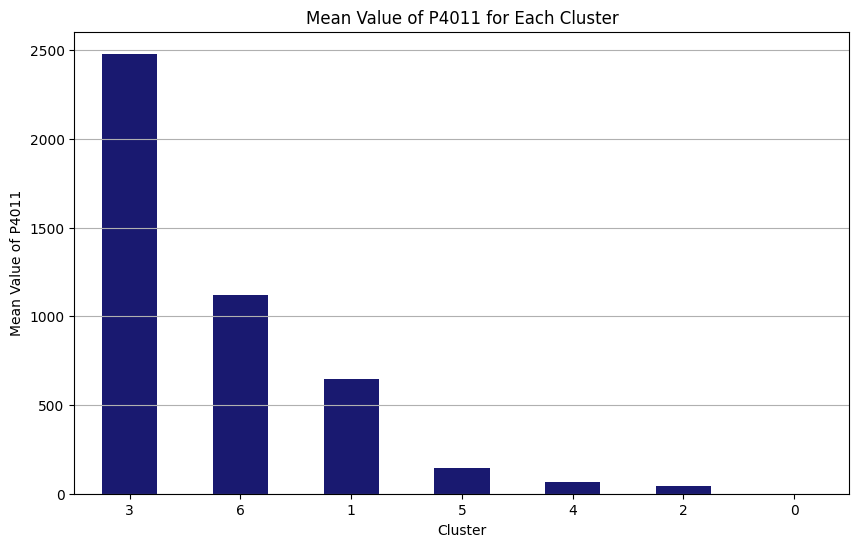

cluster
3    2480.898098
6    1122.073999
1     645.767405
5     144.093706
4      64.056834
2      42.857107
0       0.000000
dtype: float64


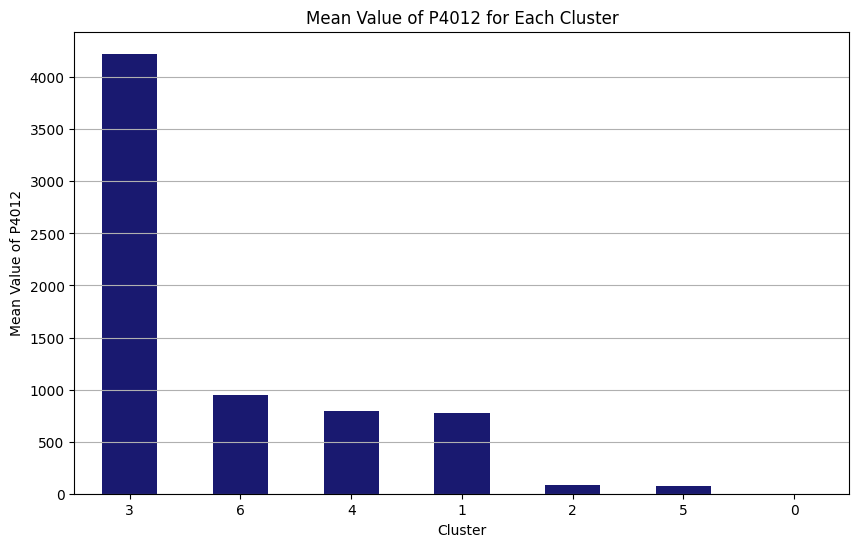

cluster
3    4225.821608
6     944.915269
4     795.273911
1     773.562187
2      80.766561
5      70.835785
0       0.000000
dtype: float64


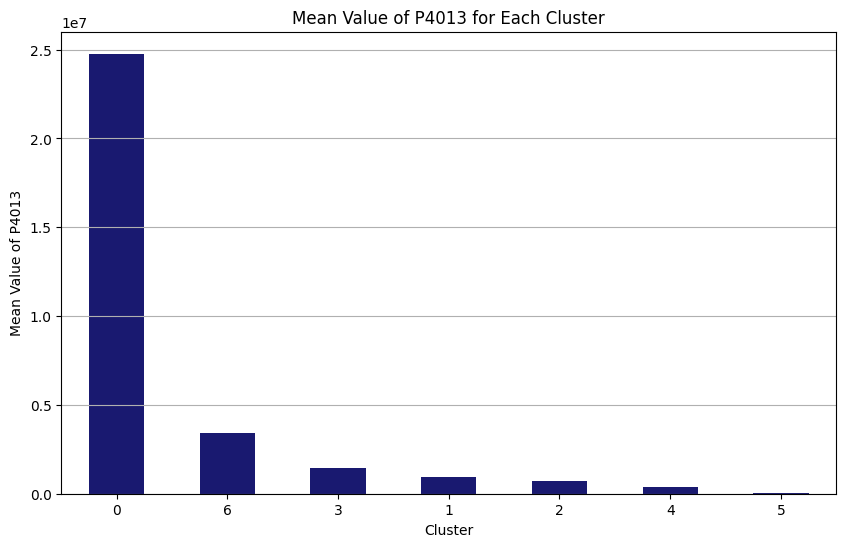

cluster
0    2.477162e+07
6    3.409946e+06
3    1.439592e+06
1    9.224881e+05
2    7.057000e+05
4    3.905152e+05
5    3.381493e+04
dtype: float64


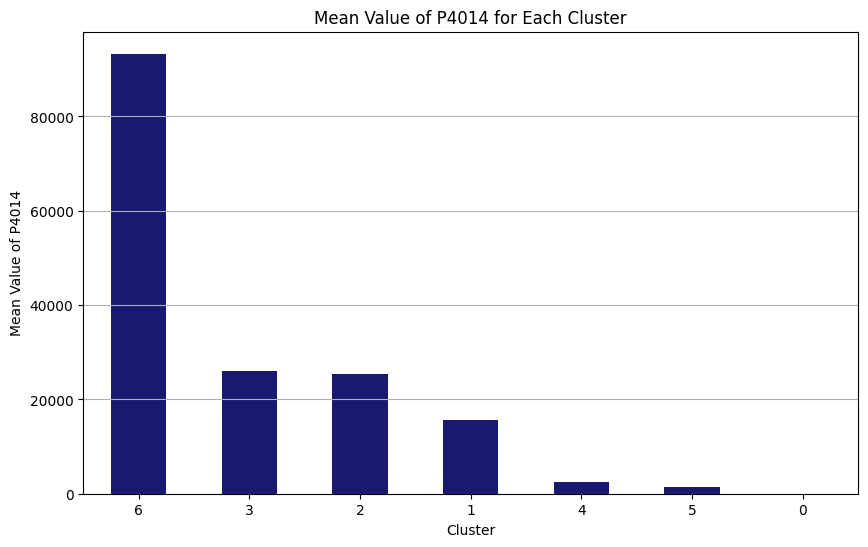

cluster
6    93313.571355
3    26070.846599
2    25448.274699
1    15539.514642
4     2523.540536
5     1454.303947
0        0.000000
dtype: float64


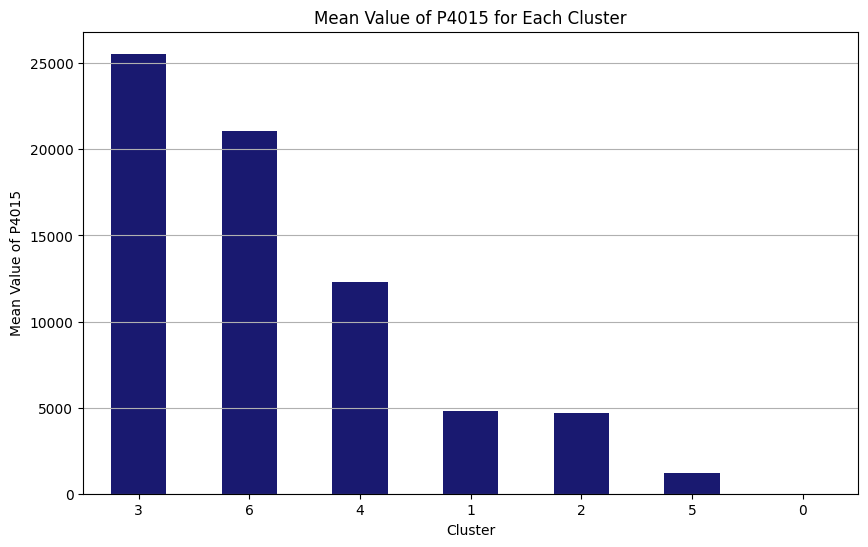

cluster
3    25549.298090
6    21083.694539
4    12322.183104
1     4801.559575
2     4688.564752
5     1204.357436
0        0.000000
dtype: float64


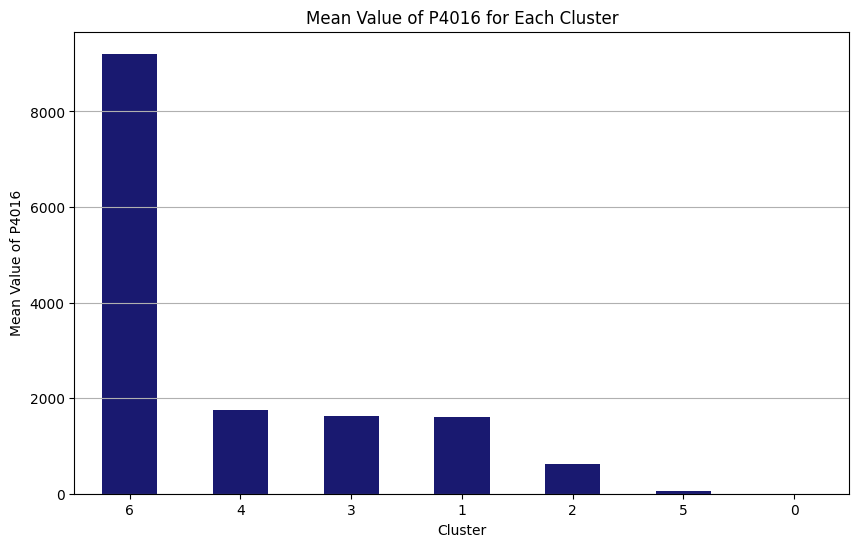

cluster
6    9208.146860
4    1741.726900
3    1631.282263
1    1601.957182
2     616.403688
5      65.541309
0       0.000000
dtype: float64


In [140]:
def weighted_mean(df, column):
    weights = df['F_EXP']
    values = df[column]
    return (values * weights).sum() / weights.sum()

columns = ['P3057', 'P3058', 'P3059', 'P3060', 'P3061', 'P3062', 'P3063', 'P3064', 'P3065', 'P3066', 'P3067', 'P3092', 'P3093', 'P4005', 'P4006', 'P4007', 'P4008', 'P4009', 'P4010', 'P4011', 'P4012', 'P4013', 'P4014', 'P4015', 'P4016']

for column in columns:
    result = emicron_nan.groupby('cluster').apply(weighted_mean, column=column).sort_values(ascending=False)

    # Plotting the mean values
    plt.figure(figsize=(10, 6))
    result.plot(kind='bar', color='#191970')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean Value of {column}')
    plt.title(f'Mean Value of {column} for Each Cluster')
    plt.xticks(rotation=0)  # Rotate x-axis labels if needed
    plt.grid(axis='y')  # Add gridlines to y-axis
    plt.show()

    print(result)


*MPI*

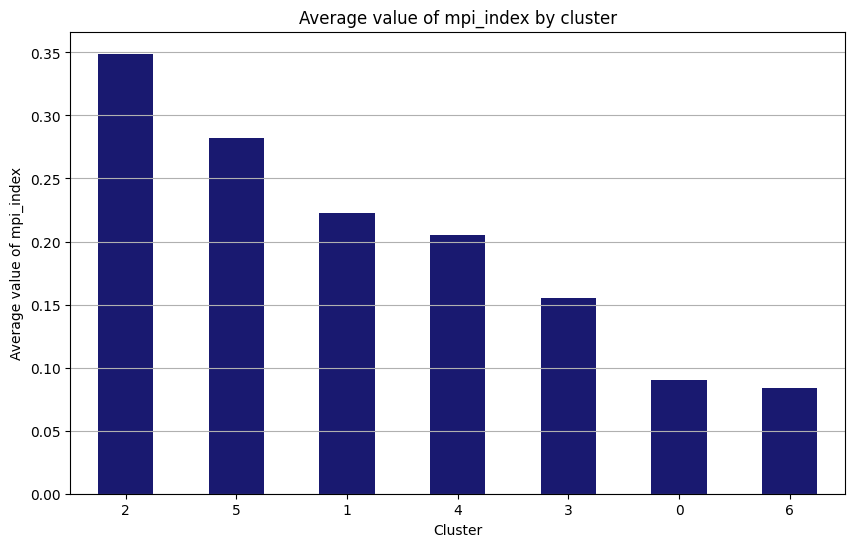

cluster
2    0.348954
5    0.282081
1    0.222886
4    0.205327
3    0.155596
0    0.090525
6    0.083872
dtype: float64


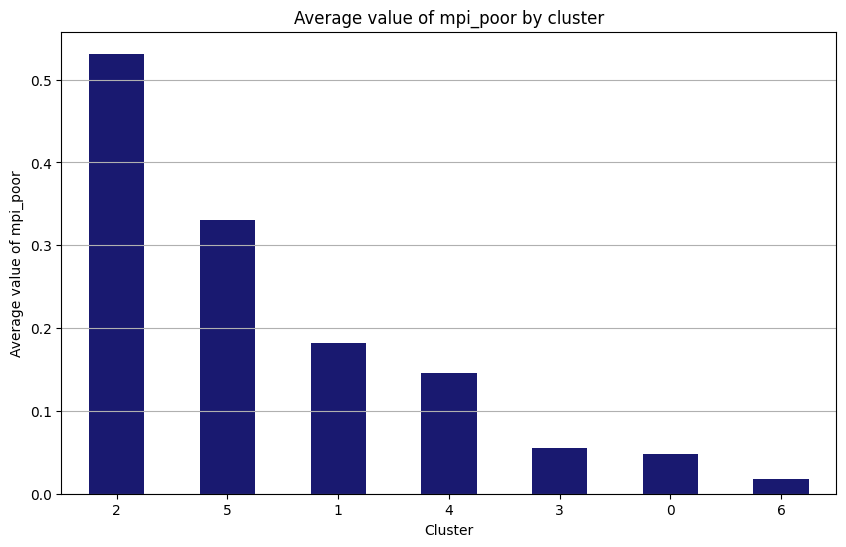

cluster
2    0.531254
5    0.330178
1    0.182068
4    0.145847
3    0.055581
0    0.047709
6    0.018035
dtype: float64


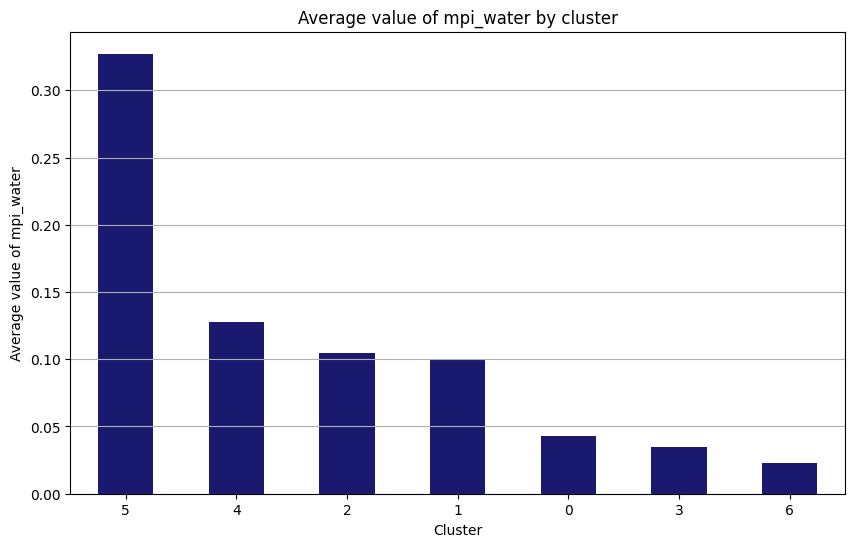

cluster
5    0.327207
4    0.127561
2    0.104771
1    0.100082
0    0.043247
3    0.034578
6    0.022580
dtype: float64


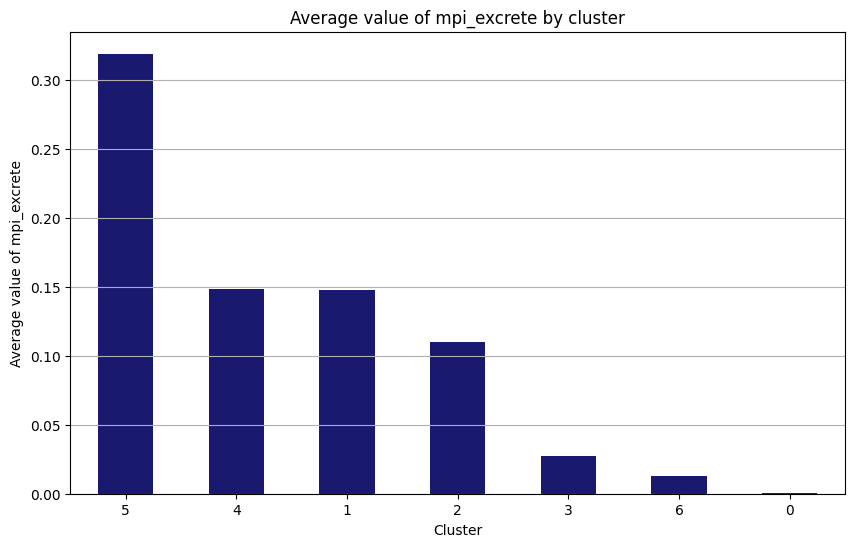

cluster
5    0.319000
4    0.148342
1    0.147882
2    0.110268
3    0.027152
6    0.013100
0    0.000774
dtype: float64


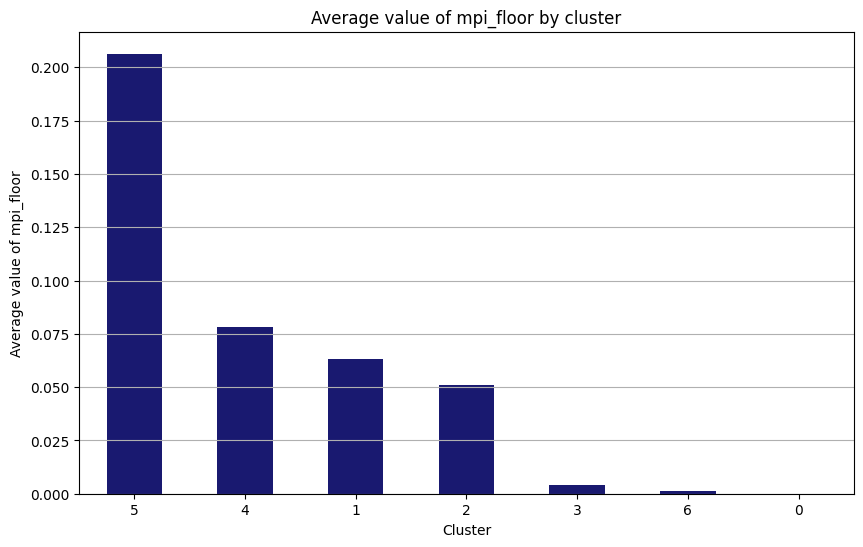

cluster
5    0.206358
4    0.078018
1    0.063353
2    0.051002
3    0.004285
6    0.001054
0    0.000000
dtype: float64


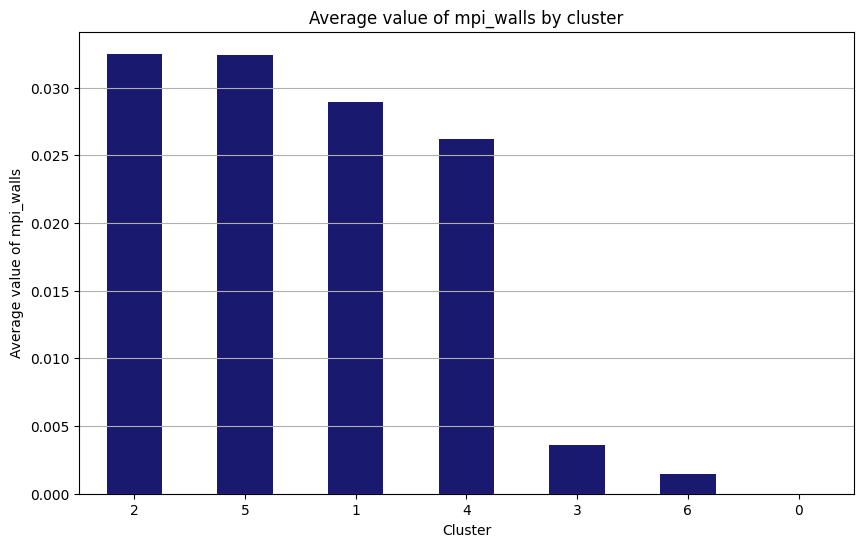

cluster
2    0.032507
5    0.032431
1    0.028948
4    0.026216
3    0.003603
6    0.001456
0    0.000000
dtype: float64


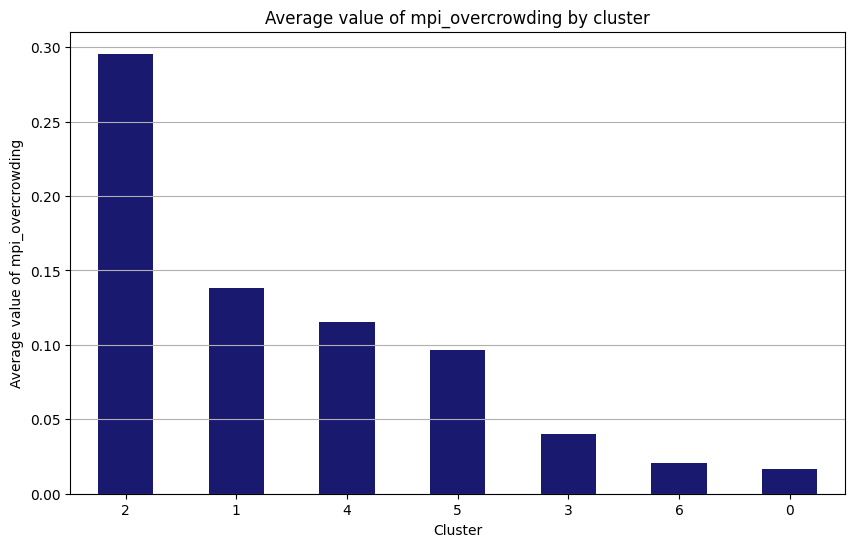

cluster
2    0.295571
1    0.138149
4    0.115289
5    0.096652
3    0.039810
6    0.020788
0    0.016925
dtype: float64


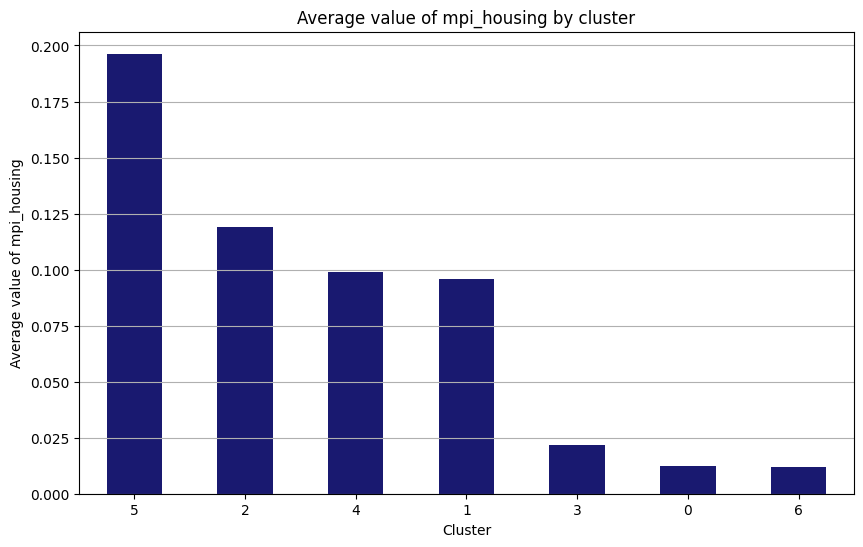

cluster
5    0.196330
2    0.118824
4    0.099085
1    0.095683
3    0.021885
0    0.012189
6    0.011796
dtype: float64


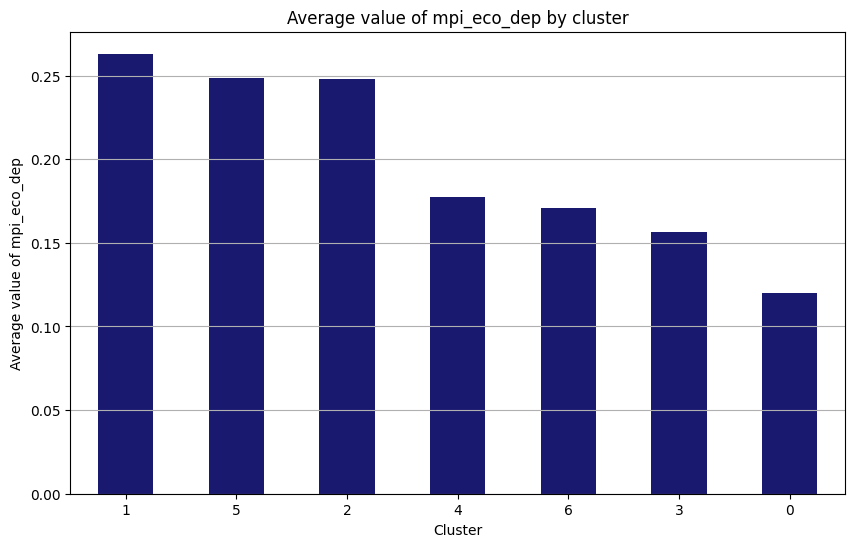

cluster
1    0.263029
5    0.248286
2    0.248094
4    0.177403
6    0.170983
3    0.156307
0    0.119978
dtype: float64


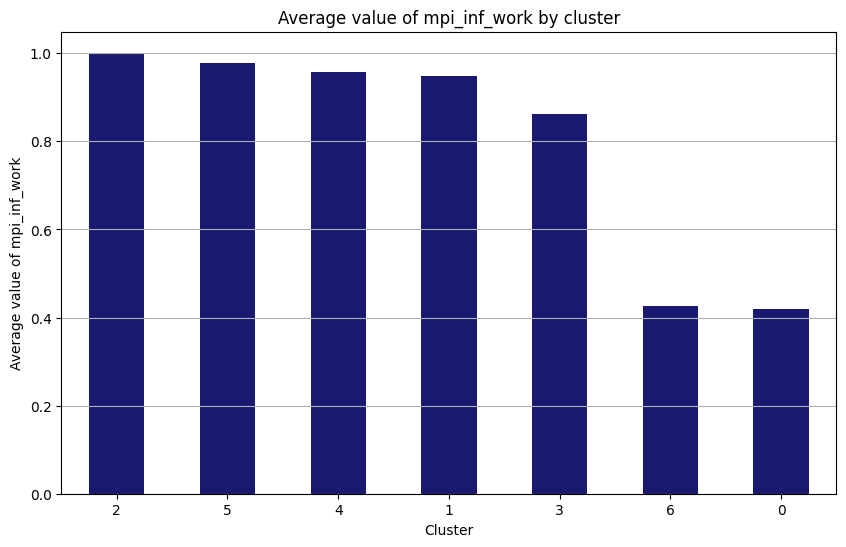

cluster
2    0.998969
5    0.977853
4    0.957315
1    0.949061
3    0.863174
6    0.426940
0    0.419566
dtype: float64


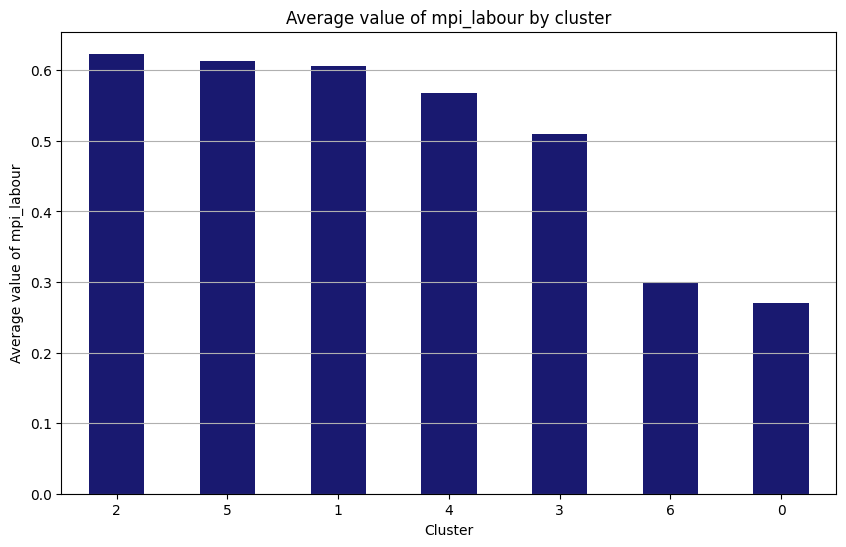

cluster
2    0.623531
5    0.613070
1    0.606045
4    0.567359
3    0.509740
6    0.298961
0    0.269772
dtype: float64


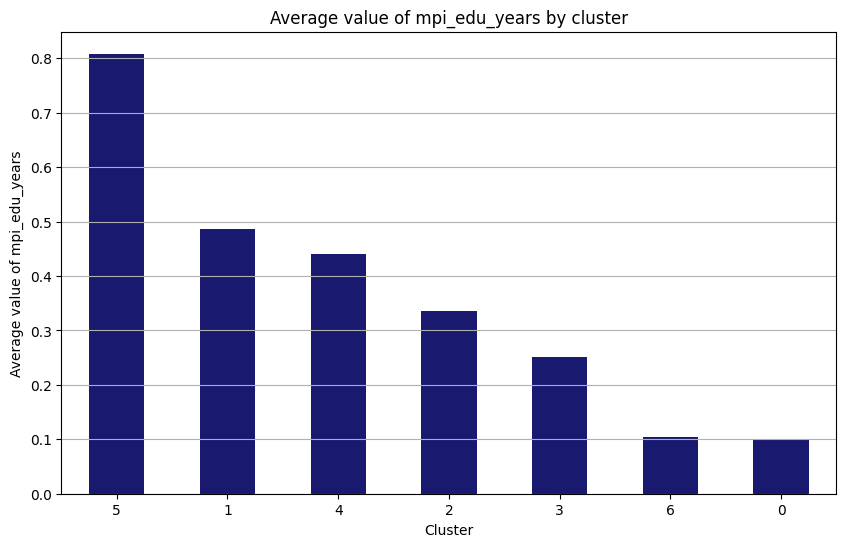

cluster
5    0.808439
1    0.485710
4    0.440371
2    0.335685
3    0.251210
6    0.104081
0    0.099891
dtype: float64


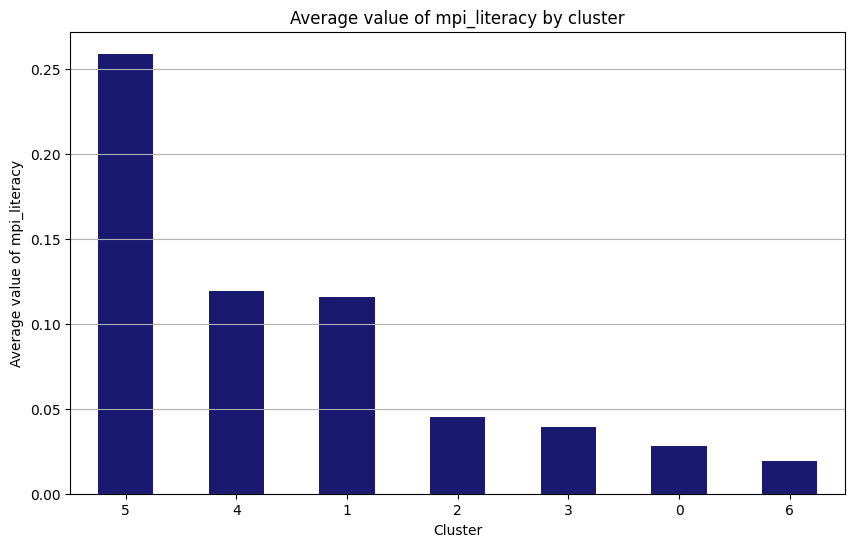

cluster
5    0.258818
4    0.119281
1    0.115874
2    0.045180
3    0.039375
0    0.028269
6    0.019271
dtype: float64


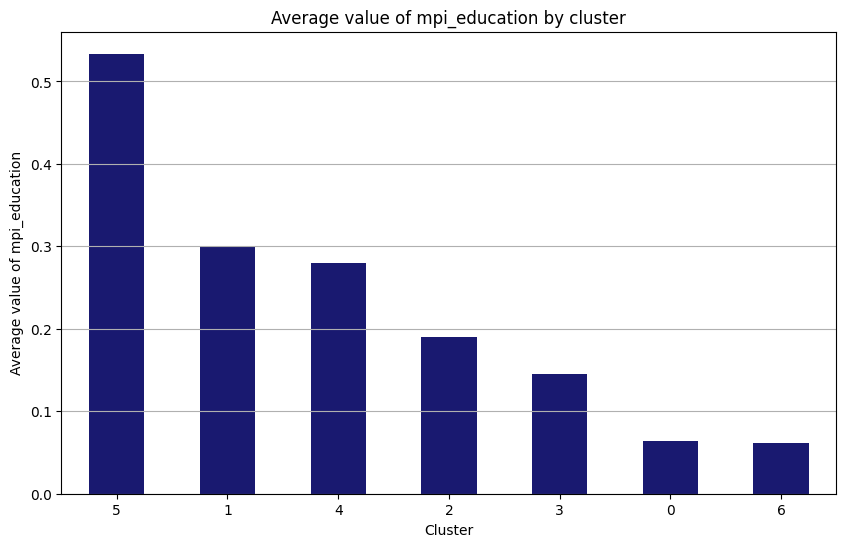

cluster
5    0.533628
1    0.300787
4    0.279826
2    0.190432
3    0.145292
0    0.064080
6    0.061676
dtype: float64


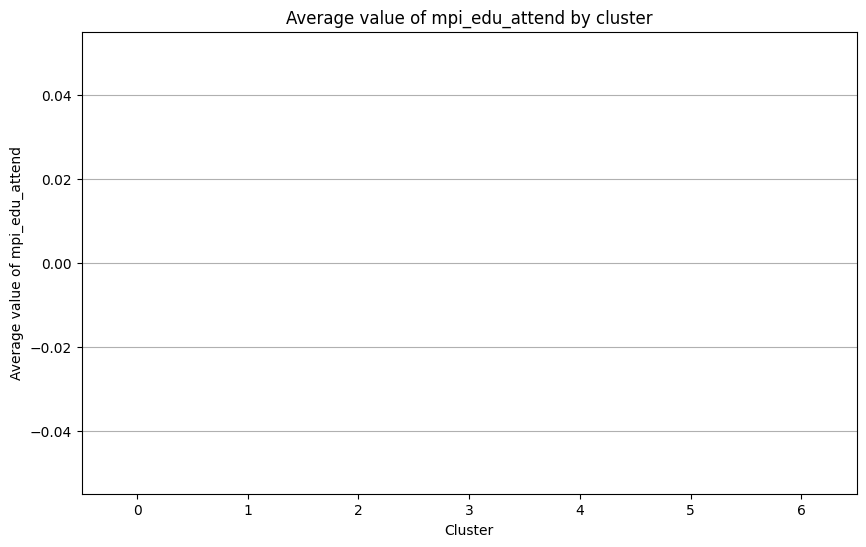

cluster
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64


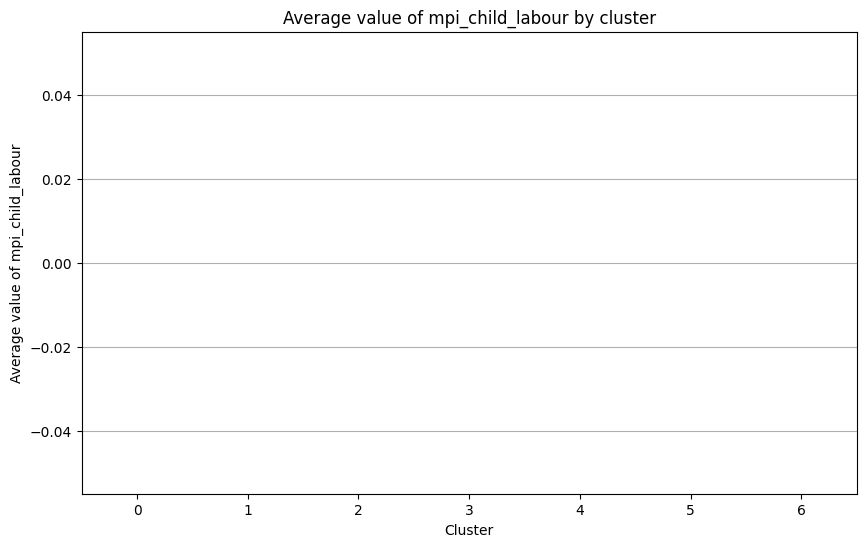

cluster
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64


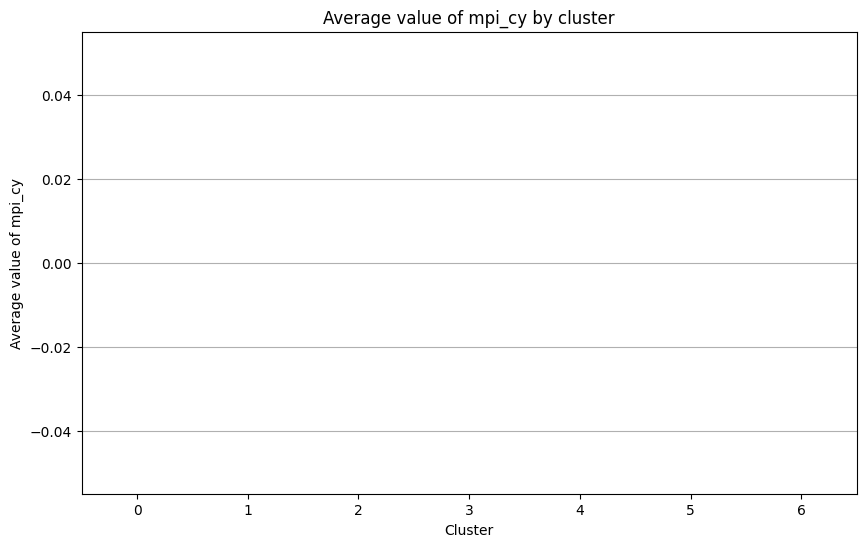

cluster
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64


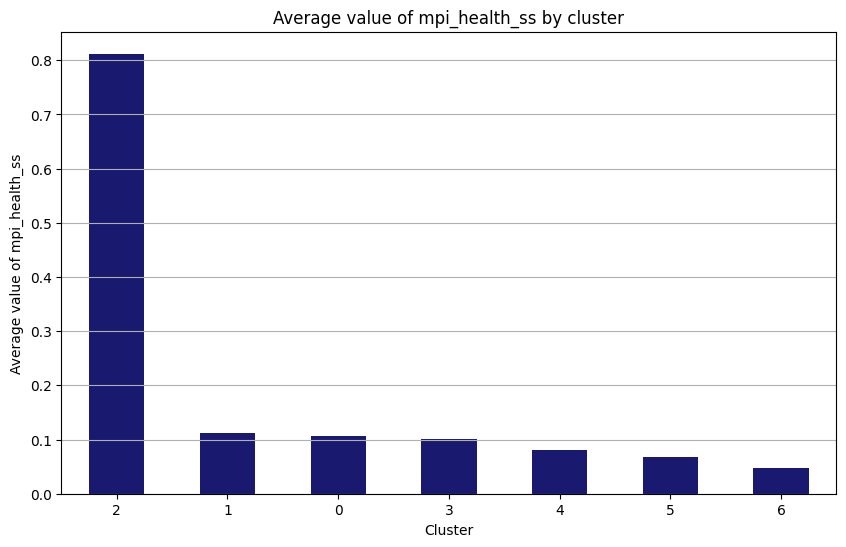

cluster
2    0.811980
1    0.111920
0    0.106583
3    0.101062
4    0.080363
5    0.067376
6    0.046927
dtype: float64


In [141]:
def weighted_mean(df, column):
    weights = df['F_EXP']
    values = df[column]
    return (values * weights).sum() / weights.sum()

columns_mpi = ['mpi_index',
                    'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
                    'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
                    'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
                    'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
                    'mpi_health_ss']

for column in columns_mpi:
    result = emicron.groupby('cluster').apply(weighted_mean, column=column).sort_values(ascending=False)

    # Plotting the mean values
    plt.figure(figsize=(10, 6))
    result.plot(kind='bar', color='#191970')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average value of {column}')
    plt.title(f'Average value of {column} by cluster')
    plt.xticks(rotation=0)  # Rotate x-axis labels if needed
    plt.grid(axis='y')  # Add gridlines to y-axis
    plt.show()

    print(result)

*plotting II and mpi*

In [142]:
emicron['mpi_index_rev'] = 1-emicron['mpi_index']

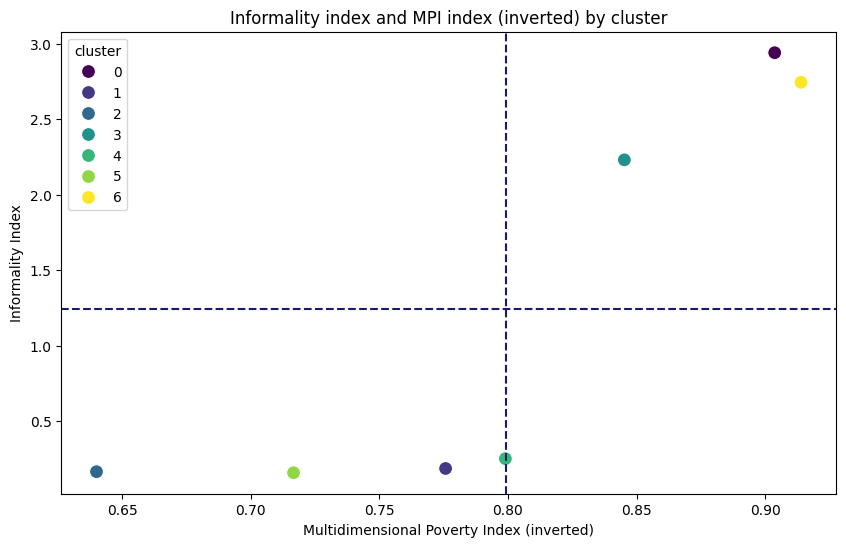

In [143]:
import seaborn as sns

# Assuming 'emicron' is your DataFrame and it has been defined already
mean_values = emicron.groupby('cluster')[['II', 'mpi_index_rev']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_values, x='mpi_index_rev', y='II', hue='cluster', palette='viridis', s=100)

# Add a vertical line at the middle of x-axis
plt.axvline(mean_values['mpi_index_rev'].mean(), color='#191970', linestyle='--')

# Add a horizontal line at the middle of y-axis
plt.axhline(mean_values['II'].mean(), color='#191970', linestyle='--')

plt.title('Informality index and MPI index (inverted) by cluster')
plt.xlabel('Multidimensional Poverty Index (inverted)')
plt.ylabel('Informality Index')


# Save the plot as an image
plt.savefig('../../Plots/informality_mpi_plot.png', dpi=300)

plt.show()


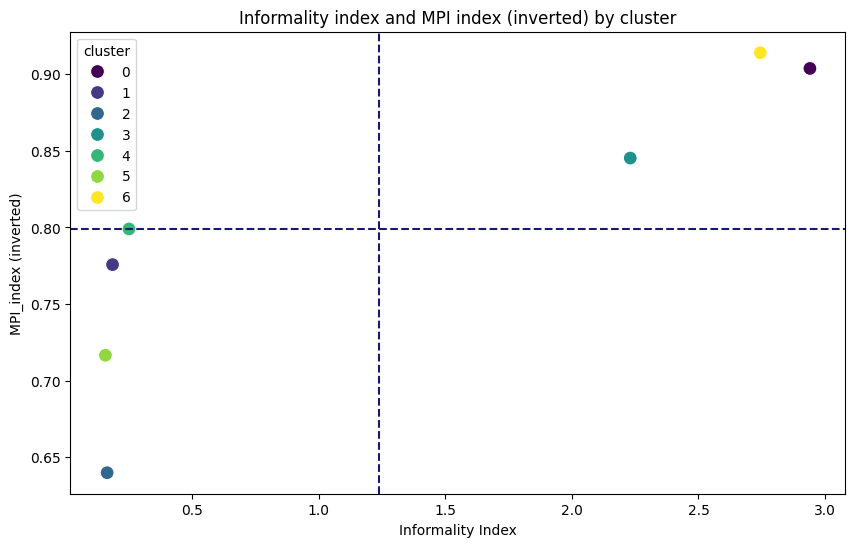

In [144]:
# Assuming 'emicron' is your DataFrame and it has been defined already
mean_values = emicron.groupby('cluster')[['II', 'mpi_index_rev']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_values, y='mpi_index_rev', x='II', hue='cluster', palette='viridis', s=100)

# Add a vertical line at the middle of x-axis
plt.axvline(mean_values['II'].mean(), color='#191970', linestyle='--')

# Add a horizontal line at the middle of y-axis
plt.axhline(mean_values['mpi_index_rev'].mean(), color='#191970', linestyle='--')

plt.title('Informality index and MPI index (inverted) by cluster')
plt.ylabel('MPI_index (inverted)')
plt.xlabel('Informality Index')

plt.show()

/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_50412/3649601130.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emicron_0['mpi_index_rev_jittered'] = emicron_0['mpi_index_rev'] + np.random.uniform(-jitter, jitter, size=len(emicron_0))
/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_50412/3649601130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emicron_0['II_jittered'] = emicron_0['II'] + np.random.uniform(-jitter, jitter, size=len(emicron_0))
/var/folders/4h/c_6klx0d0bd723sm

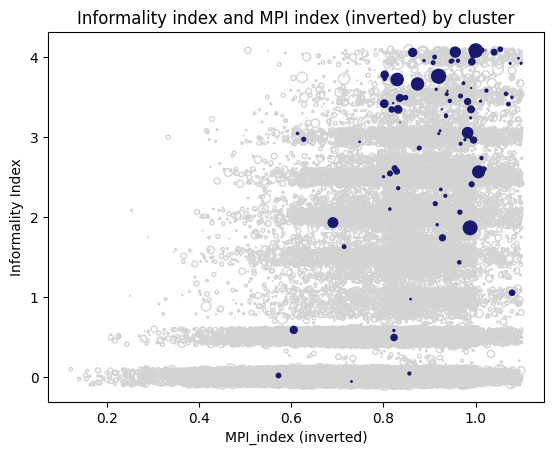

In [145]:

# Separate the data into two DataFrames based on the cluster
emicron_0 = emicron[emicron['cluster'] == 0]
emicron_other = emicron[emicron['cluster'] != 0]

# Add more random noise to create more dispersion
jitter = 0.1 # adjust this value to change the amount of jitter
emicron_0['mpi_index_rev_jittered'] = emicron_0['mpi_index_rev'] + np.random.uniform(-jitter, jitter, size=len(emicron_0))
emicron_0['II_jittered'] = emicron_0['II'] + np.random.uniform(-jitter, jitter, size=len(emicron_0))
emicron_other['mpi_index_rev_jittered'] = emicron_other['mpi_index_rev'] + np.random.uniform(-jitter, jitter, size=len(emicron_other))
emicron_other['II_jittered'] = emicron_other['II'] + np.random.uniform(-jitter, jitter, size=len(emicron_other))

# Normalize 'F_EXP' for better visualization
size_0 = (emicron_0['F_EXP'] - emicron_0['F_EXP'].min()) / (emicron_0['F_EXP'].max() - emicron_0['F_EXP'].min()) * 100
size_other = (emicron_other['F_EXP'] - emicron_other['F_EXP'].min()) / (emicron_other['F_EXP'].max() - emicron_other['F_EXP'].min()) * 100

# Use matplotlib to create the scatter plot
plt.scatter(emicron_other['mpi_index_rev_jittered'], emicron_other['II_jittered'],
            edgecolors='lightgrey', facecolors='none', s=size_other)
plt.scatter(emicron_0['mpi_index_rev_jittered'], emicron_0['II_jittered'],
            edgecolors='#191970', facecolors='#191970', s=size_0)

plt.title('Informality index and MPI index (inverted) by cluster')
plt.xlabel('MPI_index (inverted)')
plt.ylabel('Informality Index')
plt.show()

/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_50412/491480243.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emicron_0['mpi_index_jittered'] = emicron_0['mpi_index'] + np.random.uniform(-jitter, jitter, size=len(emicron_0))
/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_50412/491480243.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emicron_0['II_jittered'] = emicron_0['II'] + np.random.uniform(-jitter, jitter, size=len(emicron_0))
/var/folders/4h/c_6klx0d0bd723smcqr1l_3h00

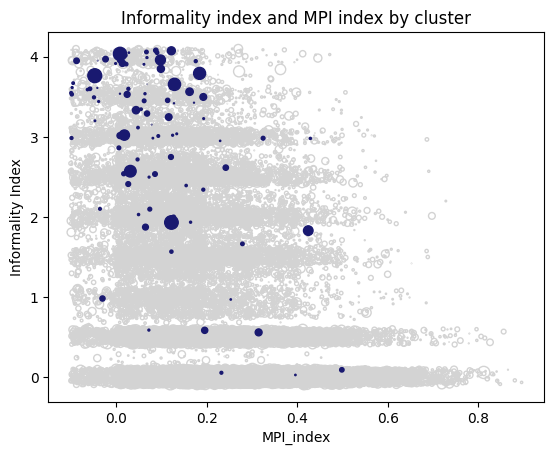

In [146]:
# Separate the data into two DataFrames based on the cluster
emicron_0 = emicron[emicron['cluster'] == 0]
emicron_other = emicron[emicron['cluster'] != 0]

# Add more random noise to create more dispersion
jitter = 0.1 # adjust this value to change the amount of jitter
emicron_0['mpi_index_jittered'] = emicron_0['mpi_index'] + np.random.uniform(-jitter, jitter, size=len(emicron_0))
emicron_0['II_jittered'] = emicron_0['II'] + np.random.uniform(-jitter, jitter, size=len(emicron_0))
emicron_other['mpi_index_jittered'] = emicron_other['mpi_index'] + np.random.uniform(-jitter, jitter, size=len(emicron_other))
emicron_other['II_jittered'] = emicron_other['II'] + np.random.uniform(-jitter, jitter, size=len(emicron_other))

# Normalize 'F_EXP' for better visualization
size_0 = (emicron_0['F_EXP'] - emicron_0['F_EXP'].min()) / (emicron_0['F_EXP'].max() - emicron_0['F_EXP'].min()) * 100
size_other = (emicron_other['F_EXP'] - emicron_other['F_EXP'].min()) / (emicron_other['F_EXP'].max() - emicron_other['F_EXP'].min()) * 100

# Use matplotlib to create the scatter plot
plt.scatter(emicron_other['mpi_index_jittered'], emicron_other['II_jittered'],
            edgecolors='lightgrey', facecolors='none', s=size_other)
plt.scatter(emicron_0['mpi_index_jittered'], emicron_0['II_jittered'],
            edgecolors='#191970', facecolors='#191970', s=size_0)

plt.title('Informality index and MPI index by cluster')
plt.xlabel('MPI_index')
plt.ylabel('Informality Index')
plt.show()

In [147]:
emicron.to_csv('../../Data/emicron_models.csv', index=False)